In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import lightgbm
from sklearn.metrics import log_loss
from sklearn.model_selection import StratifiedKFold,KFold

In [41]:
df = pd.read_csv(r"E:\Data Science\Kaggle Competitions dataset\Hackerearth Airplane Accident/feature_1.csv")
df_test = pd.read_csv(r"E:\Data Science\Kaggle Competitions dataset\Hackerearth Airplane Accident/feature_1_test.csv")

In [42]:
df_test.head()

,Accident_ID,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,...,feature_Turbulence_In_gforces+Adverse_Weather_Metric,feature_Cabin_Temperature-Max_Elevation,feature_Cabin_Temperature+Max_Elevation,feature_Cabin_Temperature-Adverse_Weather_Metric,feature_Cabin_Temperature+Adverse_Weather_Metric,feature_Max_Elevation-Adverse_Weather_Metric,feature_Max_Elevation+Adverse_Weather_Metric,c_feat_1,c_feat_2,c_feat_3
0,1,19.497717,16,6,72.151322,0.388959,78.32,4,37949.724386,2,...,0.458651,-37871.404386,38028.044386,78.250308,78.389692,37949.654694,37949.794079,False,False,True
1,10,58.173516,15,3,64.585232,0.250841,78.60,7,30194.805567,2,...,0.253618,-30116.205567,30273.405567,78.597223,78.602777,30194.802790,30194.808345,True,False,False
2,14,33.287671,15,3,64.721969,0.336669,86.96,6,17572.925484,1,...,0.340985,-17485.965484,17659.885484,86.955684,86.964316,17572.921168,17572.929800,False,False,True
3,17,3.287671,21,5,66.362808,0.421775,80.86,3,40209.186341,2,...,0.621765,-40128.326341,40290.046341,80.660010,81.059990,40208.986351,40209.386332,False,False,False
4,21,10.867580,18,2,56.107566,0.313228,79.22,2,35495.525408,2,...,0.796924,-35416.305408,35574.745408,78.736304,79.703696,35495.041712,35496.009103,False,True,False


In [43]:
y = df["Severity"]
df = df.drop("Severity",axis =1)


In [44]:
y = pd.DataFrame(y)

In [45]:

ID = df_test["Accident_ID"]
df_test = df_test.drop("Accident_ID",axis = 1)

In [7]:
df.shape

(10000, 133)

In [8]:
df_test.head()

,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,...,feature_Turbulence_In_gforces+Adverse_Weather_Metric,feature_Cabin_Temperature-Max_Elevation,feature_Cabin_Temperature+Max_Elevation,feature_Cabin_Temperature-Adverse_Weather_Metric,feature_Cabin_Temperature+Adverse_Weather_Metric,feature_Max_Elevation-Adverse_Weather_Metric,feature_Max_Elevation+Adverse_Weather_Metric,c_feat_1,c_feat_2,c_feat_3
0,19.497717,16,6,72.151322,0.388959,78.32,4,37949.724386,2,0.069692,...,0.458651,-37871.404386,38028.044386,78.250308,78.389692,37949.654694,37949.794079,False,False,True
1,58.173516,15,3,64.585232,0.250841,78.60,7,30194.805567,2,0.002777,...,0.253618,-30116.205567,30273.405567,78.597223,78.602777,30194.802790,30194.808345,True,False,False
2,33.287671,15,3,64.721969,0.336669,86.96,6,17572.925484,1,0.004316,...,0.340985,-17485.965484,17659.885484,86.955684,86.964316,17572.921168,17572.929800,False,False,True
3,3.287671,21,5,66.362808,0.421775,80.86,3,40209.186341,2,0.199990,...,0.621765,-40128.326341,40290.046341,80.660010,81.059990,40208.986351,40209.386332,False,False,False
4,10.867580,18,2,56.107566,0.313228,79.22,2,35495.525408,2,0.483696,...,0.796924,-35416.305408,35574.745408,78.736304,79.703696,35495.041712,35496.009103,False,True,False


In [9]:
df_test.shape

(2500, 133)

In [10]:
for i in df.columns:
    print(i)
    print(df[i].nunique())

Safety_Score
1175
Days_Since_Inspection
23
Total_Safety_Complaints
44
Control_Metric
952
Turbulence_In_gforces
1117
Cabin_Temperature
950
Accident_Type_Code
7
Max_Elevation
4191
Violations
6
Adverse_Weather_Metric
4258
feature_Violations_Safety_Score_mean
6
feature_Violations_Safety_Score_max
5
feature_Violations_Safety_Score_min
4
feature_Violations_Safety_Score_std
6
feature_Violations_Days_Since_Inspection_mean
6
feature_Violations_Days_Since_Inspection_max
2
feature_Violations_Days_Since_Inspection_min
4
feature_Violations_Days_Since_Inspection_std
6
feature_Violations_Total_Safety_Complaints_mean
6
feature_Violations_Total_Safety_Complaints_max
3
feature_Violations_Total_Safety_Complaints_min
1
feature_Violations_Total_Safety_Complaints_std
6
feature_Violations_Control_Metric_mean
6
feature_Violations_Control_Metric_max
4
feature_Violations_Control_Metric_min
4
feature_Violations_Control_Metric_std
6
feature_Violations_Turbulence_In_gforces_mean
6
feature_Violations_Turbulence_In_

In [11]:
combined = pd.concat([df,df_test],axis =0)


In [12]:
combined["Violations"] = combined["Violations"].astype("category")
combined["Accident_Type_Code"] = combined["Accident_Type_Code"].astype("category")

In [13]:
combined.head()

,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,...,feature_Turbulence_In_gforces+Adverse_Weather_Metric,feature_Cabin_Temperature-Max_Elevation,feature_Cabin_Temperature+Max_Elevation,feature_Cabin_Temperature-Adverse_Weather_Metric,feature_Cabin_Temperature+Adverse_Weather_Metric,feature_Max_Elevation-Adverse_Weather_Metric,feature_Max_Elevation+Adverse_Weather_Metric,c_feat_1,c_feat_2,c_feat_3
0,49.223744,14,22,71.285324,0.272118,78.04,2,31335.476824,3,0.424352,...,0.696470,-31257.436824,31413.516824,77.615648,78.464352,31335.052472,31335.901176,True,True,False
1,62.465753,10,27,72.288058,0.423939,84.54,2,26024.711057,2,0.352350,...,0.776289,-25940.171057,26109.251057,84.187650,84.892350,26024.358707,26025.063407,True,True,False
2,63.059361,13,16,66.362808,0.322604,78.86,7,39269.053927,3,0.003364,...,0.325968,-39190.193927,39347.913927,78.856636,78.863364,39269.050563,39269.057291,True,False,False
3,48.082192,11,9,74.703737,0.337029,81.79,3,42771.499200,1,0.211728,...,0.548757,-42689.709200,42853.289200,81.578272,82.001728,42771.287472,42771.710929,True,False,False
4,26.484018,13,25,47.948952,0.541140,77.16,3,35509.228515,2,0.176883,...,0.718024,-35432.068515,35586.388515,76.983117,77.336883,35509.051632,35509.405399,True,False,False


In [14]:
combined.shape

(12500, 133)

In [15]:
df = combined.iloc[:10000,:]
df_test = combined.iloc[10000:,:]

In [16]:

from hyperopt import hp, tpe, fmin
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,precision_score,recall_score
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.25, random_state=42)

In [18]:
space = {'n_estimators': hp.quniform('n_estimators',300, 1000,25)}
                    

In [19]:
rf = RandomForestClassifier()

,Severity
0,Minor_Damage_And_Injuries
1,Minor_Damage_And_Injuries
2,Significant_Damage_And_Fatalities
3,Significant_Damage_And_Serious_Injuries
4,Significant_Damage_And_Fatalities
...,...
9995,Significant_Damage_And_Serious_Injuries
9996,Highly_Fatal_And_Damaging
9997,Significant_Damage_And_Serious_Injuries
9998,Minor_Damage_And_Injuries


In [25]:

def objective(params):
    cv = StratifiedKFold(4, random_state=42,shuffle = True)
    li =[]
    for train, test in cv.split(df,y):
        X_train, X_test = df.values[train], df.values[test]
        y_train, y_test = y.values[train], y.values[test]
        
        rf = RandomForestClassifier(n_jobs = -1,n_estimators = int(params["n_estimators"]))
        rf.fit(X_train,y_train)
        rf_pred = rf.predict(X_test)
        
        li.append(f1_score(y_test,rf_pred,average = "weighted"))
        temp1 = f1_score(y_test,rf_pred,average = "weighted")
    output = (sum(li)/4)
    print(output)
    return -1*output


In [27]:

best_rf = fmin(objective,
    space=space,
    algo=tpe.suggest,
    max_evals=100)


  0%|          | 0/100 [00:00<?, ?trial/s, best loss=?]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

0.9365741522194022                                     
  1%|          | 1/100 [00:06<10:02,  6.09s/trial, best loss: -0.9365741522194022]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

0.9377500437486791                                                                
  2%|▏         | 2/100 [00:14<10:53,  6.67s/trial, best loss: -0.9377500437486791]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

0.9381501390388418                                                                
  3%|▎         | 3/100 [00:25<13:06,  8.11s/trial, best loss: -0.9381501390388418]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

0.9376449684734303                                                                
  4%|▍         | 4/100 [00:32<12:31,  7.83s/trial, best loss: -0.9381501390388418]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

0.9373574233521835                                                                
  5%|▌         | 5/100 [00:47<15:49, 10.00s/trial, best loss: -0.9381501390388418]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

0.937959255400439                                                                 
  6%|▌         | 6/100 [01:02<18:03, 11.52s/trial, best loss: -0.9381501390388418]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

0.937059699366628                                                                 
  7%|▋         | 7/100 [01:18<19:41, 12.70s/trial, best loss: -0.9381501390388418]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

0.9363604616371412                                                                
  8%|▊         | 8/100 [01:25<16:46, 10.94s/trial, best loss: -0.9381501390388418]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

0.9365769419479971                                                                
  9%|▉         | 9/100 [01:34<15:51, 10.45s/trial, best loss: -0.9381501390388418]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

0.9389535637666714                                                                
 10%|█         | 10/100 [01:47<16:45, 11.17s/trial, best loss: -0.9389535637666714]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

0.9381608968727329                                                                 
 11%|█         | 11/100 [02:01<17:49, 12.01s/trial, best loss: -0.9389535637666714]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

0.9373672249623914                                                                 
 12%|█▏        | 12/100 [02:16<18:57, 12.93s/trial, best loss: -0.9389535637666714]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

0.936457259458765                                                                  
 13%|█▎        | 13/100 [02:25<17:11, 11.85s/trial, best loss: -0.9389535637666714]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

0.937260225867175                                                                  
 14%|█▍        | 14/100 [02:34<15:27, 10.78s/trial, best loss: -0.9389535637666714]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

0.9378500660035877                                                                 
 15%|█▌        | 15/100 [02:51<18:11, 12.84s/trial, best loss: -0.9389535637666714]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

0.9381573396141281                                                                 
 16%|█▌        | 16/100 [02:59<15:58, 11.41s/trial, best loss: -0.9389535637666714]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

0.9380586816887637                                                                 
 17%|█▋        | 17/100 [03:16<18:04, 13.06s/trial, best loss: -0.9389535637666714]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

0.9377566046745294                                                                 
 18%|█▊        | 18/100 [03:30<18:12, 13.32s/trial, best loss: -0.9389535637666714]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

0.9385536127573357                                                                 
 19%|█▉        | 19/100 [03:40<16:31, 12.25s/trial, best loss: -0.9389535637666714]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

0.9379590819734839                                                                 
 20%|██        | 20/100 [03:58<18:40, 14.01s/trial, best loss: -0.9389535637666714]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

0.9378645679817001                                                                 
 21%|██        | 21/100 [04:10<17:36, 13.37s/trial, best loss: -0.9389535637666714]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

0.9372576611552583                                                                 
 22%|██▏       | 22/100 [04:21<16:24, 12.62s/trial, best loss: -0.9389535637666714]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

0.9371642844121937                                                                 
 23%|██▎       | 23/100 [04:31<15:25, 12.02s/trial, best loss: -0.9389535637666714]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

0.9375672176142678                                                                 
 24%|██▍       | 24/100 [04:44<15:32, 12.28s/trial, best loss: -0.9389535637666714]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

0.9378718034444898                                                                 
 25%|██▌       | 25/100 [04:54<14:34, 11.66s/trial, best loss: -0.9389535637666714]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

0.9373699542240657                                                                 
 26%|██▌       | 26/100 [05:08<14:58, 12.15s/trial, best loss: -0.9389535637666714]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

0.9385621088651862                                                                 
 27%|██▋       | 27/100 [05:21<15:01, 12.35s/trial, best loss: -0.9389535637666714]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

0.9377650682152326                                                                 
 28%|██▊       | 28/100 [05:33<14:57, 12.46s/trial, best loss: -0.9389535637666714]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

0.9376655836170689                                                                 
 29%|██▉       | 29/100 [05:49<15:57, 13.49s/trial, best loss: -0.9389535637666714]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

0.9376604806980837                                                                 
 30%|███       | 30/100 [06:03<15:44, 13.50s/trial, best loss: -0.9389535637666714]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

0.9381617539149599                                                                 
 31%|███       | 31/100 [06:15<14:57, 13.01s/trial, best loss: -0.9389535637666714]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

0.9379456013503227                                                                 
 32%|███▏      | 32/100 [06:26<14:08, 12.47s/trial, best loss: -0.9389535637666714]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

0.9381689045609707                                                                 
 33%|███▎      | 33/100 [06:38<13:54, 12.46s/trial, best loss: -0.9389535637666714]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

0.9376637977568659                                                                 
 34%|███▍      | 34/100 [06:55<14:59, 13.63s/trial, best loss: -0.9389535637666714]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

0.9368647687598122                                                                 
 35%|███▌      | 35/100 [07:08<14:50, 13.70s/trial, best loss: -0.9389535637666714]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

0.937542764239018                                                                  
 36%|███▌      | 36/100 [07:15<12:12, 11.44s/trial, best loss: -0.9389535637666714]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

0.9388693008995416                                                                 
 37%|███▋      | 37/100 [07:25<11:49, 11.27s/trial, best loss: -0.9389535637666714]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

0.9379706964390763                                                                 
 38%|███▊      | 38/100 [07:36<11:31, 11.16s/trial, best loss: -0.9389535637666714]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

0.9363533635779984                                                                 
 39%|███▉      | 39/100 [07:43<10:06,  9.95s/trial, best loss: -0.9389535637666714]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

0.9374637163338253                                                                 
 40%|████      | 40/100 [07:53<09:57,  9.96s/trial, best loss: -0.9389535637666714]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

0.9363741570138207                                                                 
 41%|████      | 41/100 [08:02<09:19,  9.48s/trial, best loss: -0.9389535637666714]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

0.9373751546296492                                                                 
 42%|████▏     | 42/100 [08:08<08:12,  8.50s/trial, best loss: -0.9389535637666714]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

0.9372681917657146                                                                 
 43%|████▎     | 43/100 [08:23<09:56, 10.46s/trial, best loss: -0.9389535637666714]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

0.9369706767870998                                                                 
 44%|████▍     | 44/100 [08:30<08:51,  9.50s/trial, best loss: -0.9389535637666714]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

0.9376696480646195                                                                 
 45%|████▌     | 45/100 [08:45<10:08, 11.06s/trial, best loss: -0.9389535637666714]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

0.9372635948053545                                                                 
 46%|████▌     | 46/100 [08:54<09:30, 10.56s/trial, best loss: -0.9389535637666714]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

0.9380741872767526                                                                 
 47%|████▋     | 47/100 [09:10<10:38, 12.05s/trial, best loss: -0.9389535637666714]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

0.9382582507329074                                                                 
 48%|████▊     | 48/100 [09:19<09:40, 11.16s/trial, best loss: -0.9389535637666714]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

0.9373790238960732                                                                 
 49%|████▉     | 49/100 [09:33<10:05, 11.88s/trial, best loss: -0.9389535637666714]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

0.9376658474291727                                                                 
 50%|█████     | 50/100 [09:44<09:46, 11.72s/trial, best loss: -0.9389535637666714]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

0.9372615654830078                                                                 
 51%|█████     | 51/100 [09:54<09:11, 11.25s/trial, best loss: -0.9389535637666714]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

0.9365573982432968                                                                 
 52%|█████▏    | 52/100 [10:02<08:07, 10.15s/trial, best loss: -0.9389535637666714]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

0.9363621172630221                                                                 
 53%|█████▎    | 53/100 [10:13<08:07, 10.37s/trial, best loss: -0.9389535637666714]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

0.9375580862727173                                                                 
 54%|█████▍    | 54/100 [10:25<08:25, 10.98s/trial, best loss: -0.9389535637666714]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

0.9362623853575833                                                                 
 55%|█████▌    | 55/100 [10:38<08:43, 11.64s/trial, best loss: -0.9389535637666714]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

0.9374594436389496                                                                 
 56%|█████▌    | 56/100 [10:56<09:56, 13.55s/trial, best loss: -0.9389535637666714]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

0.9372509728420679                                                                 
 57%|█████▋    | 57/100 [11:06<08:55, 12.46s/trial, best loss: -0.9389535637666714]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

0.937462307958369                                                                  
 58%|█████▊    | 58/100 [11:21<09:11, 13.12s/trial, best loss: -0.9389535637666714]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

0.9380551847926245                                                                 
 59%|█████▉    | 59/100 [11:31<08:25, 12.32s/trial, best loss: -0.9389535637666714]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

0.9373626954034442                                                                 
 60%|██████    | 60/100 [11:47<08:57, 13.43s/trial, best loss: -0.9389535637666714]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

0.9372688935547784                                                                 
 61%|██████    | 61/100 [12:00<08:31, 13.12s/trial, best loss: -0.9389535637666714]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

0.9384542701459804                                                                 
 62%|██████▏   | 62/100 [12:12<08:05, 12.78s/trial, best loss: -0.9389535637666714]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

0.9363615025369412                                                                 
 63%|██████▎   | 63/100 [12:18<06:42, 10.88s/trial, best loss: -0.9389535637666714]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

0.9380589268341021                                                                 
 64%|██████▍   | 64/100 [12:27<06:09, 10.27s/trial, best loss: -0.9389535637666714]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

0.9369585325456606                                                                 
 65%|██████▌   | 65/100 [12:40<06:31, 11.18s/trial, best loss: -0.9389535637666714]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

0.9385718489526238                                                                 
 66%|██████▌   | 66/100 [12:53<06:38, 11.71s/trial, best loss: -0.9389535637666714]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

0.9387721068424735                                                                 
 67%|██████▋   | 67/100 [13:07<06:46, 12.31s/trial, best loss: -0.9389535637666714]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

0.9378564527037849                                                                 
 68%|██████▊   | 68/100 [13:20<06:46, 12.69s/trial, best loss: -0.9389535637666714]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

0.9370620027449772                                                                 
 69%|██████▉   | 69/100 [13:35<06:48, 13.17s/trial, best loss: -0.9389535637666714]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

0.9373652124657116                                                                 
 70%|███████   | 70/100 [13:50<06:56, 13.89s/trial, best loss: -0.9389535637666714]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

0.9380609126736339                                                                 
 71%|███████   | 71/100 [14:01<06:17, 13.03s/trial, best loss: -0.9389535637666714]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

0.9378669334397187                                                                 
 72%|███████▏  | 72/100 [14:17<06:31, 14.00s/trial, best loss: -0.9389535637666714]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

0.934972850350187                                                                  
 73%|███████▎  | 73/100 [14:31<06:16, 13.96s/trial, best loss: -0.9389535637666714]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

0.9378481185665781                                                                 
 74%|███████▍  | 74/100 [14:42<05:36, 12.93s/trial, best loss: -0.9389535637666714]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

0.9374598839294022                                                                 
 75%|███████▌  | 75/100 [14:55<05:24, 12.98s/trial, best loss: -0.9389535637666714]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

0.9379688970055653                                                                 
 76%|███████▌  | 76/100 [15:07<05:01, 12.57s/trial, best loss: -0.9389535637666714]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

0.9383531036569246                                                                 
 77%|███████▋  | 77/100 [15:19<04:47, 12.51s/trial, best loss: -0.9389535637666714]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

0.937257597210707                                                                  
 78%|███████▊  | 78/100 [15:29<04:17, 11.69s/trial, best loss: -0.9389535637666714]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

0.9374573436474344                                                                 
 79%|███████▉  | 79/100 [15:44<04:26, 12.69s/trial, best loss: -0.9389535637666714]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

0.9376627594717489                                                                 
 80%|████████  | 80/100 [16:01<04:43, 14.15s/trial, best loss: -0.9389535637666714]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

0.9370674810120974                                                                 
 81%|████████  | 81/100 [16:15<04:24, 13.94s/trial, best loss: -0.9389535637666714]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

0.938053218477856                                                                  
 82%|████████▏ | 82/100 [16:28<04:04, 13.60s/trial, best loss: -0.9389535637666714]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

0.9382466298298511                                                                 
 83%|████████▎ | 83/100 [16:43<04:02, 14.26s/trial, best loss: -0.9389535637666714]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

0.9375698343383707                                                                 
 84%|████████▍ | 84/100 [16:54<03:32, 13.29s/trial, best loss: -0.9389535637666714]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

0.9379656865458096                                                                 
 85%|████████▌ | 85/100 [17:08<03:22, 13.48s/trial, best loss: -0.9389535637666714]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

0.9374712920360467                                                                 
 86%|████████▌ | 86/100 [17:16<02:45, 11.83s/trial, best loss: -0.9389535637666714]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

0.9377622220798639                                                                 
 87%|████████▋ | 87/100 [17:33<02:53, 13.31s/trial, best loss: -0.9389535637666714]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

0.9378646060513001                                                                 
 88%|████████▊ | 88/100 [17:44<02:32, 12.68s/trial, best loss: -0.9389535637666714]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

0.937650388322901                                                                  
 89%|████████▉ | 89/100 [17:54<02:10, 11.88s/trial, best loss: -0.9389535637666714]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

0.9370501058472319                                                                 
 90%|█████████ | 90/100 [18:04<01:51, 11.11s/trial, best loss: -0.9389535637666714]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

0.9367653291944412                                                                 
 91%|█████████ | 91/100 [18:16<01:43, 11.48s/trial, best loss: -0.9389535637666714]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

0.9378691401671382                                                                 
 92%|█████████▏| 92/100 [18:30<01:38, 12.36s/trial, best loss: -0.9389535637666714]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

0.9378560225653252                                                                 
 93%|█████████▎| 93/100 [18:41<01:23, 11.94s/trial, best loss: -0.9389535637666714]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

0.9374612880655773                                                                 
 94%|█████████▍| 94/100 [18:57<01:18, 13.06s/trial, best loss: -0.9389535637666714]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

0.9376590240802083                                                                 
 95%|█████████▌| 95/100 [19:05<00:57, 11.56s/trial, best loss: -0.9389535637666714]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

0.9373563206371326                                                                 
 96%|█████████▌| 96/100 [19:18<00:48, 12.02s/trial, best loss: -0.9389535637666714]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

0.9378678974350139                                                                 
 97%|█████████▋| 97/100 [19:30<00:35, 11.94s/trial, best loss: -0.9389535637666714]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

0.9374558250946918                                                                 
 98%|█████████▊| 98/100 [19:40<00:22, 11.46s/trial, best loss: -0.9389535637666714]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

0.9375619275802297                                                                 
 99%|█████████▉| 99/100 [19:55<00:12, 12.46s/trial, best loss: -0.9389535637666714]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

0.9376769874543521                                                                 
100%|██████████| 100/100 [20:13<00:00, 12.13s/trial, best loss: -0.9389535637666714]


In [28]:
best_rf


{'max_depth': 16, 'n_estimators': 750.0}

In [ ]:
from sklearn.model_selection import StratifiedKFold,KFold

In [ ]:
rf = RandomForestClassifier(n_jobs = 12,max_depth=27 ,n_estimators = 550)

In [ ]:
# for actual submission
rf.fit(df,y)

In [ ]:
rf_pred = rf.predict(df_test)
rf_train = rf.predict(df)

In [ ]:
temp = pd.DataFrame()
temp["RF"] = rf_pred
temp.to_csv(r"E:\Data Science\Kaggle Competitions dataset\Hackerearth Airplane Accident\Stacknet/rf_feature_1_test.csv",index = False)

In [ ]:
temp2 = pd.DataFrame()
temp2["RF"] = rf_train
temp2.to_csv(r"E:\Data Science\Kaggle Competitions dataset\Hackerearth Airplane Accident\Stacknet/rf_feature_1_train.csv",index = False)

In [21]:
# LIGHTGBM


In [22]:
gbm = lightgbm

In [23]:
fixed_param = {
               "objective":"multiclass",
               "metric":"multi_logloss",
               "num_class":4,
               "boosting_type":"gbdt"
              }

In [24]:
space_gbm = {
             'max_depth': hp.uniform('max_depth',5,40),
             'num_iterations': hp.uniform('num_iterations',50, 600),
             'num_leaves': hp.uniform('num_leaves',10, 120),
             'min_data_in_leaf':hp.uniform('min_data_in_leaf',50, 500),
             'learning_rate': hp.uniform('learning_rate',0.01, 0.1)
            }

In [25]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.25, random_state=42)

In [54]:
def convert2(x):
    sample = []
    for i in x:
        if i=="Minor_Damage_And_Injuries":
            sample.append(1)
        if i=="Significant_Damage_And_Serious_Injuries":
            sample.append(3)
        if i=="Significant_Damage_And_Fatalities":
            sample.append(2)
        if i=="Highly_Fatal_And_Damaging":
            sample.append(0)
    return sample

In [55]:
from sklearn.metrics import log_loss
def convert(predict):
    out = []
    output = []
    for i in range(len(predict)):
        temp = max(predict[i])
        for j in range(4):
            if temp == predict[i][j]:
                out.append(j)
    for i in out:
        if i==0:
            output.append("Highly_Fatal_And_Damaging")
        if i==1:
            output.append("Minor_Damage_And_Injuries")
        if i==2:
            output.append("Significant_Damage_And_Fatalities")
        if i==3:
            output.append("Significant_Damage_And_Serious_Injuries")
    return output

In [28]:
y_c = convert2(y_train.values)
y_c_t = convert2(y_test.values)

In [29]:
from sklearn.model_selection import StratifiedKFold

In [87]:
# used to find optimal parameters
'''
def objective_gbm(params):
    cv = StratifiedKFold(4, random_state=42,shuffle = True)
    li =[]
    for train, test in cv.split(df,y):
        X_train, X_test = df.values[train], df.values[test]
        y_train, y_test = y.values[train], y.values[test]
        y_c = convert2(y_train)
        y_c_t = convert2(y_test)
    
        params = {'num_iterations': int(params['num_iterations']),'max_depth': int(params['max_depth']),'num_leaves': int(params['num_leaves']),'min_data_in_leaf': int(params['min_data_in_leaf']),'learning_rate': float(params['learning_rate'])}
        all_params = fixed_param
        for i in params:
            all_params[i] = params[i]
    
        train_d = gbm.Dataset(X_train,label = y_c)
        test_d= gbm.Dataset(X_test,label = y_c_t)
        lgbm = gbm.train(all_params,train_set=train_d,valid_sets=test_d)
        temp = lgbm.predict(X_test)
        li.append(f1_score(y_c_t,convert2(convert(temp)),average = "weighted"))
        temp1 = f1_score(y_c_t,convert2(convert(temp)),average = "weighted")
    output = (sum(li)/4)
    print(output)
    return -1*output
'''

'\ndef objective_gbm(params):\n    cv = StratifiedKFold(4, random_state=42,shuffle = True)\n    li =[]\n    for train, test in cv.split(df,y):\n        X_train, X_test = df.values[train], df.values[test]\n        y_train, y_test = y.values[train], y.values[test]\n        y_c = convert2(y_train)\n        y_c_t = convert2(y_test)\n    \n        params = {\'num_iterations\': int(params[\'num_iterations\']),\'max_depth\': int(params[\'max_depth\']),\'num_leaves\': int(params[\'num_leaves\']),\'min_data_in_leaf\': int(params[\'min_data_in_leaf\']),\'learning_rate\': float(params[\'learning_rate\'])}\n        all_params = fixed_param\n        for i in params:\n            all_params[i] = params[i]\n    \n        train_d = gbm.Dataset(X_train,label = y_c)\n        test_d= gbm.Dataset(X_test,label = y_c_t)\n        lgbm = gbm.train(all_params,train_set=train_d,valid_sets=test_d)\n        temp = lgbm.predict(X_test)\n        li.append(f1_score(y_c_t,convert2(convert(temp)),average = "weighted")

In [88]:
'''
best_gbm = fmin(objective_gbm,
    space=space_gbm,
    algo=tpe.suggest,
    max_evals=50)
'''

'\nbest_gbm = fmin(objective_gbm,\n    space=space_gbm,\n    algo=tpe.suggest,\n    max_evals=50)\n'

In [89]:
best_gbm = {
    'learning_rate': 0.09662716349720435,
 'max_depth': 29.915014725138036,
 'min_data_in_leaf': 62.73356521541071,
 'num_iterations': 521.2758632166868,
 'num_leaves': 70.57038111634081
}

In [90]:
fixed_param = {
               "objective":"multiclass",
               "metric":"multi_logloss",
               "num_class":4,
               "boosting_type":"gbdt"
              }

In [91]:
all_params = fixed_param
for i in best_gbm:
    all_params[i] = int(best_gbm[i])
all_params["learning_rate"] = 0.09662716349720435

In [92]:
# training the best model


In [93]:
gbm_test = lightgbm

In [94]:
all_params

{'objective': 'multiclass',
 'metric': 'multi_logloss',
 'num_class': 4,
 'boosting_type': 'gbdt',
 'learning_rate': 0.09662716349720435,
 'max_depth': 29,
 'min_data_in_leaf': 62,
 'num_iterations': 521,
 'num_leaves': 70}

In [ ]:
train_data = gbm_test.Dataset(df,label = convert2(y.values))
lgbm_test = gbm_test.train(all_params,train_set=train_data)


In [ ]:
test_pred = lgbm_test.predict(df_test)
stacknet = pd.DataFrame(test_pred)
stacknet.to_csv(r"E:\Data Science\Kaggle Competitions dataset\Hackerearth Airplane Accident\Stacknet/lgbm_feature_1_test.csv",index = False)
test_pred = convert(test_pred)

In [ ]:
train_pred= lgbm_test.predict(df)
stacknet2 = pd.DataFrame(train_pred)
stacknet2.to_csv(r"E:\Data Science\Kaggle Competitions dataset\Hackerearth Airplane Accident\Stacknet/lgbm_feature_1_train.csv",index = False)

In [ ]:
submission = pd.DataFrame()
submission["Accident_ID"] = ID
submission["Severity"] = test_pred
submission.to_csv("E:\Data Science\Kaggle Competitions dataset\Hackerearth Airplane Accident/submission.csv",index = False)

In [ ]:
submission.head()

In [36]:
# mean encoding
# this first dummifies the target then creates mean encodings.
def mean_encoding(columns,df,target,df_test): # here columns is the name of the columns to encode and df is the dataframe target is the column name for the target variable
    mean_en = pd.DataFrame()
    mean_en_test = pd.DataFrame()
    temp = pd.DataFrame(df[target])
    n = temp[target].nunique()
    un = temp[target].unique()
    count = 0
    new_target = pd.DataFrame()
    for i in range(n):
        tempx = []
        for j in range(df.shape[0]):
            if un[i] == temp.iloc[j,0]:
                tempx.append(1)
            else:
                tempx.append(0)
        new_target[un[i]] = tempx
    df = df.drop(target,axis = 1)
    temp2 = pd.concat([df,new_target],axis = 1)
    for i in columns:
        for j in range(n):
            temp = temp2.groupby(i)[un[j]].mean()
            mean_en[f"{i}+{un[j]}_mean_encoding"] = temp2[i].map(temp)
            mean_en_test[f"{i}+{un[j]}_mean_encoding"] = df_test[i].map(temp)
            if mean_en[f"{i}+{un[j]}_mean_encoding"].isnull().sum()>0:
                glob_mean = temp2[un[j]].mean()
                mean_en[f"{i}+{un[j]}_mean_encoding"] = mean_en[f"{i}+{un[j]}_mean_encoding"].fillna(glob_mean)
                mean_en_test[f"{i}+{un[j]}_mean_encoding"] = mean_en_test[f"{i}+{un[j]}_mean_encoding"].fillna(glob_mean)
    return mean_en,mean_en_test

In [37]:
df_feat = pd.read_csv(r"E:\Data Science\Kaggle Competitions dataset\Hackerearth Airplane Accident\features/features_2_1_train.csv")
df_feat_test = pd.read_csv(r"E:\Data Science\Kaggle Competitions dataset\Hackerearth Airplane Accident\features/features_2_1_test.csv")


In [38]:
df_feat.head()

,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,...,feature_feature_Accident_Type_Code_Control_Metric_max-Max_Elevation,feature_feature_Accident_Type_Code_Control_Metric_max+Max_Elevation,feature_feature_Accident_Type_Code_Control_Metric_max*Max_Elevation,feature_feature_Accident_Type_Code_Control_Metric_max-feature_Cabin_Temperature+Adverse_Weather_Metric,feature_feature_Accident_Type_Code_Control_Metric_max+feature_Cabin_Temperature+Adverse_Weather_Metric,feature_feature_Accident_Type_Code_Control_Metric_max*feature_Cabin_Temperature+Adverse_Weather_Metric,feature_Max_Elevation-feature_Cabin_Temperature+Adverse_Weather_Metric,feature_Max_Elevation+feature_Cabin_Temperature+Adverse_Weather_Metric,feature_Max_Elevation*feature_Cabin_Temperature+Adverse_Weather_Metric,Severity
0,49.223744,14,22,71.285324,0.272118,78.04,2,31335.476824,3,0.424352,...,-31235.476824,31435.476824,3.133548e+06,21.535648,178.464352,7846.435208,31257.012472,31413.941176,2.458718e+06,Minor_Damage_And_Injuries
1,62.465753,10,27,72.288058,0.423939,84.54,2,26024.711057,2,0.352350,...,-25924.711057,26124.711057,2.602471e+06,15.107650,184.892350,8489.234997,25939.818707,26109.603407,2.209299e+06,Minor_Damage_And_Injuries
2,63.059361,13,16,66.362808,0.322604,78.86,7,39269.053927,3,0.003364,...,-39169.099505,39369.008348,3.925116e+06,21.091057,178.817785,7882.741889,39190.190563,39347.917291,3.096890e+06,Significant_Damage_And_Fatalities
3,48.082192,11,9,74.703737,0.337029,81.79,3,42771.499200,1,0.211728,...,-42671.499200,42871.499200,4.277150e+06,17.998272,182.001728,8200.172817,42689.497472,42853.500929,3.507337e+06,Significant_Damage_And_Serious_Injuries
4,26.484018,13,25,47.948952,0.541140,77.16,3,35509.228515,2,0.176883,...,-35409.228515,35609.228515,3.550923e+06,22.663117,177.336883,7733.688337,35431.891632,35586.565399,2.746173e+06,Significant_Damage_And_Fatalities


In [39]:
df_feat_col = df_feat.columns

In [40]:
y = df_feat["Severity"]
df_feat = df_feat.drop("Severity",axis = 1)

In [41]:
gbm = lightgbm

In [42]:
fixed_param = {
               "objective":"multiclass",
               "metric":"multi_logloss",
               "num_class":4,
               "boosting_type":"gbdt",
               "verbose" : -1
              }

In [43]:
space_gbm = {
             'max_depth': hp.uniform('max_depth',5,40),
             'num_iterations': hp.uniform('num_iterations',50, 800),
             'num_leaves': hp.uniform('num_leaves',10, 120),
             'min_data_in_leaf':hp.uniform('min_data_in_leaf',50, 500),
             'learning_rate': hp.uniform('learning_rate',0.01, 0.1),
             'lambda_l1' : hp.uniform('lambda_l1',0.0001,1),
             'bagging_fraction':hp.uniform('bagging_fraction',0.5,1)
            }

In [44]:
df_feat.shape

(10000, 3854)

In [45]:
pd.get_dummies(y.values)

,Highly_Fatal_And_Damaging,Minor_Damage_And_Injuries,Significant_Damage_And_Fatalities,Significant_Damage_And_Serious_Injuries
0,0,1,0,0
1,0,1,0,0
2,0,0,1,0
3,0,0,0,1
4,0,0,1,0
...,...,...,...,...
9995,0,0,0,1
9996,1,0,0,0
9997,0,0,0,1
9998,0,1,0,0


In [46]:
def objective_gbm(params):
    cv = StratifiedKFold(4, random_state=42,shuffle = True)
    li =[]
    for train, test in cv.split(df_feat,y):
        X_train, X_test = df_feat.values[train], df_feat.values[test]
        y_train, y_test = y.values[train], y.values[test]
        y_c = convert2(y_train)
        y_c_t = convert2(y_test)
    
        all_params = fixed_param
        for i in space_gbm:
            all_params[i] = int(params[i])
        all_params["learning_rate"] = float(params["learning_rate"])
        all_params["lambda_l1"] = float(params["lambda_l1"])
        all_params["bagging_fraction"] = float(params["bagging_fraction"])
        
        print(all_params)
        df_cols = list(df_feat.columns)
    
        temp_train = pd.DataFrame(X_train)
        temp_train.columns = df_cols
        temp_y = pd.DataFrame(y_train)
        temp_y.columns = ["Severity"]
        temp_test = pd.DataFrame(X_test)
        temp_test.columns = df_cols
    
        columns_encode = ["Violations","Accident_Type_Code","Days_Since_Inspection","Total_Safety_Complaints"]
    
        temp_df = pd.DataFrame(np.hstack([temp_train,temp_y]))
        df_cols.append("Severity")
        temp_df.columns = df_cols
        x,z = mean_encoding(columns_encode,temp_df,"Severity",temp_test)

        dum_y_c_t = pd.get_dummies(y_test)
        
        train = pd.concat([temp_train,x],axis = 1)
        test = pd.concat([temp_test,z],axis = 1)
        #train = train.drop("Severity",axis =1)
        train_d = gbm.Dataset(train.values,label = y_c)
        test_d= gbm.Dataset(test.values,label = y_c_t)
        lgbm = gbm.train(all_params,train_set=train_d,valid_sets=test_d)
        temp = lgbm.predict(test.values)
        li.append(log_loss(dum_y_c_t,temp))
        temp1 = log_loss(dum_y_c_t,temp)
    output = (sum(li)/4)
    print(output)
    return output

In [47]:
best_gbm = fmin(objective_gbm,
    space=space_gbm,
    algo=tpe.suggest,
    max_evals=50)

  0%|          | 0/50 [00:00<?, ?trial/s, best loss=?]

job exception: name 'StratifiedKFold' is not defined


  0%|          | 0/50 [00:00<?, ?trial/s, best loss=?]


NameError: name 'StratifiedKFold' is not defined

In [48]:
best_gbm

{'bagging_fraction': 0.8260303715536427,
 'lambda_l1': 0.967876573937241,
 'learning_rate': 0.07321080155202529,
 'max_depth': 32.281396210818095,
 'min_data_in_leaf': 86.57105214957727,
 'num_iterations': 163.03529263790097,
 'num_leaves': 16.62070159161948}

In [49]:
best_gbm = {
'bagging_fraction': 0.8260303715536427,
 'lambda_l1': 0.967876573937241,
 'learning_rate': 0.07321080155202529,
 'max_depth': 32.281396210818095,
 'min_data_in_leaf': 86.57105214957727,
 'num_iterations': 163.03529263790097,
 'num_leaves': 16.62070159161948
}

In [50]:

all_params = {
               "objective":"multiclass",
               "metric":"multi_logloss",
               "num_class":4,
               "boosting_type":"gbdt",
               "verbose" : -1
              }
for i in best_gbm:
    all_params[i] = int(best_gbm[i])
all_params["learning_rate"] = 0.07321080155202529
all_params["lambda_l1"] = 0.967876573937241
all_params["bagging_fraction"] = 0.8260303715536427

In [51]:
all_params

{'objective': 'multiclass',
 'metric': 'multi_logloss',
 'num_class': 4,
 'boosting_type': 'gbdt',
 'verbose': -1,
 'bagging_fraction': 0.8260303715536427,
 'lambda_l1': 0.967876573937241,
 'learning_rate': 0.07321080155202529,
 'max_depth': 32,
 'min_data_in_leaf': 86,
 'num_iterations': 163,
 'num_leaves': 16}

In [52]:
y_c = convert2(y)
gbm = lightgbm

NameError: name 'convert2' is not defined

In [56]:
columns_encode = ["Violations","Accident_Type_Code","Days_Since_Inspection","Total_Safety_Complaints"]

df_cols = list(df_feat.columns)   

temp_df = pd.concat([df_feat,y],axis = 1)
print(temp_df.shape)
df_cols.append("Severity")

temp_df.columns = df_cols

x,z = mean_encoding(columns_encode,temp_df,"Severity",df_feat_test)

y_c = convert2(y)
train = pd.concat([temp_df,x],axis = 1)
test = pd.concat([df_feat_test,z],axis = 1)
train = train.drop("Severity",axis =1)
train_d = gbm.Dataset(train.values,label = y_c)
lgbm = gbm.train(all_params,train_set=train_d)

(10000, 3855)


C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


In [59]:
print(y_c)

[1, 1, 2, 3, 2, 1, 0, 1, 0, 3, 0, 3, 3, 2, 0, 0, 0, 2, 2, 2, 1, 1, 0, 1, 2, 2, 2, 0, 2, 0, 1, 1, 0, 0, 3, 2, 2, 3, 1, 1, 1, 0, 0, 0, 3, 1, 1, 2, 2, 3, 0, 2, 3, 0, 3, 1, 3, 3, 1, 3, 3, 3, 0, 1, 0, 0, 3, 0, 1, 3, 3, 3, 2, 2, 0, 0, 0, 3, 3, 1, 1, 0, 3, 0, 0, 3, 3, 1, 2, 0, 2, 0, 2, 3, 2, 2, 0, 0, 3, 1, 1, 2, 1, 0, 3, 2, 2, 3, 3, 2, 0, 1, 3, 3, 0, 1, 0, 1, 1, 0, 1, 2, 0, 0, 0, 1, 2, 2, 2, 1, 1, 1, 3, 3, 3, 1, 1, 0, 2, 0, 0, 3, 0, 0, 1, 0, 1, 1, 2, 3, 1, 0, 3, 1, 3, 0, 0, 2, 1, 2, 3, 0, 3, 2, 1, 1, 0, 0, 3, 3, 2, 1, 0, 3, 3, 1, 2, 1, 2, 1, 2, 3, 3, 2, 3, 3, 1, 1, 1, 2, 0, 3, 0, 3, 1, 0, 3, 0, 3, 1, 2, 0, 2, 1, 2, 2, 3, 2, 0, 0, 3, 1, 2, 0, 0, 3, 0, 3, 2, 2, 1, 2, 1, 0, 0, 3, 0, 2, 1, 1, 3, 2, 1, 0, 3, 0, 0, 3, 1, 3, 0, 3, 3, 3, 2, 3, 2, 0, 1, 0, 0, 0, 0, 3, 3, 1, 3, 3, 0, 0, 1, 0, 0, 1, 1, 3, 2, 1, 3, 0, 3, 0, 2, 0, 2, 2, 2, 2, 0, 1, 3, 3, 1, 3, 2, 0, 0, 2, 3, 3, 0, 1, 3, 3, 2, 0, 0, 1, 1, 2, 3, 0, 0, 3, 2, 3, 1, 3, 2, 3, 0, 0, 1, 3, 2, 1, 0, 3, 3, 0, 3, 2, 3, 0, 0, 2, 1, 2, 2, 2, 1, 2, 3, 

In [58]:
lgbm_pred = lgbm.predict(test)
print(lgbm_pred)
lgbm_pred = convert(lgbm_pred)

[[9.98729645e-01 4.17471605e-04 2.71816065e-04 5.81066981e-04]
 [4.07891505e-04 4.10034167e-04 9.98503750e-01 6.78324577e-04]
 [1.04924603e-03 1.59838537e-03 7.74289771e-04 9.96578079e-01]
 ...
 [3.46482832e-04 7.85171086e-04 2.04183543e-04 9.98664163e-01]
 [9.96772712e-04 7.86166593e-04 2.28828938e-04 9.97988232e-01]
 [9.93198924e-01 1.06093543e-03 3.64912264e-03 2.09101807e-03]]


In [190]:
submission = pd.DataFrame()
submission["Accident_ID"] = ID
submission["Severity"] = lgbm_pred
submission.to_csv("E:\Data Science\Kaggle Competitions dataset\Hackerearth Airplane Accident/submission.csv",index = False)

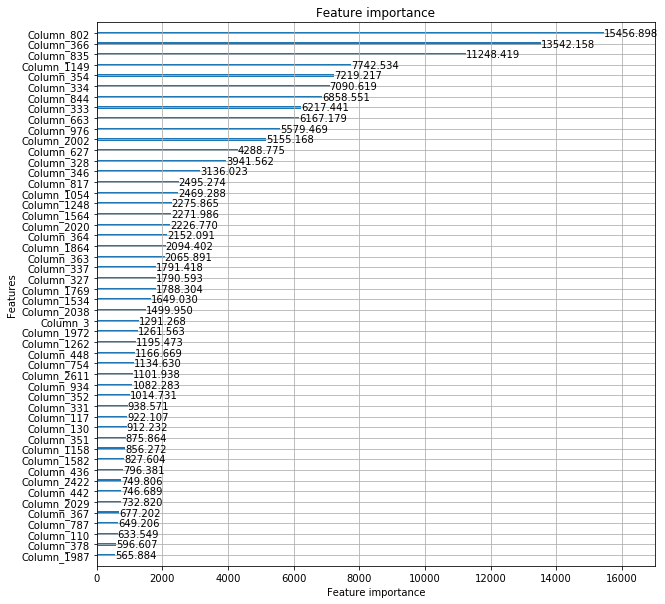

In [191]:
x = lightgbm.plot_importance(lgbm, importance_type='gain', max_num_features=50,figsize = (10,10))

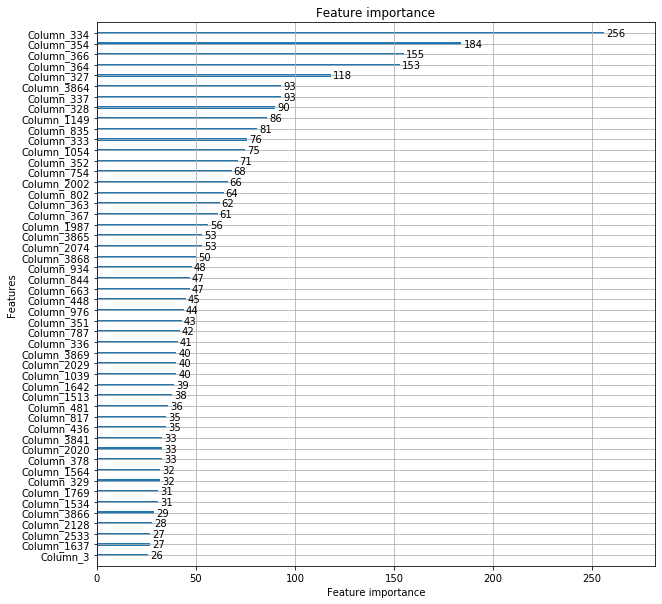

In [192]:
x = lightgbm.plot_importance(lgbm, importance_type='split', max_num_features=50,figsize = (10,10))

In [193]:
imp_feat = lgbm.feature_importance(importance_type = "gain") # these are the feature importances
feat_name = train.columns # these are the feature names
print(len(feat_name))
print(len(imp_feat))
# lets make a dictionary

feat_dict = {}
for c,i in enumerate(imp_feat):
    feat_dict[i] = feat_name[c]
z = sorted(feat_dict.keys(),reverse = True)
count = 0
important_features = [] #this contains all the important features names in a list
for i in z:
    if count<50: # number of features to extract
        important_features.append(feat_dict[i])
    else:
        break
    count =count+1

3870
3870


In [122]:
important_features

['feature_feature_Days_Since_Inspection+Turbulence_In_gforces*Safety_Score',
 'feature_feature_Safety_Score+Days_Since_Inspection+feature_Days_Since_Inspection+Control_Metric',
 'feature_feature_Days_Since_Inspection+Turbulence_In_gforces*feature_Safety_Score-Turbulence_In_gforces',
 'feature_Control_Metric+feature_Accident_Type_Code_Turbulence_In_gforces_max',
 'feature_feature_Days_Since_Inspection+Turbulence_In_gforces*feature_Safety_Score+Turbulence_In_gforces',
 'feature_Days_Since_Inspection*feature_Safety_Score-Adverse_Weather_Metric',
 'feature_feature_Safety_Score+Days_Since_Inspection+feature_Days_Since_Inspection+Turbulence_In_gforces',
 'feature_feature_Accident_Type_Code_Safety_Score_max+Adverse_Weather_Metric',
 'feature_feature_Safety_Score+Days_Since_Inspection+feature_Days_Since_Inspection-Control_Metric',
 'feature_feature_Safety_Score+Days_Since_Inspection*feature_Days_Since_Inspection+Turbulence_In_gforces',
 'feature_feature_Days_Since_Inspection-Turbulence_In_gfor

In [123]:
# RUNNING LGBM WITH BEST features only (top 100)

In [ ]:
imp_feat = lgbm.feature_importance(importance_type = "gain") # these are the feature importances
feat_name = df_feat.columns # these are the feature names

# lets make a dictionary

feat_dict = {}
for c,i in enumerate(imp_feat):
    feat_dict[i] = feat_name[c]
z = sorted(feat_dict.keys(),reverse = True)
count = 0
important_features = [] #this contains all the important features names in a list
for i in z:
    if count<200: # number of features to extract
        important_features.append(feat_dict[i])
    else:
        break
    count =count+1


In [ ]:
len(important_features)

In [ ]:
temp_df = pd.DataFrame()
for i in important_features:
    temp_df[i] = df_feat[i]
print(temp_df.shape)

In [ ]:
temp_df_test = pd.DataFrame()
for i in important_features:
    temp_df_test[i] = df_feat_test[i]
print(temp_df_test.shape)

In [ ]:
lgbm2 = lightgbm

In [ ]:
train_d = lgbm2.Dataset(temp_df,label = y_c)
lgbm = lgbm2.train(all_params,train_set=train_d)
lgbm_pred = lgbm.predict(temp_df_test)
lgbm_pred = convert(lgbm_pred)


In [ ]:
submission = pd.DataFrame()
submission["Accident_ID"] = ID
submission["Severity"] = lgbm_pred
submission.to_csv("E:\Data Science\Kaggle Competitions dataset\Hackerearth Airplane Accident/submission.csv",index = False)

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import lightgbm
from sklearn.metrics import log_loss
from sklearn.model_selection import StratifiedKFold,KFold
from sklearn.ensemble import RandomForestClassifier

In [8]:
from hyperopt import hp, tpe, fmin
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,precision_score,recall_score

In [9]:
#importing all the dataframes

df = pd.read_csv(r"E:\Data Science\Kaggle Competitions dataset\Hackerearth Airplane Accident/train.csv")
df_test = pd.read_csv(r"E:\Data Science\Kaggle Competitions dataset\Hackerearth Airplane Accident/test.csv")
feat_1 = pd.read_csv(r"E:\Data Science\Kaggle Competitions dataset\Hackerearth Airplane Accident\features/features_1_train.csv")
feat_1_test = pd.read_csv(r"E:\Data Science\Kaggle Competitions dataset\Hackerearth Airplane Accident\features/features_1_test.csv")
feat_2_1 = pd.read_csv(r"E:\Data Science\Kaggle Competitions dataset\Hackerearth Airplane Accident\features/features_2_1_train.csv")
feat_2_1_test = pd.read_csv(r"E:\Data Science\Kaggle Competitions dataset\Hackerearth Airplane Accident\features/features_2_1_test.csv")
feat_1_only = pd.read_csv(r"E:\Data Science\Kaggle Competitions dataset\Hackerearth Airplane Accident\features/features_1_only_train.csv")
feat_1_only_test =pd.read_csv(r"E:\Data Science\Kaggle Competitions dataset\Hackerearth Airplane Accident\features/features_1_only_test.csv")
feat_2_only = pd.read_csv(r"E:\Data Science\Kaggle Competitions dataset\Hackerearth Airplane Accident\features/features_2_only_train.csv")
feat_2_only_test = pd.read_csv(r"E:\Data Science\Kaggle Competitions dataset\Hackerearth Airplane Accident\features/features_2_only_test.csv")

In [10]:
ID = df["Accident_ID"]
y = df["Severity"]

df = df.drop(["Accident_ID","Severity"],axis =1)
df_test = df_test.drop("Accident_ID",axis =1)
feat_1 = feat_1.drop("Severity",axis = 1)
feat_2_1 = feat_2_1.drop("Severity",axis = 1)


In [11]:
def convert(predict):
    out = []
    output = []
    for i in range(len(predict)):
        temp = max(predict[i])
        for j in range(4):
            if temp == predict[i][j]:
                out.append(j)
    for i in out:
        if i==0:
            output.append("Highly_Fatal_And_Damaging")
        if i==1:
            output.append("Minor_Damage_And_Injuries")
        if i==2:
            output.append("Significant_Damage_And_Fatalities")
        if i==3:
            output.append("Significant_Damage_And_Serious_Injuries")
    return output

In [12]:
def convert2(x):
    sample = []
    for i in x:
        if i=="Minor_Damage_And_Injuries":
            sample.append(1)
        if i=="Significant_Damage_And_Serious_Injuries":
            sample.append(3)
        if i=="Significant_Damage_And_Fatalities":
            sample.append(2)
        if i=="Highly_Fatal_And_Damaging":
            sample.append(0)
    return sample

In [13]:
def mean_encoding(columns,df,target,df_test): # here columns is the name of the columns to encode and df is the dataframe target is the column name for the target variable
    mean_en = pd.DataFrame()
    mean_en_test = pd.DataFrame()
    temp = pd.DataFrame(df[target])
    n = temp[target].nunique()
    un = temp[target].unique()
    count = 0
    new_target = pd.DataFrame()
    for i in range(n):
        tempx = []
        for j in range(df.shape[0]):
            if un[i] == temp.iloc[j,0]:
                tempx.append(1)
            else:
                tempx.append(0)
        new_target[un[i]] = tempx
    df = df.drop(target,axis = 1)
    temp2 = pd.concat([df,new_target],axis = 1)
    for i in columns:
        for j in range(n):
            temp = temp2.groupby(i)[un[j]].mean()
            mean_en[f"{i}+{un[j]}_mean_encoding"] = temp2[i].map(temp)
            mean_en_test[f"{i}+{un[j]}_mean_encoding"] = df_test[i].map(temp)
            if mean_en[f"{i}+{un[j]}_mean_encoding"].isnull().sum()>0:
                glob_mean = temp2[un[j]].mean()
                mean_en[f"{i}+{un[j]}_mean_encoding"] = mean_en[f"{i}+{un[j]}_mean_encoding"].fillna(glob_mean)
                mean_en_test[f"{i}+{un[j]}_mean_encoding"] = mean_en_test[f"{i}+{un[j]}_mean_encoding"].fillna(glob_mean)
    return mean_en,mean_en_test

In [14]:
def train_lgbm_mean(df_train,df_test,lgbm_para,cols,ytrain,target_col_name):
    """
    df_train:dataframe to train
    df_test:test dataframe
    lgbm_para:all the parameters required for the lightgbm
    cols:the columns for which you would like to do mean encoding
    ytrain: target for training data
    target_col_name:target column name
    
    
    To run this convert and convert2 functions must be there
    
    """
    
    gbm = lightgbm
    
    columns_encode = ["Violations","Accident_Type_Code","Days_Since_Inspection","Total_Safety_Complaints"]

    df_cols = list(df_train.columns)   

    temp_df = pd.concat([df_train,ytrain],axis = 1)
    print(temp_df.shape)
    df_cols.append(target_col_name)

    temp_df.columns = df_cols

    x,z = mean_encoding(cols,temp_df,target_col_name,df_test)

    y_c = convert2(y)
    
    train = pd.concat([temp_df,x],axis = 1)
    test = pd.concat([df_test,z],axis = 1)
    train = train.drop(target_col_name,axis =1)
    train_d = gbm.Dataset(train.values,label = y_c)
    lgbm = gbm.train(lgbm_para,train_set=train_d)
    
    return lgbm

In [15]:
def train_lgbm(df_train,ytrain,lgbm_para):
    """
    df_train:dataframe to train
    df_test:test dataframe
    lgbm_para:all the parameters required for the lightgbm
    cols:the columns for which you would like to do mean encoding
    ytrain: target for training data
    target_col_name:target column name
    
    
    To run this convert and convert2 functions must be there
    
    """
    
    gbm = lightgbm
    train_d = gbm.Dataset(df_train,label = ytrain)
    lgbm = gbm.train(lgbm_para,train_set=train_d)
    
    return lgbm
    

In [16]:
fixed_param = {
               "objective":"multiclass",
               "metric":"multi_logloss",
               "num_class":4,
               "boosting_type":"gbdt",
               "verbose" : -1
              }
space_gbm = {
             'max_depth': hp.uniform('max_depth',5,40),
             'num_iterations': hp.uniform('num_iterations',50, 800),
             'num_leaves': hp.uniform('num_leaves',10, 120),
             'min_data_in_leaf':hp.uniform('min_data_in_leaf',50, 500),
             'learning_rate': hp.uniform('learning_rate',0.01, 0.1),
             'lambda_l1' : hp.uniform('lambda_l1',0.0001,1),
            }

In [17]:
def objective_gbm_orig(param):
    cv = StratifiedKFold(4, random_state=42,shuffle = True)
    li =[]
    for train, test in cv.split(df,y):
        X_train, X_test = df.values[train], df.values[test]
        y_train, y_test = y.values[train], y.values[test]
        y_c = convert2(y_train)
        y_c_t = convert2(y_test)
    
        param = {'num_iterations': int(param['num_iterations']),'max_depth': int(param['max_depth']),'num_leaves': int(param['num_leaves']),'min_data_in_leaf': int(param['min_data_in_leaf']),'learning_rate': float(param['learning_rate']),'lambda_l1':float(param['lambda_l1'])}
        all_params = fixed_param
        for i in param:
            all_params[i] = param[i]
        lgbm = train_lgbm(X_train,y_c,all_params)
        temp = lgbm.predict(X_test)
        li.append(f1_score(y_c_t,convert2(convert(temp)),average = "weighted"))
        temp1 = f1_score(y_c_t,convert2(convert(temp)),average = "weighted")
        print(temp1)
    output = (sum(li)/4)
    print(output)
    return -1*output

In [18]:
best_gbm_df = fmin(objective_gbm_orig,
    space=space_gbm,
    algo=tpe.suggest,
    max_evals=1000)

  0%|          | 0/1000 [00:00<?, ?trial/s, best loss=?]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9360691218498735                                      
0.9520022421808965                                      
0.9543845739481319                                      
  0%|          | 0/1000 [00:04<?, ?trial/s, best loss=?]


KeyboardInterrupt: 

In [64]:
best_gbm_df

{'lambda_l1': 0.00013796786942046923,
 'learning_rate': 0.09511163080262504,
 'max_depth': 22.58474730418112,
 'min_data_in_leaf': 59.29019955122492,
 'num_iterations': 632.8468348453645,
 'num_leaves': 30.4707675498339}

In [32]:
fixed_param = {
               "objective":"multiclass",
               "metric":"multi_logloss",
               "num_class":4,
               "boosting_type":"gbdt",
               "verbose" : -1
              }
space_gbm = {
             'max_depth': hp.uniform('max_depth',5,40),
             'num_iterations': hp.uniform('num_iterations',50, 800),
             'num_leaves': hp.uniform('num_leaves',10, 120),
             'min_data_in_leaf':hp.uniform('min_data_in_leaf',50, 500),
             'learning_rate': hp.uniform('learning_rate',0.01, 0.1),
             'lambda_l1' : hp.uniform('lambda_l1',0.0001,1),
            }

In [33]:
def objective_gbm_feat_1(param):
    cv = StratifiedKFold(4, random_state=42,shuffle = True)
    li =[]
    for train, test in cv.split(feat_1,y):
        X_train, X_test = feat_1.values[train], feat_1.values[test]
        y_train, y_test = y.values[train], y.values[test]
        y_c = convert2(y_train)
        y_c_t = convert2(y_test)
    
        param = {'num_iterations': int(param['num_iterations']),'max_depth': int(param['max_depth']),'num_leaves': int(param['num_leaves']),'min_data_in_leaf': int(param['min_data_in_leaf']),'learning_rate': float(param['learning_rate']),'lambda_l1':float(param['lambda_l1'])}
        all_params = fixed_param
        for i in param:
            all_params[i] = param[i]
        lgbm = train_lgbm(X_train,y_c,all_params)
        temp = lgbm.predict(X_test)
        li.append(f1_score(y_c_t,convert2(convert(temp)),average = "weighted"))
        temp1 = f1_score(y_c_t,convert2(convert(temp)),average = "weighted")
        print(temp1)
    output = (sum(li)/4)
    print(output)
    return -1*output

In [34]:
best_gbm_feat_1 = fmin(objective_gbm_feat_1,
    space=space_gbm,
    algo=tpe.suggest,
    max_evals=1000)

  0%|          | 0/1000 [00:00<?, ?trial/s, best loss=?]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.8580919931865892                                      
0.8699759172353213                                      
0.879914800533482                                       
0.8764548284632386                                      
0.8711093848546578                                      
  0%|          | 1/1000 [00:05<1:30:15,  5.42s/trial, best loss: -0.8711093848546578]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9376505829525583                                                                   
0.9528079570959042                                                                   
0.9535941090507413                                                                   
0.9483275927729985                                                                   
0.9480950604680506                                                                   
  0%|          | 2/1000 [00:13<1:45:45,  6.36s/trial, best loss: -0.9480950604680506]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.8444249950615219                                                                   
0.8656558988624271                                                                   
0.8688351347329457                                                                   
0.8548546574345417                                                                   
0.8584426715228592                                                                   
  0%|          | 3/1000 [00:21<1:53:07,  6.81s/trial, best loss: -0.9480950604680506]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9180771279032987                                                                   
0.9332792002098373                                                                   
0.9392144219984051                                                                   
0.9284535903180436                                                                   
0.9297560851073962                                                                   
  0%|          | 4/1000 [00:28<1:51:55,  6.74s/trial, best loss: -0.9480950604680506]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9296688144759191                                                                   
0.9476162613526129                                                                   
0.9519992291201983                                                                   
0.9379741745599981                                                                   
0.9418146198771821                                                                   
  0%|          | 5/1000 [00:39<2:15:44,  8.19s/trial, best loss: -0.9480950604680506]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.7959122596526281                                                                   
0.8244167152349752                                                                   
0.8143402044356397                                                                   
0.818483981098502                                                                    
0.8132882901054362                                                                   
  1%|          | 6/1000 [00:42<1:49:14,  6.59s/trial, best loss: -0.9480950604680506]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9472678860314888                                                                   
0.9571971080714946                                                                   
0.960388464266856                                                                    
0.951115446759054                                                                    
0.9539922262822234                                                                   
  1%|          | 7/1000 [01:12<3:41:14, 13.37s/trial, best loss: -0.9539922262822234]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.8901810148601652                                                                   
0.9070651281317096                                                                   
0.910551992040064                                                                    
0.9060866872896568                                                                   
0.903471205580399                                                                    
  1%|          | 8/1000 [01:15<2:50:27, 10.31s/trial, best loss: -0.9539922262822234]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9372518670556621                                                                   
0.9496130563640509                                                                   
0.954786447041125                                                                    
0.9451390042900099                                                                   
0.946697593687712                                                                    
  1%|          | 9/1000 [01:32<3:25:11, 12.42s/trial, best loss: -0.9539922262822234]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9424443053633078                                                                   
0.9560024571774013                                                                   
0.9579812437444969                                                                   
0.9499103768394042                                                                   
0.9515845957811525                                                                   
  1%|          | 10/1000 [01:55<4:15:38, 15.49s/trial, best loss: -0.9539922262822234]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9388443214291068                                                                    
0.954797510760244                                                                     
0.9571859862214522                                                                    
0.9471121115544333                                                                    
0.9494849824913091                                                                    
  1%|          | 11/1000 [02:09<4:07:47, 15.03s/trial, best loss: -0.9539922262822234]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.918918044794474                                                                     
0.9407891991186663                                                                    
0.9412057035192097                                                                    
0.9339409915344496                                                                    
0.9337134847416999                                                                    
  1%|          | 12/1000 [02:12<3:08:03, 11.42s/trial, best loss: -0.9539922262822234]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9304822048252419                                                                    
0.9480294423932133                                                                    
0.9468041589518956                                                                    
0.9419735004869783                                                                    
0.9418223266643322                                                                    
  1%|▏         | 13/1000 [02:20<2:51:06, 10.40s/trial, best loss: -0.9539922262822234]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9212671502852166                                                                    
0.9404512419480666                                                                    
0.9456083623091903                                                                    
0.9344130586313855                                                                    
0.9354349532934647                                                                    
  1%|▏         | 14/1000 [02:25<2:26:36,  8.92s/trial, best loss: -0.9539922262822234]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9392453884252979                                                                    
0.9556086191400122                                                                    
0.9579891275170815                                                                    
0.9495150102471326                                                                    
0.9505895363323811                                                                    
  2%|▏         | 15/1000 [02:42<3:06:41, 11.37s/trial, best loss: -0.9539922262822234]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9212973162194388                                                                    
0.9376378902442571                                                                    
0.9367941185145355                                                                    
0.9308701938998428                                                                    
0.9316498797195186                                                                    
  2%|▏         | 16/1000 [02:46<2:28:23,  9.05s/trial, best loss: -0.9539922262822234]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9448554775011472                                                                    
0.9575778237344875                                                                    
0.9607661767818368                                                                    
0.9499207513319348                                                                    
0.9532800573373517                                                                    
  2%|▏         | 17/1000 [03:13<3:55:43, 14.39s/trial, best loss: -0.9539922262822234]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9300495618502829                                                                    
0.9507988375964549                                                                    
0.9495698362979809                                                                    
0.9451180524887769                                                                    
0.9438840720583739                                                                    
  2%|▏         | 18/1000 [03:23<3:36:32, 13.23s/trial, best loss: -0.9539922262822234]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9400408073955264                                                                    
0.9563757796810549                                                                    
0.9591776827176307                                                                    
0.9507265436559926                                                                    
0.9515802033625512                                                                    
  2%|▏         | 19/1000 [03:44<4:15:10, 15.61s/trial, best loss: -0.9539922262822234]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9296821221722931                                                                    
0.9443844685463421                                                                    
0.94680435204267                                                                      
0.938760612292849                                                                     
0.9399078887635386                                                                    
  2%|▏         | 20/1000 [04:03<4:30:08, 16.54s/trial, best loss: -0.9539922262822234]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9444697300560261                                                                    
0.9583945807416149                                                                    
0.9575862557138857                                                                    
0.9523110699343554                                                                    
0.9531904091114706                                                                    
  2%|▏         | 21/1000 [04:20<4:30:55, 16.60s/trial, best loss: -0.9539922262822234]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9380437724753766                                                                    
0.950811603753213                                                                     
0.9539954000074067                                                                    
0.9419789983765133                                                                    
0.9462074436531274                                                                    
  2%|▏         | 22/1000 [04:41<4:54:04, 18.04s/trial, best loss: -0.9539922262822234]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9452602520493923                                                                    
0.9579837983470023                                                                    
0.9575768434285972                                                                    
0.9498879810354978                                                                    
0.9526772187151223                                                                    
  2%|▏         | 23/1000 [05:05<5:19:32, 19.62s/trial, best loss: -0.9539922262822234]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9408483871301502                                                                    
0.9608027494550383                                                                    
0.9619902924573857                                                                    
0.949519101214709                                                                     
0.9532901325643208                                                                    
  2%|▏         | 24/1000 [05:31<5:54:23, 21.79s/trial, best loss: -0.9539922262822234]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9396762247361944                                                                    
0.9580141011371339                                                                    
0.9571814023077412                                                                    
0.951904858183979                                                                     
0.9516941465912621                                                                    
  2%|▎         | 25/1000 [05:56<6:06:42, 22.57s/trial, best loss: -0.9539922262822234]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9404642552923383                                                                    
0.955209662113028                                                                     
0.9583775429268436                                                                    
0.9483140054111565                                                                    
0.9505913664358416                                                                    
  3%|▎         | 26/1000 [06:18<6:06:03, 22.55s/trial, best loss: -0.9539922262822234]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9404699832536348                                                                    
0.9564095289453544                                                                    
0.9543902562416082                                                                    
0.9463053346143843                                                                    
0.9493937757637455                                                                    
  3%|▎         | 27/1000 [06:51<6:56:29, 25.68s/trial, best loss: -0.9539922262822234]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9408634402192338                                                                    
0.9595936354326868                                                                    
0.9583868565024384                                                                    
0.949905632654363                                                                     
0.9521873912021804                                                                    
  3%|▎         | 28/1000 [07:27<7:43:15, 28.60s/trial, best loss: -0.9539922262822234]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9312642220797734                                                                    
0.9479887358011336                                                                    
0.9488178042348508                                                                    
0.9443454707629877                                                                    
0.9431040582196863                                                                    
  3%|▎         | 29/1000 [08:02<8:15:33, 30.62s/trial, best loss: -0.9539922262822234]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9456536928239749                                                                    
0.960003228893803                                                                     
0.9623921266864199                                                                    
0.9523045852264583                                                                    
0.9550884084076641                                                                    
  3%|▎         | 30/1000 [08:26<7:45:07, 28.77s/trial, best loss: -0.9550884084076641]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9452356496653629                                                                    
0.957206431960012                                                                     
0.959583589591386                                                                     
0.9483132060816394                                                                    
0.9525847193246001                                                                    
  3%|▎         | 31/1000 [08:43<6:46:28, 25.17s/trial, best loss: -0.9550884084076641]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9488613855555252                                                                    
0.9584013632982851                                                                    
0.9595753538095764                                                                    
0.9503078042212532                                                                    
0.95428647672116                                                                      
  3%|▎         | 32/1000 [09:06<6:34:33, 24.46s/trial, best loss: -0.9550884084076641]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9404377025828273                                                                    
0.9576071373888299                                                                    
0.9559858584189785                                                                    
0.9483199484997185                                                                    
0.9505876617225886                                                                    
  3%|▎         | 33/1000 [09:17<5:28:23, 20.38s/trial, best loss: -0.9550884084076641]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9412536274500056                                                                    
0.958014824374517                                                                     
0.9591705691824827                                                                    
0.9515084083970156                                                                    
0.9524868573510052                                                                    
  3%|▎         | 34/1000 [09:36<5:23:18, 20.08s/trial, best loss: -0.9550884084076641]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9456403304224968                                                                    
0.9587952940448197                                                                    
0.9623782288820164                                                                    
0.9527076520670718                                                                    
0.9548803763541012                                                                    
  4%|▎         | 35/1000 [10:02<5:52:24, 21.91s/trial, best loss: -0.9550884084076641]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9396186985006062                                                                    
0.9551887681227338                                                                    
0.9563902222896541                                                                    
0.94995788581871                                                                      
0.950288893682926                                                                     
  4%|▎         | 36/1000 [10:10<4:44:10, 17.69s/trial, best loss: -0.9550884084076641]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9452383053264756                                                                    
0.9607931962842001                                                                    
0.9603793392562853                                                                    
0.9523043442929704                                                                    
0.9546787962899829                                                                    
  4%|▎         | 37/1000 [10:34<5:11:12, 19.39s/trial, best loss: -0.9550884084076641]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9444593534399369                                                                    
0.9540017937367691                                                                    
0.9591837093597023                                                                    
0.9495130622777598                                                                    
0.9517894797035421                                                                    
  4%|▍         | 38/1000 [10:55<5:18:08, 19.84s/trial, best loss: -0.9550884084076641]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9492470382288225                                                                    
0.9615926292223885                                                                    
0.9611801841442394                                                                    
0.9539253675680277                                                                    
0.9564863047908696                                                                    
  4%|▍         | 39/1000 [11:22<5:54:18, 22.12s/trial, best loss: -0.9564863047908696]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9488486046825837                                                                    
0.9599852772116189                                                                    
0.9619756781328298                                                                    
0.9515287999642424                                                                    
0.9555845899978187                                                                    
  4%|▍         | 40/1000 [11:42<5:44:15, 21.52s/trial, best loss: -0.9564863047908696]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9464649655518339                                                                    
0.9607872496391526                                                                    
0.9607929843435401                                                                    
0.9519254797084167                                                                    
0.9549926698107358                                                                    
  4%|▍         | 41/1000 [11:57<5:12:44, 19.57s/trial, best loss: -0.9564863047908696]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9472535852658177                                                                    
0.9599886790614764                                                                    
0.9623857255208892                                                                    
0.9519265559202468                                                                    
0.9553886364421076                                                                    
  4%|▍         | 42/1000 [12:18<5:19:57, 20.04s/trial, best loss: -0.9564863047908696]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9420502830067152                                                                    
0.9584091226137014                                                                    
0.9551785495289685                                                                    
0.9487275370598068                                                                    
0.951091373052298                                                                     
  4%|▍         | 43/1000 [12:30<4:38:51, 17.48s/trial, best loss: -0.9564863047908696]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9424597996162898                                                                    
0.9536129063421589                                                                    
0.9559727144062624                                                                    
0.9503067624463778                                                                    
0.9505880457027723                                                                    
  4%|▍         | 44/1000 [12:42<4:12:53, 15.87s/trial, best loss: -0.9564863047908696]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9265066999701052                                                                    
0.9404349195598799                                                                    
0.9424054278831194                                                                    
0.933607046522565                                                                     
0.9357385234839173                                                                    
  4%|▍         | 45/1000 [12:47<3:20:50, 12.62s/trial, best loss: -0.9564863047908696]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9356720594928416                                                                    
0.948430509606887                                                                     
0.9523795740297277                                                                    
0.943579933755296                                                                     
0.9450155192211881                                                                    
  5%|▍         | 46/1000 [12:54<2:55:19, 11.03s/trial, best loss: -0.9564863047908696]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9436448325980238                                                                    
0.955211329241053                                                                     
0.959591462915066                                                                     
0.9483276659053782                                                                    
0.9516938226648802                                                                    
  5%|▍         | 47/1000 [13:08<3:06:36, 11.75s/trial, best loss: -0.9564863047908696]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9444507238892804                                                                    
0.956011105704631                                                                     
0.9599914214887273                                                                    
0.9514991435556999                                                                    
0.9529880986595847                                                                    
  5%|▍         | 48/1000 [13:27<3:43:34, 14.09s/trial, best loss: -0.9564863047908696]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.94606217120511                                                                      
0.9604006466983472                                                                    
0.961585867818728                                                                     
0.9511121786055443                                                                    
0.9547902160819324                                                                    
  5%|▍         | 49/1000 [13:50<4:23:05, 16.60s/trial, best loss: -0.9564863047908696]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9456582521125831                                                                    
0.9591893067557031                                                                    
0.9615899098077408                                                                    
0.951531807178018                                                                     
0.9544923189635113                                                                    
  5%|▌         | 50/1000 [14:10<4:41:18, 17.77s/trial, best loss: -0.9564863047908696]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9360708984109262                                                                    
0.9515965417820705                                                                    
0.9543882857458735                                                                    
0.9475420990140575                                                                    
0.947399456238232                                                                     
  5%|▌         | 51/1000 [14:22<4:11:19, 15.89s/trial, best loss: -0.9564863047908696]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9460572892532028                                                                    
0.9595881778205451                                                                    
0.9611776576307626                                                                    
0.9498986894963838                                                                    
0.9541804535502235                                                                    
  5%|▌         | 52/1000 [14:37<4:10:20, 15.84s/trial, best loss: -0.9564863047908696]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9328457241365626                                                                    
0.946023100823232                                                                     
0.9487859124850602                                                                    
0.9363778963802395                                                                    
0.9410081584562736                                                                    
  5%|▌         | 53/1000 [14:47<3:39:06, 13.88s/trial, best loss: -0.9564863047908696]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9284918954578755                                                                    
0.9419962715010355                                                                    
0.9472061823022799                                                                    
0.9387955116922465                                                                    
0.9391224652383594                                                                    
  5%|▌         | 54/1000 [14:51<2:53:16, 10.99s/trial, best loss: -0.9564863047908696]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9396477227418201                                                                    
0.9555903739566344                                                                    
0.9579920829982397                                                                    
0.945925503654836                                                                     
0.9497889208378826                                                                    
  6%|▌         | 55/1000 [14:58<2:36:42,  9.95s/trial, best loss: -0.9564863047908696]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9460549865848569                                                                    
0.9600037495782376                                                                    
0.9587763018320217                                                                    
0.9526866398204563                                                                    
0.9543804194538932                                                                    
  6%|▌         | 56/1000 [15:21<3:37:53, 13.85s/trial, best loss: -0.9564863047908696]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.8774864493406453                                                                    
0.8872244005946898                                                                    
0.8978242324384624                                                                    
0.8931615076767984                                                                    
0.888924147512649                                                                     
  6%|▌         | 57/1000 [15:24<2:44:22, 10.46s/trial, best loss: -0.9564863047908696]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9316432967692804                                                                    
0.9468248750218994                                                                    
0.9491937025422507                                                                    
0.939989455893699                                                                     
0.9419128325567824                                                                    
  6%|▌         | 58/1000 [15:40<3:09:54, 12.10s/trial, best loss: -0.9564863047908696]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.946436343132013                                                                     
0.9591909902637524                                                                    
0.9595625639925128                                                                    
0.950332028415964                                                                     
0.9538804814510606                                                                    
  6%|▌         | 59/1000 [15:56<3:27:00, 13.20s/trial, best loss: -0.9564863047908696]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9384573137748516                                                                    
0.9508078513076567                                                                    
0.9507865652467824                                                                    
0.9479532031547782                                                                    
0.9470012333710172                                                                    
  6%|▌         | 60/1000 [16:08<3:21:41, 12.87s/trial, best loss: -0.9564863047908696]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9356615018373337                                                                    
0.9504208536414035                                                                    
0.9503793444354138                                                                    
0.9435486674251851                                                                    
0.945002591834834                                                                     
  6%|▌         | 61/1000 [16:15<2:53:14, 11.07s/trial, best loss: -0.9564863047908696]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9392642627468619                                                                    
0.9572069107884301                                                                    
0.9575867166982276                                                                    
0.9478927528602636                                                                    
0.9504876607734458                                                                    
  6%|▌         | 62/1000 [16:28<3:03:27, 11.73s/trial, best loss: -0.9564863047908696]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9380515619666657                                                                    
0.9520080654407147                                                                    
0.9531910628690633                                                                    
0.9463569369356967                                                                    
0.9474019068030352                                                                    
  6%|▋         | 63/1000 [16:41<3:10:41, 12.21s/trial, best loss: -0.9564863047908696]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9332767252526774                                                                    
0.9511959538822513                                                                    
0.9535928096854197                                                                    
0.9471509815537903                                                                    
0.9463041175935347                                                                    
  6%|▋         | 64/1000 [16:57<3:27:34, 13.31s/trial, best loss: -0.9564863047908696]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.922087124135482                                                                     
0.9435852313918033                                                                    
0.9448203084180264                                                                    
0.9379305940426288                                                                    
0.9371058144969853                                                                    
  6%|▋         | 65/1000 [17:01<2:44:53, 10.58s/trial, best loss: -0.9564863047908696]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9452464711983524                                                                    
0.9572072908739787                                                                    
0.9603757382909691                                                                    
0.9527310762401516                                                                    
0.9538901441508629                                                                    
  7%|▋         | 66/1000 [17:21<3:26:35, 13.27s/trial, best loss: -0.9564863047908696]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9468490482745919                                                                    
0.9599998643631412                                                                    
0.9619843530051144                                                                    
0.9535167142335992                                                                    
0.9555874949691117                                                                    
  7%|▋         | 67/1000 [17:42<4:03:12, 15.64s/trial, best loss: -0.9564863047908696]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9440758371702263                                                                    
0.9595972132902439                                                                    
0.9619805389815894                                                                    
0.9507130938806068                                                                    
0.9540916708306666                                                                    
  7%|▋         | 68/1000 [18:01<4:18:48, 16.66s/trial, best loss: -0.9564863047908696]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.946452825242075                                                                     
0.9611802635097986                                                                    
0.959963593010244                                                                     
0.9515171495389053                                                                    
0.9547784578252557                                                                    
  7%|▋         | 69/1000 [18:19<4:26:04, 17.15s/trial, best loss: -0.9564863047908696]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9480653710355835                                                                    
0.9599986499852815                                                                    
0.9607771627825045                                                                    
0.951524534039302                                                                     
0.9550914294606679                                                                    
  7%|▋         | 70/1000 [18:42<4:51:35, 18.81s/trial, best loss: -0.9564863047908696]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9432512811231345                                                                    
0.9591994210232347                                                                    
0.9595869535826128                                                                    
0.949512358104748                                                                     
0.9528875034584325                                                                    
  7%|▋         | 71/1000 [19:01<4:51:43, 18.84s/trial, best loss: -0.9564863047908696]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9456472262425855                                                                    
0.9591852508008866                                                                    
0.9591811655576042                                                                    
0.9495270279395406                                                                    
0.9533851676351542                                                                    
  7%|▋         | 72/1000 [19:24<5:11:23, 20.13s/trial, best loss: -0.9564863047908696]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9460649769747013                                                                    
0.9576058917087532                                                                    
0.9595845129088809                                                                    
0.9491021640163331                                                                    
0.953089386402167                                                                     
  7%|▋         | 73/1000 [19:41<4:57:28, 19.25s/trial, best loss: -0.9564863047908696]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9476574835413398                                                                    
0.9591883194873125                                                                    
0.9595836603065367                                                                    
0.9551152153886331                                                                    
0.9553861696809556                                                                    
  7%|▋         | 74/1000 [20:06<5:21:13, 20.81s/trial, best loss: -0.9564863047908696]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9444449887887136                                                                    
0.9607990018706951                                                                    
0.9623811747839065                                                                    
0.9523214439000339                                                                    
0.9549866523358373                                                                    
  8%|▊         | 75/1000 [20:27<5:24:08, 21.03s/trial, best loss: -0.9564863047908696]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9460672420588189                                                                    
0.9611913656767287                                                                    
0.9615812399180593                                                                    
0.952323372940051                                                                     
0.9552908051484145                                                                    
  8%|▊         | 76/1000 [20:51<5:34:21, 21.71s/trial, best loss: -0.9564863047908696]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9496416504240012                                                                    
0.9588101377732778                                                                    
0.9623862190694795                                                                    
0.9523365080155738                                                                    
0.955793628820583                                                                     
  8%|▊         | 77/1000 [21:16<5:48:35, 22.66s/trial, best loss: -0.9564863047908696]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9432613246945364                                                                    
0.9588117890947455                                                                    
0.9611814924477461                                                                    
0.9522915956680392                                                                    
0.9538865504762668                                                                    
  8%|▊         | 78/1000 [21:40<5:54:54, 23.10s/trial, best loss: -0.9564863047908696]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.942863966047998                                                                     
0.9552070026566316                                                                    
0.9575936227287908                                                                    
0.9515014526069818                                                                    
0.9517915110101005                                                                    
  8%|▊         | 79/1000 [22:05<6:07:09, 23.92s/trial, best loss: -0.9564863047908696]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9448519498212523                                                                    
0.9567911595615788                                                                    
0.9611814146427087                                                                    
0.9511373339571458                                                                    
0.9534904644956714                                                                    
  8%|▊         | 80/1000 [22:31<6:12:00, 24.26s/trial, best loss: -0.9564863047908696]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9408591531988705                                                                    
0.9540010255918263                                                                    
0.9567979409240018                                                                    
0.9463113038324066                                                                    
0.9494923558867763                                                                    
  8%|▊         | 81/1000 [22:49<5:45:08, 22.53s/trial, best loss: -0.9564863047908696]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9452528071891506                                                                    
0.9580089681317099                                                                    
0.9603988941479196                                                                    
0.9515339041413565                                                                    
0.9537986434025342                                                                    
  8%|▊         | 82/1000 [23:12<5:48:25, 22.77s/trial, best loss: -0.9564863047908696]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9472655031043874                                                                    
0.9600034884913493                                                                    
0.959182906883754                                                                     
0.9519073029993737                                                                    
0.9545898003697162                                                                    
  8%|▊         | 83/1000 [23:46<6:38:13, 26.06s/trial, best loss: -0.9564863047908696]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9424507915260044                                                                    
0.9552166043221899                                                                    
0.9579758550459124                                                                    
0.9499233395846848                                                                    
0.951391647619698                                                                     
  8%|▊         | 84/1000 [24:07<6:14:19, 24.52s/trial, best loss: -0.9564863047908696]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9464469167136388                                                                    
0.9603892802597315                                                                    
0.9603859890816814                                                                    
0.9507282787370777                                                                    
0.9544876161980324                                                                    
  8%|▊         | 85/1000 [24:34<6:25:51, 25.30s/trial, best loss: -0.9564863047908696]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9440404431520912                                                                    
0.9559986254577773                                                                    
0.9583735541377286                                                                    
0.9467293514938704                                                                    
0.9512854935603668                                                                    
  9%|▊         | 86/1000 [24:53<5:58:15, 23.52s/trial, best loss: -0.9564863047908696]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9440452103127186                                                                    
0.9579748129780801                                                                    
0.9555795130796231                                                                    
0.9515284890203826                                                                    
0.9522820063477011                                                                    
  9%|▊         | 87/1000 [25:33<7:12:22, 28.41s/trial, best loss: -0.9564863047908696]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9476617912655037                                                                    
0.9595973529307524                                                                    
0.9615859538280874                                                                    
0.9526942417754569                                                                    
0.9553848349499501                                                                    
  9%|▉         | 88/1000 [25:58<6:56:06, 27.38s/trial, best loss: -0.9564863047908696]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9205045245904909                                                                    
0.9380111005198458                                                                    
0.9416196693757993                                                                    
0.9319303187198741                                                                    
0.9330164033015025                                                                    
  9%|▉         | 89/1000 [26:16<6:12:37, 24.54s/trial, best loss: -0.9564863047908696]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9460346501914795                                                                    
0.9604002894080462                                                                    
0.9607905949035256                                                                    
0.9539242170422697                                                                    
0.9552874378863302                                                                    
  9%|▉         | 90/1000 [26:48<6:43:45, 26.62s/trial, best loss: -0.9564863047908696]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9456507889270747                                                                    
0.9580161063218929                                                                    
0.9603769781543636                                                                    
0.9487034171478557                                                                    
0.9531868226377969                                                                    
  9%|▉         | 91/1000 [27:16<6:52:39, 27.24s/trial, best loss: -0.9564863047908696]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9456513349449296                                                                    
0.9587940517080474                                                                    
0.9631794185395338                                                                    
0.9519345568436658                                                                    
0.9548898405090442                                                                    
  9%|▉         | 92/1000 [27:38<6:26:36, 25.55s/trial, best loss: -0.9564863047908696]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.942467968799694                                                                     
0.9588101377732778                                                                    
0.9587864384013915                                                                    
0.9506717358219233                                                                    
0.9526840701990716                                                                    
  9%|▉         | 93/1000 [28:03<6:23:08, 25.35s/trial, best loss: -0.9564863047908696]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9292826070573544                                                                    
0.9468296477134891                                                                    
0.947996598298888                                                                     
0.9420081371477023                                                                    
0.9415292475543584                                                                    
  9%|▉         | 94/1000 [28:14<5:16:41, 20.97s/trial, best loss: -0.9564863047908696]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9436542138849495                                                                    
0.9599890946841966                                                                    
0.9607847379349354                                                                    
0.949519569901343                                                                     
0.9534869041013561                                                                    
 10%|▉         | 95/1000 [28:31<5:00:05, 19.90s/trial, best loss: -0.9564863047908696]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9440570914864189                                                                    
0.9604099413236976                                                                    
0.9607829548379472                                                                    
0.953539234644897                                                                     
0.9546973055732402                                                                    
 10%|▉         | 96/1000 [28:53<5:07:24, 20.40s/trial, best loss: -0.9564863047908696]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9476484577155392                                                                    
0.9619991715796983                                                                    
0.9603785269945303                                                                    
0.9519255178167413                                                                    
0.9554879185266272                                                                    
 10%|▉         | 97/1000 [29:19<5:33:19, 22.15s/trial, best loss: -0.9564863047908696]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9436599462953577                                                                    
0.9603887410899049                                                                    
0.9635818343423594                                                                    
0.951132018023937                                                                     
0.9546906349378897                                                                    
 10%|▉         | 98/1000 [29:42<5:39:15, 22.57s/trial, best loss: -0.9564863047908696]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9348650656097596                                                                    
0.9475901702405827                                                                    
0.9511947764839158                                                                    
0.9435470435536768                                                                    
0.9442992639719837                                                                    
 10%|▉         | 99/1000 [29:59<5:10:45, 20.69s/trial, best loss: -0.9564863047908696]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9380419615413536                                                                    
0.9536013707471355                                                                    
0.9579932606388342                                                                    
0.9458841265291618                                                                    
0.9488801798641212                                                                    
 10%|█         | 100/1000 [30:16<4:56:28, 19.76s/trial, best loss: -0.9564863047908696]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9516572156506067                                                                     
0.9615948419192107                                                                     
0.9599793510019963                                                                     
0.9531173621497789                                                                     
0.956587192680398                                                                      
 10%|█         | 101/1000 [30:46<5:40:12, 22.71s/trial, best loss: -0.956587192680398] 

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9396581692380743                                                                    
0.9536109152792793                                                                    
0.9531836333022986                                                                    
0.9463363883728629                                                                    
0.9481972765481288                                                                    
 10%|█         | 102/1000 [30:57<4:46:03, 19.11s/trial, best loss: -0.956587192680398]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9372324230670904                                                                    
0.9543800531077941                                                                    
0.9531997041221911                                                                    
0.9479458552136604                                                                    
0.9481895088776839                                                                    
 10%|█         | 103/1000 [31:13<4:31:46, 18.18s/trial, best loss: -0.956587192680398]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9456534546723893                                                                    
0.9544104631024156                                                                    
0.9579828053885394                                                                    
0.9514960676807447                                                                    
0.9523856977110222                                                                    
 10%|█         | 104/1000 [31:27<4:13:55, 17.00s/trial, best loss: -0.956587192680398]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.93366766788244                                                                      
0.9496117267466448                                                                    
0.9539801660856451                                                                    
0.9447829553923281                                                                    
0.9455106290267645                                                                    
 10%|█         | 105/1000 [31:34<3:31:34, 14.18s/trial, best loss: -0.956587192680398]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9460556193928327                                                                    
0.9607997036104106                                                                    
0.9607863979203323                                                                    
0.9523021042219751                                                                    
0.9549859562863876                                                                    
 11%|█         | 106/1000 [31:51<3:40:15, 14.78s/trial, best loss: -0.956587192680398]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9376764176475386                                                                    
0.9516082989092529                                                                    
0.9519937851055911                                                                    
0.9483357558959757                                                                    
0.9474035643895896                                                                    
 11%|█         | 107/1000 [32:04<3:33:53, 14.37s/trial, best loss: -0.956587192680398]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9428728706400971                                                                    
0.9596080044142234                                                                    
0.9583806988021064                                                                    
0.9519128227821064                                                                    
0.9531935991596334                                                                    
 11%|█         | 108/1000 [32:20<3:42:50, 14.99s/trial, best loss: -0.956587192680398]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9440291290589798                                                                    
0.956795258108324                                                                     
0.9583869717190618                                                                    
0.951133876173432                                                                     
0.9525863087649494                                                                    
 11%|█         | 109/1000 [32:36<3:45:12, 15.17s/trial, best loss: -0.956587192680398]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9360526623779799                                                                    
0.9512256973964046                                                                    
0.9543904147689621                                                                    
0.9451546585400312                                                                    
0.9467058582708445                                                                    
 11%|█         | 110/1000 [32:47<3:24:18, 13.77s/trial, best loss: -0.956587192680398]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9372584498731319                                                                    
0.9487927560871904                                                                    
0.948413352659039                                                                     
0.9411482489294468                                                                    
0.943903201887202                                                                     
 11%|█         | 111/1000 [32:54<2:56:02, 11.88s/trial, best loss: -0.956587192680398]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9416696810711347                                                                    
0.9588075387444205                                                                    
0.9579843749295979                                                                    
0.9519109680892727                                                                    
0.9525931407086063                                                                    
 11%|█         | 112/1000 [33:19<3:54:31, 15.85s/trial, best loss: -0.956587192680398]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9416530859296312                                                                    
0.9575897315149141                                                                    
0.9611818607469875                                                                    
0.9499443590593981                                                                    
0.9525922593127327                                                                    
 11%|█▏        | 113/1000 [33:35<3:53:09, 15.77s/trial, best loss: -0.956587192680398]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9472466671140973                                                                    
0.9599851283864753                                                                    
0.9619748776056515                                                                    
0.9511203756181263                                                                    
0.9550817621810876                                                                    
 11%|█▏        | 114/1000 [33:55<4:14:29, 17.23s/trial, best loss: -0.956587192680398]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9416492566219967                                                                    
0.9552101034958735                                                                    
0.958786189118831                                                                     
0.9498998615125328                                                                    
0.9513863526873085                                                                    
 12%|█▏        | 115/1000 [34:11<4:09:09, 16.89s/trial, best loss: -0.956587192680398]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9424600423076434                                                                    
0.9536166536403452                                                                    
0.9579791888424722                                                                    
0.9479233305300513                                                                    
0.950494803830128                                                                     
 12%|█▏        | 116/1000 [34:29<4:10:19, 16.99s/trial, best loss: -0.956587192680398]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9472565305488119                                                                    
0.9607772081803844                                                                    
0.9579799572482843                                                                    
0.949888918192391                                                                     
0.9539756535424679                                                                    
 12%|█▏        | 117/1000 [34:50<4:30:50, 18.40s/trial, best loss: -0.956587192680398]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9444459975166198                                                                    
0.9552009611615176                                                                    
0.9587893690789293                                                                    
0.9491026457738719                                                                    
0.9518847433827348                                                                    
 12%|█▏        | 118/1000 [35:03<4:05:45, 16.72s/trial, best loss: -0.956587192680398]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9488646700241163                                                                    
0.9619998520929696                                                                    
0.9615729256279215                                                                    
0.9523213169133358                                                                    
0.9561896911645857                                                                    
 12%|█▏        | 119/1000 [35:24<4:24:35, 18.02s/trial, best loss: -0.956587192680398]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9420536137447808                                                                    
0.9536021193859316                                                                    
0.9551934000743062                                                                    
0.9490992681033695                                                                    
0.9499871003270971                                                                    
 12%|█▏        | 120/1000 [35:32<3:41:13, 15.08s/trial, best loss: -0.956587192680398]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9472485809123902                                                                    
0.9611943464997293                                                                    
0.9619874658780109                                                                    
0.9519179237770095                                                                    
0.955587079266785                                                                     
 12%|█▏        | 121/1000 [36:05<4:57:56, 20.34s/trial, best loss: -0.956587192680398]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9388432068796111                                                                    
0.9552021148512838                                                                    
0.9571982874870033                                                                    
0.9507006686483279                                                                    
0.9504860694665567                                                                    
 12%|█▏        | 122/1000 [36:14<4:09:02, 17.02s/trial, best loss: -0.956587192680398]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9472439541131702                                                                    
0.9603960755507862                                                                    
0.9615941699865236                                                                    
0.951515997313562                                                                     
0.9551875492410105                                                                    
 12%|█▏        | 123/1000 [36:32<4:13:50, 17.37s/trial, best loss: -0.956587192680398]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9300533729439405                                                                    
0.9472132674836162                                                                    
0.9523900555465435                                                                    
0.9375630352848993                                                                    
0.94180493281475                                                                      
 12%|█▏        | 124/1000 [36:42<3:38:01, 14.93s/trial, best loss: -0.956587192680398]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.946452102747931                                                                     
0.9559919879578415                                                                    
0.9587822703807296                                                                    
0.9510964399550969                                                                    
0.9530807002603998                                                                    
 12%|█▎        | 125/1000 [37:00<3:53:24, 16.00s/trial, best loss: -0.956587192680398]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9480479739141313                                                                    
0.9615936960907718                                                                    
0.9607864889973549                                                                    
0.9511218064917825                                                                    
0.9553874913735101                                                                    
 13%|█▎        | 126/1000 [37:21<4:14:54, 17.50s/trial, best loss: -0.956587192680398]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9428475641026776                                                                    
0.9532177038197908                                                                    
0.9571714839256039                                                                    
0.9483129579995804                                                                    
0.9503874274619131                                                                    
 13%|█▎        | 127/1000 [37:34<3:55:15, 16.17s/trial, best loss: -0.956587192680398]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9436592788783852                                                                    
0.9575843186205518                                                                    
0.9591956790113325                                                                    
0.9495316043129061                                                                    
0.9524927202057938                                                                    
 13%|█▎        | 128/1000 [37:48<3:43:20, 15.37s/trial, best loss: -0.956587192680398]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9264555232112532                                                                    
0.9432105330908311                                                                    
0.9459965483874876                                                                    
0.9376076167694689                                                                    
0.9383175553647602                                                                    
 13%|█▎        | 129/1000 [37:54<3:04:15, 12.69s/trial, best loss: -0.956587192680398]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9313704778973406                                                                    
0.9416207170261259                                                                    
0.9439921537733202                                                                    
0.9391629835032029                                                                    
0.9390365830499974                                                                    
 13%|█▎        | 130/1000 [37:57<2:22:08,  9.80s/trial, best loss: -0.956587192680398]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.948465386566871                                                                     
0.9588030542049357                                                                    
0.9639760261993071                                                                    
0.9523367902107237                                                                    
0.9558953142954595                                                                    
 13%|█▎        | 131/1000 [38:19<3:14:22, 13.42s/trial, best loss: -0.956587192680398]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9412446135792638                                                                    
0.9568007062752837                                                                    
0.9559864920239092                                                                    
0.9499141742869366                                                                    
0.9509864965413484                                                                    
 13%|█▎        | 132/1000 [38:28<2:55:08, 12.11s/trial, best loss: -0.956587192680398]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9400671256995908                                                                    
0.9503950854998553                                                                    
0.9547833582862657                                                                    
0.9491446908754306                                                                    
0.9485975650902857                                                                    
 13%|█▎        | 133/1000 [38:42<3:00:09, 12.47s/trial, best loss: -0.956587192680398]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9344491368246016                                                                    
0.9535996045399792                                                                    
0.9552137607109009                                                                    
0.9467488677280386                                                                    
0.9475028424508801                                                                    
 13%|█▎        | 134/1000 [38:49<2:38:35, 10.99s/trial, best loss: -0.956587192680398]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9360636240211849                                                                    
0.9480053944222191                                                                    
0.9515862385042266                                                                    
0.9463667438566029                                                                    
0.9455055002010583                                                                    
 14%|█▎        | 135/1000 [39:03<2:49:34, 11.76s/trial, best loss: -0.956587192680398]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9440398739606055                                                                    
0.9583811247104184                                                                    
0.9591851614088811                                                                    
0.948732813801027                                                                     
0.952584743470233                                                                     
 14%|█▎        | 136/1000 [39:12<2:38:04, 10.98s/trial, best loss: -0.956587192680398]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9456472028049916                                                                    
0.9595964758823621                                                                    
0.9611776087326982                                                                    
0.9530973701632612                                                                    
0.9548796643958284                                                                    
 14%|█▎        | 137/1000 [39:33<3:21:53, 14.04s/trial, best loss: -0.956587192680398]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9384483526774372                                                                    
0.9500080268566646                                                                    
0.9543909285320594                                                                    
0.9467313729993118                                                                    
0.9473946702663683                                                                    
 14%|█▍        | 138/1000 [39:46<3:15:50, 13.63s/trial, best loss: -0.956587192680398]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9412403690548116                                                                    
0.9591985810726652                                                                    
0.9615821743834112                                                                    
0.9495394663427742                                                                    
0.9528901477134156                                                                    
 14%|█▍        | 139/1000 [39:58<3:12:14, 13.40s/trial, best loss: -0.956587192680398]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9081561672096664                                                                    
0.9296171885034566                                                                    
0.9284263729022059                                                                    
0.9262901236545354                                                                    
0.923122463067466                                                                     
 14%|█▍        | 140/1000 [40:02<2:29:13, 10.41s/trial, best loss: -0.956587192680398]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.93163470059999                                                                      
0.9503638879714165                                                                    
0.9528023032940836                                                                    
0.9411575579103293                                                                    
0.9439896124439549                                                                    
 14%|█▍        | 141/1000 [40:15<2:41:57, 11.31s/trial, best loss: -0.956587192680398]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.944054465142259                                                                     
0.9532074382427309                                                                    
0.9559869133398935                                                                    
0.9475338812885915                                                                    
0.9501956745033686                                                                    
 14%|█▍        | 142/1000 [40:33<3:07:37, 13.12s/trial, best loss: -0.956587192680398]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9348465838032327                                                                    
0.9512163185750165                                                                    
0.9563828128420233                                                                    
0.9467196439383616                                                                    
0.9472913397896586                                                                    
 14%|█▍        | 143/1000 [40:40<2:44:07, 11.49s/trial, best loss: -0.956587192680398]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9440660833497986                                                                    
0.9563971801865362                                                                    
0.9607729919045173                                                                    
0.9514810857565513                                                                    
0.9531793352993508                                                                    
 14%|█▍        | 144/1000 [41:00<3:17:03, 13.81s/trial, best loss: -0.956587192680398]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9392596089712848                                                                    
0.9568074731890989                                                                    
0.9543804256258063                                                                    
0.9463518911883448                                                                    
0.9491998497436337                                                                    
 14%|█▍        | 145/1000 [41:26<4:09:23, 17.50s/trial, best loss: -0.956587192680398]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.948056636315817                                                                     
0.959601911354523                                                                     
0.9615593273174844                                                                    
0.9527374203138446                                                                    
0.9554888238254172                                                                    
 15%|█▍        | 146/1000 [41:48<4:28:50, 18.89s/trial, best loss: -0.956587192680398]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9480602416961388                                                                    
0.9620042739211098                                                                    
0.9607691547724555                                                                    
0.9535317044668902                                                                    
0.9560913437141485                                                                    
 15%|█▍        | 147/1000 [42:15<5:02:00, 21.24s/trial, best loss: -0.956587192680398]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9468483687934257                                                                    
0.9612034202724743                                                                    
0.9611733905499282                                                                    
0.9519228141573003                                                                    
0.9552869984432821                                                                    
 15%|█▍        | 148/1000 [42:37<5:06:31, 21.59s/trial, best loss: -0.956587192680398]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.945662407032632                                                                     
0.9604090729100399                                                                    
0.9631850896206219                                                                    
0.9519070971403645                                                                    
0.9552909166759146                                                                    
 15%|█▍        | 149/1000 [42:59<5:08:27, 21.75s/trial, best loss: -0.956587192680398]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9488517622786595                                                                    
0.961998800330267                                                                     
0.9639813037292458                                                                    
0.9507072455887706                                                                    
0.9563847779817357                                                                    
 15%|█▌        | 150/1000 [43:26<5:29:39, 23.27s/trial, best loss: -0.956587192680398]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9464477847789531                                                                    
0.9615895167674263                                                                    
0.961565567310288                                                                     
0.9523262210672839                                                                    
0.9554822724809878                                                                    
 15%|█▌        | 151/1000 [43:56<5:57:44, 25.28s/trial, best loss: -0.956587192680398]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9488379465493918                                                                    
0.9635876830643952                                                                    
0.961566216417448                                                                     
0.9519160675570097                                                                    
0.9564769783970613                                                                    
 15%|█▌        | 152/1000 [44:21<5:57:49, 25.32s/trial, best loss: -0.956587192680398]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9504235030390351                                                                    
0.9643903199250985                                                                    
0.9635702376326688                                                                    
0.9539236737285223                                                                    
0.9580769335813312                                                                    
 15%|█▌        | 153/1000 [44:42<5:39:09, 24.03s/trial, best loss: -0.9580769335813312]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9428446746058469                                                                     
0.9591953402965561                                                                     
0.9623835221294019                                                                     
0.9503200734089604                                                                     
0.9536859026101913                                                                     
 15%|█▌        | 154/1000 [45:07<5:41:14, 24.20s/trial, best loss: -0.9580769335813312]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9460578736832209                                                                     
0.960409020587317                                                                      
0.9599841533300336                                                                     
0.9523200138333254                                                                     
0.9546927653584742                                                                     
 16%|█▌        | 155/1000 [45:34<5:51:54, 24.99s/trial, best loss: -0.9580769335813312]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9464402338327637                                                                     
0.9639887370035202                                                                     
0.9627684171048367                                                                     
0.9543187766520338                                                                     
0.9568790411482886                                                                     
 16%|█▌        | 156/1000 [45:55<5:35:51, 23.88s/trial, best loss: -0.9580769335813312]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9472581755508963                                                                     
0.9607876225952776                                                                     
0.9623778417705958                                                                     
0.9523055502413053                                                                     
0.9556822975395188                                                                     
 16%|█▌        | 157/1000 [46:15<5:18:16, 22.65s/trial, best loss: -0.9580769335813312]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9436386632453745                                                                     
0.9595800164113479                                                                     
0.961580198426124                                                                      
0.9511238698632279                                                                     
0.9539806869865186                                                                     
 16%|█▌        | 158/1000 [46:37<5:13:53, 22.37s/trial, best loss: -0.9580769335813312]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9436396313384078                                                                     
0.9607997760954913                                                                     
0.9627748850222584                                                                     
0.9495117424870899                                                                     
0.9541815087358119                                                                     
 16%|█▌        | 159/1000 [47:01<5:21:16, 22.92s/trial, best loss: -0.9580769335813312]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.942855653598682                                                                      
0.9592007883995297                                                                     
0.960793633982067                                                                      
0.9491285762963846                                                                     
0.9529946630691659                                                                     
 16%|█▌        | 160/1000 [47:19<5:00:47, 21.49s/trial, best loss: -0.9580769335813312]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9456502387135748                                                                     
0.9635890687894368                                                                     
0.9599895051155254                                                                     
0.9499266214221175                                                                     
0.9547888585101636                                                                     
 16%|█▌        | 161/1000 [47:40<5:00:16, 21.47s/trial, best loss: -0.9580769335813312]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9416595535457178                                                                     
0.9536100770559272                                                                     
0.9583771188918717                                                                     
0.9467099671370834                                                                     
0.95008917915765                                                                       
 16%|█▌        | 162/1000 [47:56<4:34:31, 19.66s/trial, best loss: -0.9580769335813312]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9428487850456663                                                                     
0.9584047130859746                                                                     
0.9576007881864338                                                                     
0.9522998586109437                                                                     
0.9527885362322546                                                                     
 16%|█▋        | 163/1000 [48:15<4:31:18, 19.45s/trial, best loss: -0.9580769335813312]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9448481238579044                                                                     
0.9579982478403617                                                                     
0.962380309355564                                                                      
0.9514991702092348                                                                     
0.9541814628157662                                                                     
 16%|█▋        | 164/1000 [48:36<4:37:42, 19.93s/trial, best loss: -0.9580769335813312]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9444540826415051                                                                     
0.9588035280381187                                                                     
0.958783003749685                                                                      
0.951892874131114                                                                      
0.9534833721401057                                                                     
 16%|█▋        | 165/1000 [48:59<4:52:48, 21.04s/trial, best loss: -0.9580769335813312]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9460345160549002                                                                     
0.9595974840067102                                                                     
0.9627860249036012                                                                     
0.9503088446188216                                                                     
0.9546817173960084                                                                     
 17%|█▋        | 166/1000 [49:20<4:49:15, 20.81s/trial, best loss: -0.9580769335813312]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9428386663509759                                                                     
0.9564065037962595                                                                     
0.9595827251445551                                                                     
0.949921600252966                                                                      
0.9521873738861892                                                                     
 17%|█▋        | 167/1000 [49:38<4:39:56, 20.16s/trial, best loss: -0.9580769335813312]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9500456030327278                                                                     
0.960385279695613                                                                      
0.9615853614714799                                                                     
0.9514915952096256                                                                     
0.9558769598523615                                                                     
 17%|█▋        | 168/1000 [50:01<4:49:27, 20.87s/trial, best loss: -0.9580769335813312]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.946052952488919                                                                      
0.958789362959103                                                                      
0.9603879473331591                                                                     
0.9503246067770152                                                                     
0.9538887173895492                                                                     
 17%|█▋        | 169/1000 [50:22<4:49:12, 20.88s/trial, best loss: -0.9580769335813312]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.946858663333235                                                                      
0.9603939754561736                                                                     
0.9595716523953332                                                                     
0.9523213715914473                                                                     
0.9547864156940473                                                                     
 17%|█▋        | 170/1000 [50:47<5:08:01, 22.27s/trial, best loss: -0.9580769335813312]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9440511825874738                                                                     
0.95840176660705                                                                       
0.9619572137743824                                                                     
0.9487390119837882                                                                     
0.9532872937381736                                                                     
 17%|█▋        | 171/1000 [51:09<5:06:54, 22.21s/trial, best loss: -0.9580769335813312]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9468468684754261                                                                     
0.9615919037874426                                                                     
0.9627859221118302                                                                     
0.9523245266428072                                                                     
0.9558873052543765                                                                     
 17%|█▋        | 172/1000 [51:33<5:11:06, 22.54s/trial, best loss: -0.9580769335813312]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.949245816483692                                                                      
0.963589813642918                                                                      
0.9631774789980018                                                                     
0.9539073295545455                                                                     
0.9574801096697892                                                                     
 17%|█▋        | 173/1000 [51:53<5:03:03, 21.99s/trial, best loss: -0.9580769335813312]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9460612699795169                                                                     
0.956804514722271                                                                      
0.9619807336876647                                                                     
0.9514953188756166                                                                     
0.9540854593162672                                                                     
 17%|█▋        | 174/1000 [52:13<4:54:27, 21.39s/trial, best loss: -0.9580769335813312]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.948058953465254                                                                      
0.9619951246530404                                                                     
0.959985799038782                                                                      
0.9531310104912657                                                                     
0.9557927219120855                                                                     
 18%|█▊        | 175/1000 [52:33<4:46:58, 20.87s/trial, best loss: -0.9580769335813312]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9496383466510936                                                                     
0.9636047645883846                                                                     
0.9647832640454719                                                                     
0.9531134979635436                                                                     
0.9577849683121233                                                                     
 18%|█▊        | 176/1000 [52:53<4:43:14, 20.62s/trial, best loss: -0.9580769335813312]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.93523653428397                                                                       
0.9492127617134826                                                                     
0.9499946444385708                                                                     
0.9463319460204125                                                                     
0.945193971614109                                                                      
 18%|█▊        | 177/1000 [53:07<4:14:06, 18.53s/trial, best loss: -0.9580769335813312]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9448704893462957                                                                     
0.9588089637673627                                                                     
0.9587882600765826                                                                     
0.9507075320402976                                                                     
0.9532938113076347                                                                     
 18%|█▊        | 178/1000 [53:23<4:04:08, 17.82s/trial, best loss: -0.9580769335813312]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9452430342800754                                                                     
0.957209722213868                                                                      
0.9607792396979199                                                                     
0.9499033360135852                                                                     
0.9532838330513621                                                                     
 18%|█▊        | 179/1000 [53:44<4:16:39, 18.76s/trial, best loss: -0.9580769335813312]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9444452904706808                                                                     
0.9528047803610954                                                                     
0.9587912910342371                                                                     
0.9483279140568517                                                                     
0.9510923189807161                                                                     
 18%|█▊        | 180/1000 [54:03<4:20:15, 19.04s/trial, best loss: -0.9580769335813312]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9464582014722371                                                                     
0.9584046997910572                                                                     
0.961975989981578                                                                      
0.9519279543250764                                                                     
0.9546917113924871                                                                     
 18%|█▊        | 181/1000 [54:25<4:29:59, 19.78s/trial, best loss: -0.9580769335813312]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9476369329558153                                                                     
0.9623896757032809                                                                     
0.9599857453592704                                                                     
0.9547043775448352                                                                     
0.9561791828908004                                                                     
 18%|█▊        | 182/1000 [54:44<4:28:06, 19.67s/trial, best loss: -0.9580769335813312]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.945232668069861                                                                      
0.9615966848515631                                                                     
0.9627772420418641                                                                     
0.9495070105560978                                                                     
0.9547784013798466                                                                     
 18%|█▊        | 183/1000 [55:05<4:33:36, 20.09s/trial, best loss: -0.9580769335813312]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9448588560019522                                                                     
0.955607038415062                                                                      
0.9567995428383786                                                                     
0.9490992962350137                                                                     
0.9515911833726016                                                                     
 18%|█▊        | 184/1000 [55:22<4:16:54, 18.89s/trial, best loss: -0.9580769335813312]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9464630603977724                                                                     
0.9568113545157837                                                                     
0.960788961993185                                                                      
0.9506922841564992                                                                     
0.9536889152658101                                                                     
 18%|█▊        | 185/1000 [55:46<4:40:42, 20.67s/trial, best loss: -0.9580769335813312]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9448343612199399                                                                     
0.9587947801139135                                                                     
0.96038580041068                                                                       
0.9523220915001809                                                                     
0.9540842583111786                                                                     
 19%|█▊        | 186/1000 [56:09<4:49:27, 21.34s/trial, best loss: -0.9580769335813312]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9404535098421674                                                                     
0.9572097410295357                                                                     
0.9599842516226147                                                                     
0.9495007458929726                                                                     
0.9517870620968226                                                                     
 19%|█▊        | 187/1000 [56:31<4:50:23, 21.43s/trial, best loss: -0.9580769335813312]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9396637431982712                                                                     
0.9500246470272532                                                                     
0.9523877516268597                                                                     
0.947921698830312                                                                      
0.947499460170674                                                                      
 19%|█▉        | 188/1000 [56:43<4:11:56, 18.62s/trial, best loss: -0.9580769335813312]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9484315674802889                                                                     
0.9595909878991459                                                                     
0.963184486052144                                                                      
0.9555198854781002                                                                     
0.9566817317274197                                                                     
 19%|█▉        | 189/1000 [57:03<4:19:08, 19.17s/trial, best loss: -0.9580769335813312]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.942858457738325                                                                      
0.9588159217257622                                                                     
0.9591846864105615                                                                     
0.9503203123180104                                                                     
0.9527948445481647                                                                     
 19%|█▉        | 190/1000 [57:22<4:14:23, 18.84s/trial, best loss: -0.9580769335813312]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9372512957916703                                                                     
0.9515889247572968                                                                     
0.952009655335893                                                                      
0.9431552254521292                                                                     
0.9460012753342473                                                                     
 19%|█▉        | 191/1000 [57:47<4:39:27, 20.73s/trial, best loss: -0.9580769335813312]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9440563356704542                                                                     
0.9616127185238831                                                                     
0.9607959621667789                                                                     
0.9527097475045833                                                                     
0.9547936909664249                                                                     
 19%|█▉        | 192/1000 [58:06<4:32:07, 20.21s/trial, best loss: -0.9580769335813312]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9404463179733911                                                                     
0.9560074565814554                                                                     
0.9583715649640886                                                                     
0.950713174923515                                                                      
0.9513846286106126                                                                     
 19%|█▉        | 193/1000 [58:26<4:32:02, 20.23s/trial, best loss: -0.9580769335813312]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9424530058244391                                                                     
0.9560059261469465                                                                     
0.95638550181727                                                                       
0.9507158982341121                                                                     
0.9513900830056919                                                                     
 19%|█▉        | 194/1000 [58:50<4:46:05, 21.30s/trial, best loss: -0.9580769335813312]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9404397219960715                                                                     
0.9567988690200867                                                                     
0.956788832145262                                                                      
0.9487315778802288                                                                     
0.9506897502604121                                                                     
 20%|█▉        | 195/1000 [59:15<5:03:03, 22.59s/trial, best loss: -0.9580769335813312]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9428407939344136                                                                     
0.9576101513423299                                                                     
0.956391112763492                                                                      
0.9510962622118384                                                                     
0.9519845800630184                                                                     
 20%|█▉        | 196/1000 [59:36<4:54:30, 21.98s/trial, best loss: -0.9580769335813312]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9444591875210443                                                                     
0.9611898353135911                                                                     
0.9611881186063823                                                                     
0.950725161941138                                                                      
0.954390575845539                                                                      
 20%|█▉        | 197/1000 [59:54<4:39:19, 20.87s/trial, best loss: -0.9580769335813312]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9416438966000061                                                                     
0.9552018488721434                                                                     
0.9571870796486927                                                                       
0.9503153909853379                                                                       
0.951087054026545                                                                        
 20%|█▉        | 198/1000 [1:00:11<4:23:55, 19.74s/trial, best loss: -0.9580769335813312]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9476448645184881                                                                       
0.9615954277571643                                                                       
0.9623892706254646                                                                       
0.952316049553548                                                                        
0.9559864031136663                                                                       
 20%|█▉        | 199/1000 [1:00:32<4:29:18, 20.17s/trial, best loss: -0.9580769335813312]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.944055075356014                                                                        
0.9599939060699164                                                                       
0.9619758837680649                                                                       
0.9495254968949774                                                                       
0.9538875905222431                                                                       
 20%|██        | 200/1000 [1:00:57<4:47:24, 21.56s/trial, best loss: -0.9580769335813312]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9468497723317696                                                                       
0.9635928929151519                                                                       
0.9615743822526416                                                                       
0.9503217677274464                                                                       
0.9555847038067523                                                                       
 20%|██        | 201/1000 [1:01:32<5:39:08, 25.47s/trial, best loss: -0.9580769335813312]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9416545909698333                                                                       
0.9612174433427958                                                                       
0.9583901067835614                                                                       
0.9503157712086608                                                                       
0.9528944780762129                                                                       
 20%|██        | 202/1000 [1:01:51<5:12:52, 23.52s/trial, best loss: -0.9580769335813312]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9448528670616148                                                                       
0.9576033829726229                                                                       
0.9607800315412299                                                                       
0.9507322807256988                                                                       
0.9534921405752916                                                                       
 20%|██        | 203/1000 [1:02:08<4:48:57, 21.75s/trial, best loss: -0.9580769335813312]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9424489529416819                                                                       
0.9603832510539283                                                                       
0.9611746569838946                                                                       
0.9507446597763997                                                                       
0.9536878801889761                                                                       
 20%|██        | 204/1000 [1:02:25<4:28:34, 20.24s/trial, best loss: -0.9580769335813312]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9280534582078459                                                                       
0.945613984522459                                                                        
0.9476100538217633                                                                       
0.9375944465283411                                                                       
0.9397179857701023                                                                       
 20%|██        | 205/1000 [1:02:39<4:04:32, 18.46s/trial, best loss: -0.9580769335813312]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9464575045663899                                                                       
0.958413461902965                                                                        
0.9603718324224646                                                                       
0.9499242882881024                                                                       
0.9537917717949805                                                                       
 21%|██        | 206/1000 [1:03:04<4:26:41, 20.15s/trial, best loss: -0.9580769335813312]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9428332937381414                                                                       
0.9528141877405875                                                                       
0.9567849528593692                                                                       
0.9502944128217354                                                                       
0.9506817117899583                                                                       
 21%|██        | 207/1000 [1:03:19<4:06:16, 18.63s/trial, best loss: -0.9580769335813312]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9440895952520628                                                                       
0.9592095504620617                                                                       
0.9587758918157587                                                                       
0.9535258973973417                                                                       
0.9539002337318062                                                                       
 21%|██        | 208/1000 [1:03:44<4:31:49, 20.59s/trial, best loss: -0.9580769335813312]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9464552243469732                                                                       
0.9592025485696195                                                                       
0.9631783948506529                                                                       
0.9511368269540438                                                                       
0.9549932486803223                                                                       
 21%|██        | 209/1000 [1:04:00<4:15:22, 19.37s/trial, best loss: -0.9580769335813312]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9432388811126168                                                                       
0.9576051840004136                                                                       
0.9579785082600145                                                                       
0.9519030539016474                                                                       
0.9526814068186731                                                                       
 21%|██        | 210/1000 [1:04:20<4:16:40, 19.49s/trial, best loss: -0.9580769335813312]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9424818124402751                                                                       
0.9588088700365335                                                                       
0.9599880969811436                                                                       
0.9499036368906645                                                                       
0.9527956040871541                                                                       
 21%|██        | 211/1000 [1:04:43<4:28:19, 20.40s/trial, best loss: -0.9580769335813312]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9516379123712648                                                                       
0.9640068287341681                                                                       
0.9631928508246367                                                                       
0.9539088445511741                                                                       
0.958186609120311                                                                        
 21%|██        | 212/1000 [1:05:06<4:40:01, 21.32s/trial, best loss: -0.958186609120311] 

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9460245471122024                                                                      
0.9584104915832621                                                                      
0.9627785813914874                                                                      
0.9539203137723512                                                                      
0.9552834834648258                                                                      
 21%|██▏       | 213/1000 [1:05:30<4:48:19, 21.98s/trial, best loss: -0.958186609120311]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9460572641906321                                                                      
0.9604034344207807                                                                      
0.962783146631469                                                                       
0.948328804917074                                                                       
0.954393162539989                                                                       
 21%|██▏       | 214/1000 [1:05:49<4:36:50, 21.13s/trial, best loss: -0.958186609120311]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9456477619796783                                                                      
0.9623911817789147                                                                      
0.9615822549431634                                                                      
0.9523188092732267                                                                      
0.9554850019937458                                                                      
 22%|██▏       | 215/1000 [1:06:15<4:57:16, 22.72s/trial, best loss: -0.958186609120311]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9456864515738497                                                                      
0.9572132312346985                                                                      
0.9607840858641977                                                                      
0.948704437318634                                                                       
0.953097051497845                                                                       
 22%|██▏       | 216/1000 [1:06:33<4:38:58, 21.35s/trial, best loss: -0.958186609120311]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9432316707032035                                                                      
0.9511937735249083                                                                      
0.9527907272650622                                                                      
0.9455492058700019                                                                      
0.9481913443407939                                                                      
 22%|██▏       | 217/1000 [1:06:50<4:20:25, 19.96s/trial, best loss: -0.958186609120311]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9292355962054949                                                                      
0.9452204686386878                                                                      
0.9503985228228943                                                                      
0.9407802950709602                                                                      
0.9414087206845093                                                                      
 22%|██▏       | 218/1000 [1:07:08<4:13:41, 19.47s/trial, best loss: -0.958186609120311]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9488476380617258                                                                      
0.9655961019244204                                                                      
0.9643855841022678                                                                      
0.9523312379974413                                                                      
0.9577901405214638                                                                      
 22%|██▏       | 219/1000 [1:07:35<4:42:24, 21.70s/trial, best loss: -0.958186609120311]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9504425409802733                                                                      
0.9611987764836142                                                                      
0.9619706075276409                                                                      
0.9535127978245439                                                                      
0.9567811807040181                                                                      
 22%|██▏       | 220/1000 [1:08:05<5:12:20, 24.03s/trial, best loss: -0.958186609120311]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9456519197884037                                                                      
0.962000091760622                                                                       
0.9615829693265084                                                                      
0.9547278178524828                                                                      
0.9559906996820042                                                                      
 22%|██▏       | 221/1000 [1:08:30<5:15:35, 24.31s/trial, best loss: -0.958186609120311]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9472592572721171                                                                      
0.9596085763655458                                                                      
0.9619690990527677                                                                      
0.9523266401399134                                                                      
0.955290893207586                                                                       
 22%|██▏       | 222/1000 [1:08:56<5:23:33, 24.95s/trial, best loss: -0.958186609120311]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9404590133814696                                                                      
0.951624631068223                                                                       
0.9575796582882696                                                                      
0.9487203462843944                                                                      
0.9495959122555891                                                                      
 22%|██▏       | 223/1000 [1:09:11<4:42:51, 21.84s/trial, best loss: -0.958186609120311]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9440427495806754                                                                      
0.9600015237176694                                                                      
0.9583716808890221                                                                      
0.9503365829462943                                                                      
0.9531881342834153                                                                      
 22%|██▏       | 224/1000 [1:09:30<4:32:45, 21.09s/trial, best loss: -0.958186609120311]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9468499680722953                                                                      
0.9640156541205274                                                                      
0.9619808018803344                                                                      
0.9527154728621501                                                                      
0.9563904742338267                                                                      
 22%|██▎       | 225/1000 [1:09:57<4:56:08, 22.93s/trial, best loss: -0.958186609120311]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9460621749902571                                                                      
0.9580006145048908                                                                      
0.9611762868289426                                                                      
0.9503204937792642                                                                      
0.9538898925258388                                                                      
 23%|██▎       | 226/1000 [1:10:24<5:12:21, 24.21s/trial, best loss: -0.958186609120311]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9392395374971582                                                                      
0.9508046307216051                                                                      
0.9527917643129602                                                                      
0.9467110262857849                                                                      
0.9473867397043771                                                                      
 23%|██▎       | 227/1000 [1:10:40<4:39:59, 21.73s/trial, best loss: -0.958186609120311]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9440479419390886                                                                      
0.9608104862350636                                                                      
0.9583914335970729                                                                      
0.9479347798335975                                                                      
0.9527961604012056                                                                      
 23%|██▎       | 228/1000 [1:11:07<4:58:59, 23.24s/trial, best loss: -0.958186609120311]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9484488734471187                                                                      
0.9604083644388002                                                                      
0.9647930681626885                                                                      
0.9531060528194503                                                                      
0.9566890897170144                                                                      
 23%|██▎       | 229/1000 [1:11:36<5:18:53, 24.82s/trial, best loss: -0.958186609120311]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9428529165584328                                                                      
0.95918196404264                                                                        
0.9615852059367067                                                                      
0.9503315260889632                                                                      
0.9534879031566857                                                                      
 23%|██▎       | 230/1000 [1:11:52<4:45:40, 22.26s/trial, best loss: -0.958186609120311]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9456365576959145                                                                      
0.9592119690864822                                                                      
0.9639858844758453                                                                      
0.9515153708140838                                                                      
0.9550874455180816                                                                      
 23%|██▎       | 231/1000 [1:12:14<4:43:26, 22.12s/trial, best loss: -0.958186609120311]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9432469753831539                                                                      
0.9576106223154196                                                                      
0.958785555503033                                                                       
0.9515053874465218                                                                      
0.9527871351620321                                                                      
 23%|██▎       | 232/1000 [1:12:30<4:20:50, 20.38s/trial, best loss: -0.958186609120311]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9468534028150526                                                                      
0.9664002832912006                                                                      
0.9619751960569449                                                                      
0.9547209914294501                                                                      
0.9574874683981621                                                                      
 23%|██▎       | 233/1000 [1:12:48<4:09:17, 19.50s/trial, best loss: -0.958186609120311]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9328645387670612                                                                      
0.9516237785354129                                                                      
0.9515990798528011                                                                      
0.9443685104952992                                                                      
0.9451139769126436                                                                      
 23%|██▎       | 234/1000 [1:13:26<5:20:51, 25.13s/trial, best loss: -0.958186609120311]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9472448033666494                                                                      
0.9596042476097818                                                                      
0.9627719324670062                                                                      
0.9527383329490423                                                                      
0.95558982909812                                                                        
 24%|██▎       | 235/1000 [1:13:51<5:20:10, 25.11s/trial, best loss: -0.958186609120311]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.947253128188024                                                                       
0.958815675231839                                                                       
0.9611849563224698                                                                      
0.9547233468848924                                                                      
0.9554942766568063                                                                      
 24%|██▎       | 236/1000 [1:14:16<5:20:53, 25.20s/trial, best loss: -0.958186609120311]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9468504188432809                                                                      
0.9619932784071423                                                                      
0.9619783468064357                                                                      
0.9523424987139937                                                                      
0.9557911356927131                                                                      
 24%|██▎       | 237/1000 [1:14:43<5:25:37, 25.61s/trial, best loss: -0.958186609120311]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9368479303564977                                                                      
0.9528177024354696                                                                      
0.9560057269308428                                                                      
0.9454484386082025                                                                      
0.9477799495827531                                                                      
 24%|██▍       | 238/1000 [1:14:54<4:29:01, 21.18s/trial, best loss: -0.958186609120311]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.943662067793534                                                                       
0.9516007831813644                                                                      
0.9527838859250757                                                                      
0.9463193061104486                                                                      
0.9485915107526056                                                                      
 24%|██▍       | 239/1000 [1:15:14<4:23:49, 20.80s/trial, best loss: -0.958186609120311]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9444637482680487                                                                      
0.9544244280801834                                                                      
0.9607830703070331                                                                      
0.9515161673880197                                                                      
0.9527968535108212                                                                      
 24%|██▍       | 240/1000 [1:15:33<4:17:42, 20.35s/trial, best loss: -0.958186609120311]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9460425638044171                                                                      
0.9592084495564368                                                                      
0.9599789127474417                                                                      
0.9503124536322692                                                                      
0.9538855949351412                                                                      
 24%|██▍       | 241/1000 [1:16:01<4:47:09, 22.70s/trial, best loss: -0.958186609120311]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9348535196554114                                                                      
0.9468188543207497                                                                      
0.9539998084039738                                                                      
0.9475290401327339                                                                      
0.9458003056282172                                                                      
 24%|██▍       | 242/1000 [1:16:19<4:28:05, 21.22s/trial, best loss: -0.958186609120311]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9472518947104805                                                                      
0.9587881238935592                                                                      
0.9595812566339779                                                                      
0.9515151766988549                                                                      
0.954284112984218                                                                       
 24%|██▍       | 243/1000 [1:16:43<4:39:15, 22.13s/trial, best loss: -0.958186609120311]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9368799715082374                                                                      
0.950813564956434                                                                       
0.9519844979342175                                                                      
0.9455256745719581                                                                      
0.9463009272427118                                                                      
 24%|██▍       | 244/1000 [1:16:59<4:15:03, 20.24s/trial, best loss: -0.958186609120311]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9444403769521679                                                                      
0.9552151356557653                                                                      
0.9611827674179607                                                                      
0.951523245261965                                                                       
0.9530903813219647                                                                      
 24%|██▍       | 245/1000 [1:17:21<4:22:08, 20.83s/trial, best loss: -0.958186609120311]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9428475905014619                                                                      
0.9572033164582666                                                                      
0.9607869260347179                                                                      
0.9523030130399619                                                                      
0.9532852115086021                                                                      
 25%|██▍       | 246/1000 [1:17:45<4:32:59, 21.72s/trial, best loss: -0.958186609120311]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9452457885741714                                                                      
0.9583843931068291                                                                      
0.9615797692975296                                                                      
0.9539211162439364                                                                      
0.9547827668056167                                                                      
 25%|██▍       | 247/1000 [1:18:04<4:22:21, 20.91s/trial, best loss: -0.958186609120311]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9464456517646403                                                                      
0.9588073067206028                                                                      
0.9623892487996196                                                                      
0.9519212812331825                                                                      
0.9548908721295113                                                                      
 25%|██▍       | 248/1000 [1:18:24<4:20:24, 20.78s/trial, best loss: -0.958186609120311]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9392361539627178                                                                      
0.9508117507752307                                                                      
0.956380982620295                                                                       
0.9487457419825472                                                                      
0.9487936573351977                                                                      
 25%|██▍       | 249/1000 [1:18:39<3:56:27, 18.89s/trial, best loss: -0.958186609120311]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9480396234130808                                                                      
0.9604009277621987                                                                      
0.9619715889709635                                                                      
0.9527240073848177                                                                      
0.9557840368827651                                                                      
 25%|██▌       | 250/1000 [1:19:11<4:43:58, 22.72s/trial, best loss: -0.958186609120311]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9432476978260163                                                                      
0.9556028839831185                                                                      
0.9579857702515981                                                                      
0.948698489433665                                                                       
0.9513837103735995                                                                      
 25%|██▌       | 251/1000 [1:19:32<4:37:39, 22.24s/trial, best loss: -0.958186609120311]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9392407021438881                                                                      
0.9512196385473038                                                                      
0.9547883860456555                                                                      
0.9475373787604254                                                                      
0.9481965263743182                                                                      
 25%|██▌       | 252/1000 [1:19:49<4:17:52, 20.69s/trial, best loss: -0.958186609120311]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9488435153258018                                                                      
0.9607914565689988                                                                      
0.9627858619601817                                                                      
0.9527246077989139                                                                      
0.956286360413474                                                                       
 25%|██▌       | 253/1000 [1:20:16<4:41:44, 22.63s/trial, best loss: -0.958186609120311]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9484374214189174                                                                      
0.9571771418316808                                                                      
0.9607804663028244                                                                      
0.9539107121528557                                                                      
0.9550764354265696                                                                      
 25%|██▌       | 254/1000 [1:20:32<4:16:47, 20.65s/trial, best loss: -0.958186609120311]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9496330732479228                                                                      
0.961995628329868                                                                       
0.961167075976935                                                                       
0.9543167179199415                                                                      
0.9567781238686669                                                                      
 26%|██▌       | 255/1000 [1:20:56<4:27:34, 21.55s/trial, best loss: -0.958186609120311]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9460478697806906                                                                      
0.9536144911446874                                                                      
0.9607796678368086                                                                      
0.9503194463296645                                                                      
0.9526903687729626                                                                      
 26%|██▌       | 256/1000 [1:21:15<4:17:53, 20.80s/trial, best loss: -0.958186609120311]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9460640855766552                                                                      
0.9556142954931347                                                                      
0.9563672047041094                                                                      
0.9487099460136493                                                                      
0.9516888829468871                                                                      
 26%|██▌       | 257/1000 [1:21:35<4:14:16, 20.53s/trial, best loss: -0.958186609120311]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9492512145681334                                                                      
0.9631918934196234                                                                      
0.9603598619070141                                                                      
0.953506459746028                                                                       
0.9565773574101997                                                                      
 26%|██▌       | 258/1000 [1:21:52<4:01:46, 19.55s/trial, best loss: -0.958186609120311]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9472269545173541                                                                      
0.9595862382389166                                                                      
0.9627700271256526                                                                      
0.9527053627794143                                                                      
0.9555721456653344                                                                      
 26%|██▌       | 259/1000 [1:22:10<3:56:03, 19.11s/trial, best loss: -0.958186609120311]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.948450588266791                                                                       
0.9619957240554721                                                                      
0.9631777887403074                                                                      
0.9519135613414671                                                                      
0.9563844156010093                                                                      
 26%|██▌       | 260/1000 [1:22:35<4:16:15, 20.78s/trial, best loss: -0.958186609120311]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9456297247473617                                                                      
0.9603951390993639                                                                      
0.962362160826272                                                                       
0.9531229328723542                                                                      
0.9553774893863379                                                                      
 26%|██▌       | 261/1000 [1:22:57<4:23:24, 21.39s/trial, best loss: -0.958186609120311]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.944052478452231                                                                       
0.9604230224151564                                                                      
0.9623853507662052                                                                      
0.9519296603074098                                                                      
0.9546976279852506                                                                      
 26%|██▌       | 262/1000 [1:23:15<4:10:11, 20.34s/trial, best loss: -0.958186609120311]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9456624492487716                                                                      
0.9603914572348354                                                                      
0.9599648460578836                                                                      
0.9515247068309682                                                                      
0.9543858648431147                                                                      
 26%|██▋       | 263/1000 [1:23:40<4:27:43, 21.80s/trial, best loss: -0.958186609120311]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9472319582802613                                                                      
0.9599904505319262                                                                      
0.9615691567245067                                                                      
0.9535040116412504                                                                      
0.9555738942944861                                                                      
 26%|██▋       | 264/1000 [1:23:57<4:06:34, 20.10s/trial, best loss: -0.958186609120311]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9448354324009249                                                                      
0.961598245349394                                                                       
0.9627769410000179                                                                      
0.9527025660019395                                                                      
0.955478296188069                                                                       
 26%|██▋       | 265/1000 [1:24:21<4:21:09, 21.32s/trial, best loss: -0.958186609120311]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9476388890135928                                                                      
0.9643994592987477                                                                      
0.9627700223450063                                                                      
0.9547022507710005                                                                      
0.9573776553570869                                                                      
 27%|██▋       | 266/1000 [1:24:41<4:17:22, 21.04s/trial, best loss: -0.958186609120311]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9504519267994265                                                                      
0.9647856140882234                                                                      
0.9627903200265803                                                                      
0.9507036918445415                                                                      
0.9571828881896929                                                                      
 27%|██▋       | 267/1000 [1:25:04<4:24:35, 21.66s/trial, best loss: -0.958186609120311]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.944057478632228                                                                       
0.961993928726661                                                                       
0.9623858544742024                                                                      
0.951910878447863                                                                       
0.9550870350702386                                                                      
 27%|██▋       | 268/1000 [1:25:30<4:38:13, 22.81s/trial, best loss: -0.958186609120311]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9468490640218783                                                                      
0.9592005222134617                                                                      
0.9623865121324064                                                                      
0.9507158651675147                                                                      
0.9547879908838154                                                                      
 27%|██▋       | 269/1000 [1:25:54<4:43:16, 23.25s/trial, best loss: -0.958186609120311]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9420412776361159                                                                      
0.9580100667267927                                                                      
0.9615883550755358                                                                      
0.9511072545206148                                                                      
0.9531867384897648                                                                      
 27%|██▋       | 270/1000 [1:26:11<4:20:53, 21.44s/trial, best loss: -0.958186609120311]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9452480937950423                                                                      
0.9580105761058223                                                                      
0.9627745788602459                                                                      
0.9515319988929511                                                                      
0.9543913119135154                                                                      
 27%|██▋       | 271/1000 [1:26:38<4:40:12, 23.06s/trial, best loss: -0.958186609120311]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9492345443736184                                                                      
0.9612047126428898                                                                      
0.9595830719870997                                                                      
0.9527167455487378                                                                      
0.9556847686380865                                                                      
 27%|██▋       | 272/1000 [1:27:03<4:46:01, 23.57s/trial, best loss: -0.958186609120311]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9468266909158106                                                                      
0.962000787657538                                                                       
0.959581549373499                                                                       
0.9519481899191148                                                                      
0.9550893044664907                                                                      
 27%|██▋       | 273/1000 [1:27:16<4:05:49, 20.29s/trial, best loss: -0.958186609120311]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9456242146519334                                                                      
0.9576144857359351                                                                      
0.9611776111400099                                                                      
0.9511300121255659                                                                      
0.9538865809133611                                                                      
 27%|██▋       | 274/1000 [1:27:36<4:05:43, 20.31s/trial, best loss: -0.958186609120311]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9448218593927029                                                                      
0.9576081401404303                                                                      
0.9631923309536492                                                                      
0.95352067083596                                                                        
0.9547857503306856                                                                      
 28%|██▊       | 275/1000 [1:27:57<4:08:48, 20.59s/trial, best loss: -0.958186609120311]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9464480438446166                                                                      
0.961996024746979                                                                       
0.9611752579894377                                                                      
0.9515140021930552                                                                      
0.9552833321935221                                                                      
 28%|██▊       | 276/1000 [1:28:22<4:25:04, 21.97s/trial, best loss: -0.958186609120311]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9448461865845762                                                                      
0.9619984869181281                                                                      
0.959972532707949                                                                       
0.950726218434244                                                                       
0.9543858561612243                                                                      
 28%|██▊       | 277/1000 [1:28:45<4:28:08, 22.25s/trial, best loss: -0.958186609120311]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9448429287475537                                                                      
0.9607947690503963                                                                      
0.9611752312087636                                                                      
0.9515159440623365                                                                      
0.9545822182672625                                                                      
 28%|██▊       | 278/1000 [1:29:06<4:21:56, 21.77s/trial, best loss: -0.958186609120311]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9464312065447871                                                                      
0.9595954825487534                                                                      
0.9619723654725025                                                                      
0.9523241674179187                                                                      
0.9550808054959904                                                                      
 28%|██▊       | 279/1000 [1:29:29<4:25:44, 22.11s/trial, best loss: -0.958186609120311]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9396326939464293                                                                      
0.9527957839406161                                                                      
0.9563958583748645                                                                      
0.9479050971979712                                                                      
0.9491823583649703                                                                      
 28%|██▊       | 280/1000 [1:29:41<3:48:33, 19.05s/trial, best loss: -0.958186609120311]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9468485192618179                                                                      
0.9596009951090273                                                                      
0.9615778432965073                                                                      
0.9527120172195168                                                                      
0.9551848437217174                                                                      
 28%|██▊       | 281/1000 [1:30:06<4:10:04, 20.87s/trial, best loss: -0.958186609120311]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9496292843700521                                                                      
0.9635918560053626                                                                      
0.9639718423063085                                                                      
0.9554970569942994                                                                      
0.9581725099190056                                                                      
 28%|██▊       | 282/1000 [1:30:29<4:17:16, 21.50s/trial, best loss: -0.958186609120311]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9472510065397928                                                                      
0.9603989738110544                                                                      
0.9631836660640122                                                                      
0.9522974206604303                                                                      
0.9557827667688225                                                                      
 28%|██▊       | 283/1000 [1:30:57<4:40:55, 23.51s/trial, best loss: -0.958186609120311]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9496703499888646                                                                      
0.9628022742348088                                                                      
0.9619856006391229                                                                      
0.951537743245754                                                                       
0.9564989920271375                                                                      
 28%|██▊       | 284/1000 [1:31:25<4:55:41, 24.78s/trial, best loss: -0.958186609120311]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9452552750768028                                                                      
0.9579941159983009                                                                      
0.9623779108656505                                                                      
0.9507260034679814                                                                      
0.9540883263521839                                                                      
 28%|██▊       | 285/1000 [1:31:49<4:54:02, 24.67s/trial, best loss: -0.958186609120311]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9468321949034518                                                                      
0.9568197215095418                                                                      
0.9615729664689108                                                                      
0.9503102117464204                                                                      
0.9538837736570811                                                                      
 29%|██▊       | 286/1000 [1:32:13<4:51:20, 24.48s/trial, best loss: -0.958186609120311]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9476430989423056                                                                      
0.959601854120775                                                                       
0.9635821323901916                                                                      
0.9535178488424504                                                                      
0.9560862335739306                                                                      
 29%|██▊       | 287/1000 [1:32:43<5:09:55, 26.08s/trial, best loss: -0.958186609120311]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9496329537095272                                                                      
0.9627981858007146                                                                      
0.9635598369929911                                                                      
0.9519051743928296                                                                      
0.9569740377240156                                                                      
 29%|██▉       | 288/1000 [1:33:05<4:56:14, 24.96s/trial, best loss: -0.958186609120311]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9496423881246318                                                                      
0.9648034583343229                                                                      
0.9623888892636003                                                                      
0.9531002530240837                                                                      
0.9574837471866597                                                                      
 29%|██▉       | 289/1000 [1:33:29<4:52:47, 24.71s/trial, best loss: -0.958186609120311]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9476470604086905                                                                      
0.9627969423954601                                                                      
0.9607756092410389                                                                      
0.9515146709127402                                                                      
0.9556835707394824                                                                      
 29%|██▉       | 290/1000 [1:33:53<4:48:25, 24.37s/trial, best loss: -0.958186609120311]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9476431476921777                                                                      
0.9604016240299159                                                                      
0.9631848430188485                                                                      
0.9535177626315725                                                                      
0.9561868443431287                                                                      
 29%|██▉       | 291/1000 [1:34:19<4:54:48, 24.95s/trial, best loss: -0.958186609120311]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9452292302903724                                                                      
0.9535961634229753                                                                      
0.9547836745834537                                                                      
0.9479405465847844                                                                      
0.9503874037203965                                                                      
 29%|██▉       | 292/1000 [1:34:42<4:46:04, 24.24s/trial, best loss: -0.958186609120311]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9420348967157862                                                                      
0.9575961494125109                                                                      
0.9587861330020336                                                                      
0.9487155195508982                                                                      
0.9517831746703073                                                                      
 29%|██▉       | 293/1000 [1:35:04<4:37:47, 23.58s/trial, best loss: -0.958186609120311]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9488446068129998                                                                      
0.9624125884698737                                                                      
0.9623846498575891                                                                      
0.9519232108458922                                                                      
0.9563912639965887                                                                      
 29%|██▉       | 294/1000 [1:35:28<4:39:13, 23.73s/trial, best loss: -0.958186609120311]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9424697409605762                                                                      
0.9556081235046533                                                                      
0.9583948792508038                                                                      
0.9486899053811706                                                                      
0.9512906622743009                                                                      
 30%|██▉       | 295/1000 [1:35:46<4:17:13, 21.89s/trial, best loss: -0.958186609120311]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9496486155012115                                                                      
0.9572136690211235                                                                      
0.9615829919144601                                                                      
0.9539224821328118                                                                      
0.9555919396424016                                                                      
 30%|██▉       | 296/1000 [1:36:10<4:24:28, 22.54s/trial, best loss: -0.958186609120311]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9480505366582891                                                                      
0.9600044688756154                                                                      
0.9659779204519691                                                                      
0.9539298010821249                                                                      
0.9569906817669995                                                                      
 30%|██▉       | 297/1000 [1:36:44<5:05:44, 26.09s/trial, best loss: -0.958186609120311]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9480377073032121                                                                      
0.9603920503208435                                                                      
0.96358018042292                                                                        
0.9527275010145704                                                                      
0.9561843597653865                                                                      
 30%|██▉       | 298/1000 [1:37:09<5:00:47, 25.71s/trial, best loss: -0.958186609120311]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9480393578217147                                                                      
0.9611848358070262                                                                      
0.9635777441580434                                                                      
0.9511091823816467                                                                      
0.9559777800421076                                                                      
 30%|██▉       | 299/1000 [1:37:32<4:50:35, 24.87s/trial, best loss: -0.958186609120311]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9448529756214579                                                                      
0.957205910848616                                                                       
0.9603854124095847                                                                      
0.9542914897144885                                                                      
0.9541839471485368                                                                      
 30%|███       | 300/1000 [1:37:48<4:20:28, 22.33s/trial, best loss: -0.958186609120311]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9460644707551653                                                                      
0.960011344318468                                                                       
0.9623682184929954                                                                      
0.9531368380481787                                                                      
0.9553952179037019                                                                      
 30%|███       | 301/1000 [1:38:10<4:17:46, 22.13s/trial, best loss: -0.958186609120311]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9476479091456805                                                                      
0.9607814206920291                                                                      
0.9627757597230396                                                                      
0.9511200968374924                                                                      
0.9555812965995605                                                                      
 30%|███       | 302/1000 [1:38:31<4:15:41, 21.98s/trial, best loss: -0.958186609120311]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9352677672621581                                                                      
0.9524026763454589                                                                      
0.952801763786988                                                                       
0.9451613387021539                                                                      
0.9464083865241898                                                                      
 30%|███       | 303/1000 [1:38:49<4:00:01, 20.66s/trial, best loss: -0.958186609120311]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9448685430878451                                                                      
0.9584053683565855                                                                      
0.9627933718728718                                                                      
0.9499173944186257                                                                      
0.953996169433982                                                                       
 30%|███       | 304/1000 [1:39:11<4:02:56, 20.94s/trial, best loss: -0.958186609120311]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9456516412606449                                                                      
0.9608010123731837                                                                      
0.962785908661288                                                                       
0.9526971748336309                                                                      
0.9554839342821868                                                                      
 30%|███       | 305/1000 [1:39:41<4:34:57, 23.74s/trial, best loss: -0.958186609120311]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9460274599860751                                                                      
0.9560109062648436                                                                      
0.9635809498127339                                                                      
0.9503156622621269                                                                      
0.9539837445814447                                                                      
 31%|███       | 306/1000 [1:40:04<4:33:10, 23.62s/trial, best loss: -0.958186609120311]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9436485353934952                                                                      
0.9564160919267893                                                                      
0.960383646004209                                                                       
0.9527261486170653                                                                      
0.9532936054853898                                                                      
 31%|███       | 307/1000 [1:40:25<4:21:58, 22.68s/trial, best loss: -0.958186609120311]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9384573813786288                                                                      
0.9504197746024728                                                                      
0.9559823214316823                                                                      
0.9478966322624125                                                                      
0.9481890274187992                                                                      
 31%|███       | 308/1000 [1:40:43<4:06:35, 21.38s/trial, best loss: -0.958186609120311]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9400511569313368                                                                      
0.9504123208842655                                                                      
0.9547999097457647                                                                      
0.9463148028568479                                                                      
0.9478945476045537                                                                      
 31%|███       | 309/1000 [1:41:00<3:50:58, 20.06s/trial, best loss: -0.958186609120311]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9484430413407143                                                                      
0.9644014716197801                                                                      
0.9627744212557111                                                                      
0.9523017765846163                                                                      
0.9569801777002055                                                                      
 31%|███       | 310/1000 [1:41:25<4:09:09, 21.67s/trial, best loss: -0.958186609120311]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9428436530299872                                                                      
0.9572094553199789                                                                      
0.960774532988689                                                                       
0.9514896829071502                                                                      
0.9530793310614514                                                                      
 31%|███       | 311/1000 [1:41:44<3:56:44, 20.62s/trial, best loss: -0.958186609120311]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9444712753430828                                                                      
0.9603943243881922                                                                      
0.9599885231879532                                                                      
0.9498931684732356                                                                      
0.9536868228481159                                                                      
 31%|███       | 312/1000 [1:42:06<4:03:34, 21.24s/trial, best loss: -0.958186609120311]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9480285737174083                                                                      
0.9596051386415518                                                                      
0.9627844799348004                                                                      
0.9523143347107111                                                                      
0.9556831317511179                                                                      
 31%|███▏      | 313/1000 [1:42:41<4:49:00, 25.24s/trial, best loss: -0.958186609120311]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9460461394806959                                                                      
0.9576124146935834                                                                      
0.9623671332416484                                                                      
0.9503120127098403                                                                      
0.954084425031442                                                                       
 31%|███▏      | 314/1000 [1:43:10<5:00:36, 26.29s/trial, best loss: -0.958186609120311]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9464553141225761                                                                      
0.9619885706858365                                                                      
0.9607787203980289                                                                      
0.9543107576238844                                                                      
0.9558833407075815                                                                      
 32%|███▏      | 315/1000 [1:43:31<4:44:18, 24.90s/trial, best loss: -0.958186609120311]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9448400438772617                                                                      
0.9603988795528509                                                                      
0.9599699625989697                                                                      
0.9495199783468883                                                                      
0.9536822160939926                                                                      
 32%|███▏      | 316/1000 [1:43:49<4:18:11, 22.65s/trial, best loss: -0.958186609120311]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9436505950116388                                                                      
0.95998523625345                                                                        
0.9623710460786581                                                                      
0.9499403987056669                                                                      
0.9539868190123534                                                                      
 32%|███▏      | 317/1000 [1:44:24<5:01:27, 26.48s/trial, best loss: -0.958186609120311]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9512331070075154                                                                      
0.9611946819385959                                                                      
0.9611620117940396                                                                      
0.9523224223759538                                                                      
0.9564780557790261                                                                      
 32%|███▏      | 318/1000 [1:45:00<5:32:19, 29.24s/trial, best loss: -0.958186609120311]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9468161361345866                                                                      
0.9580181713993215                                                                      
0.9623767415526012                                                                      
0.9483189684857398                                                                      
0.9538825043930623                                                                      
 32%|███▏      | 319/1000 [1:45:26<5:22:13, 28.39s/trial, best loss: -0.958186609120311]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.8881597277253492                                                                      
0.904041415162175                                                                       
0.8998189677657589                                                                      
0.8979291770200987                                                                      
0.8974873219183455                                                                      
 32%|███▏      | 320/1000 [1:45:29<3:53:53, 20.64s/trial, best loss: -0.958186609120311]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9452541441662943                                                                      
0.9591998794429354                                                                      
0.9619824214509579                                                                      
0.9523205882085027                                                                      
0.9546892583171726                                                                      
 32%|███▏      | 321/1000 [1:45:48<3:49:01, 20.24s/trial, best loss: -0.958186609120311]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9380370320635844                                                                      
0.9516041658657108                                                                      
0.954393455527444                                                                       
0.9479532740623424                                                                      
0.9479969818797704                                                                      
 32%|███▏      | 322/1000 [1:46:16<4:15:50, 22.64s/trial, best loss: -0.958186609120311]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.943258633427508                                                                       
0.9580103298027132                                                                      
0.9603912718112735                                                                      
0.9503115696791972                                                                      
0.952992951180173                                                                       
 32%|███▏      | 323/1000 [1:46:38<4:10:49, 22.23s/trial, best loss: -0.958186609120311]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9396578313893447                                                                      
0.9484222972166161                                                                      
0.9540013349578977                                                                      
0.9419438396570656                                                                      
0.9460063258052311                                                                      
 32%|███▏      | 324/1000 [1:46:42<3:10:41, 16.92s/trial, best loss: -0.958186609120311]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9488539378666702                                                                      
0.957598130729397                                                                       
0.9623859537024516                                                                      
0.9515281995546645                                                                      
0.9550915554632958                                                                      
 32%|███▎      | 325/1000 [1:47:04<3:25:30, 18.27s/trial, best loss: -0.958186609120311]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9416580959733524                                                                      
0.9540159723093802                                                                      
0.9591845132398934                                                                      
0.949092843661463                                                                       
0.9509878562960221                                                                      
 33%|███▎      | 326/1000 [1:47:22<3:25:16, 18.27s/trial, best loss: -0.958186609120311]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9456437406912035                                                                      
0.9611816969788474                                                                      
0.9623721245411779                                                                      
0.9523159462888177                                                                      
0.9553783771250116                                                                      
 33%|███▎      | 327/1000 [1:47:39<3:21:16, 17.94s/trial, best loss: -0.958186609120311]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9384289784715084                                                                      
0.9508030696887927                                                                      
0.952782891467641                                                                       
0.9479235722288073                                                                      
0.9474846279641873                                                                      
 33%|███▎      | 328/1000 [1:48:01<3:35:47, 19.27s/trial, best loss: -0.958186609120311]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9464220824676541                                                                      
0.9627986743163889                                                                      
0.9591922809253126                                                                      
0.9547102943924861                                                                      
0.9557808330254605                                                                      
 33%|███▎      | 329/1000 [1:48:21<3:37:23, 19.44s/trial, best loss: -0.958186609120311]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.94564280761281                                                                        
0.9612038312597517                                                                      
0.9627789225744635                                                                      
0.9527203158351343                                                                      
0.9555864693205399                                                                      
 33%|███▎      | 330/1000 [1:48:45<3:52:25, 20.81s/trial, best loss: -0.958186609120311]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9388336936072851                                                                      
0.9532018622994619                                                                      
0.9547940199775947                                                                      
0.9451051735946192                                                                      
0.9479836873697403                                                                      
 33%|███▎      | 331/1000 [1:49:04<3:44:51, 20.17s/trial, best loss: -0.958186609120311]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9472395941764189                                                                      
0.9607794548532216                                                                      
0.9607779712850263                                                                      
0.9519065165733436                                                                      
0.9551758842220026                                                                      
 33%|███▎      | 332/1000 [1:49:27<3:55:01, 21.11s/trial, best loss: -0.958186609120311]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9436389441206412                                                                      
0.9536117396600031                                                                      
0.9607924063317205                                                                      
0.9483296869907164                                                                      
0.9515931942757703                                                                      
 33%|███▎      | 333/1000 [1:49:50<4:01:17, 21.71s/trial, best loss: -0.958186609120311]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9432509798861544                                                                      
0.958801615834212                                                                       
0.9587924648929941                                                                      
0.9519086799237736                                                                      
0.9531884351342835                                                                      
 33%|███▎      | 334/1000 [1:50:10<3:54:28, 21.12s/trial, best loss: -0.958186609120311]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9480452865254074                                                                      
0.959594430394563                                                                       
0.9635678780516375                                                                      
0.9535190904279431                                                                      
0.9561816713498879                                                                      
 34%|███▎      | 335/1000 [1:50:54<5:09:32, 27.93s/trial, best loss: -0.958186609120311]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9476602074019826                                                                      
0.9607985387611734                                                                      
0.960389087379006                                                                       
0.9531227651231124                                                                      
0.9554926496663186                                                                      
 34%|███▎      | 336/1000 [1:51:17<4:54:09, 26.58s/trial, best loss: -0.958186609120311]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9456577052824799                                                                      
0.9576126071345817                                                                      
0.9603911441357724                                                                      
0.9514876452270353                                                                      
0.9537872754449674                                                                      
 34%|███▎      | 337/1000 [1:51:39<4:36:47, 25.05s/trial, best loss: -0.958186609120311]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9432444049827778                                                                      
0.9603955224967688                                                                      
0.9603806127235417                                                                      
0.9507078363686456                                                                      
0.9536820941429336                                                                      
 34%|███▍      | 338/1000 [1:52:00<4:22:07, 23.76s/trial, best loss: -0.958186609120311]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9516359495593346                                                                      
0.958786694918985                                                                       
0.9627717119166904                                                                      
0.9547260554901458                                                                      
0.956980102971289                                                                       
 34%|███▍      | 339/1000 [1:52:28<4:35:51, 25.04s/trial, best loss: -0.958186609120311]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9520282051744756                                                                      
0.9639936359202337                                                                      
0.9635815593177195                                                                      
0.9531071483900023                                                                      
0.9581776372006078                                                                      
 34%|███▍      | 340/1000 [1:52:46<4:14:02, 23.09s/trial, best loss: -0.958186609120311]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9468518238265484                                                                      
0.9591825913201976                                                                      
0.9611794242634065                                                                      
0.9507117065824151                                                                      
0.9544813864981418                                                                      
 34%|███▍      | 341/1000 [1:53:09<4:13:10, 23.05s/trial, best loss: -0.958186609120311]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9448623834003143                                                                      
0.9572132567366128                                                                      
0.9607785198544185                                                                      
0.949914866041941                                                                       
0.9531922565083216                                                                      
 34%|███▍      | 342/1000 [1:53:29<4:03:14, 22.18s/trial, best loss: -0.958186609120311]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9440489650278509                                                                      
0.9596029999865459                                                                      
0.9627913912296976                                                                      
0.951898211306189                                                                       
0.9545853918875709                                                                      
 34%|███▍      | 343/1000 [1:53:48<3:50:12, 21.02s/trial, best loss: -0.958186609120311]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9204904545547261                                                                      
0.9324470772770385                                                                      
0.9328060020799538                                                                      
0.9300014212023301                                                                      
0.9289362387785122                                                                      
 34%|███▍      | 344/1000 [1:53:57<3:12:05, 17.57s/trial, best loss: -0.958186609120311]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9488544908214259                                                                      
0.9607908373513903                                                                      
0.9615796300783955                                                                      
0.9543097995485359                                                                      
0.9563836894499369                                                                      
 34%|███▍      | 345/1000 [1:54:31<4:06:17, 22.56s/trial, best loss: -0.958186609120311]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9480512002121735                                                                      
0.9604045870290198                                                                      
0.9603779595669807                                                                      
0.9519030293170987                                                                      
0.9551841940313182                                                                      
 35%|███▍      | 346/1000 [1:54:58<4:20:54, 23.94s/trial, best loss: -0.958186609120311]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9432488361440006                                                                      
0.9604045680096528                                                                      
0.9615873210956118                                                                      
0.9487189529739753                                                                      
0.9534899195558101                                                                      
 35%|███▍      | 347/1000 [1:55:14<3:54:55, 21.59s/trial, best loss: -0.958186609120311]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9480467721764286                                                                      
0.9627979185246716                                                                      
0.9643775188455864                                                                      
0.9527270328922061                                                                      
0.9569873106097232                                                                      
 35%|███▍      | 348/1000 [1:55:42<4:15:24, 23.50s/trial, best loss: -0.958186609120311]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9484435200208403                                                                      
0.9635949080859184                                                                      
0.96118411394516                                                                        
0.9523040275974223                                                                      
0.9563816424123354                                                                      
 35%|███▍      | 349/1000 [1:56:05<4:12:58, 23.32s/trial, best loss: -0.958186609120311]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9197757557223217                                                                      
0.9368317684959311                                                                      
0.9368194234026894                                                                      
0.9347190679166064                                                                      
0.9320365038843871                                                                      
 35%|███▌      | 350/1000 [1:56:27<4:06:12, 22.73s/trial, best loss: -0.958186609120311]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9484493147055053                                                                      
0.9599977392091249                                                                      
0.9591904479188775                                                                      
0.953117160730086                                                                       
0.9551886656408984                                                                      
 35%|███▌      | 351/1000 [1:56:49<4:06:00, 22.74s/trial, best loss: -0.958186609120311]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9328466844035734                                                                      
0.9475965743468061                                                                      
0.9475985899394769                                                                      
0.9459052883454722                                                                      
0.9434867842588321                                                                      
 35%|███▌      | 352/1000 [1:57:06<3:43:56, 20.74s/trial, best loss: -0.958186609120311]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9424470248995198                                                                      
0.9560175799589337                                                                      
0.9583891407949165                                                                      
0.9495113380654776                                                                      
0.951591270929712                                                                       
 35%|███▌      | 353/1000 [1:57:21<3:27:15, 19.22s/trial, best loss: -0.958186609120311]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9464612548579048                                                                      
0.9579973246055921                                                                      
0.9631775586361531                                                                      
0.9514963311949525                                                                      
0.9547831173236506                                                                      
 35%|███▌      | 354/1000 [1:57:49<3:53:15, 21.66s/trial, best loss: -0.958186609120311]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9456650138556957                                                                      
0.9611978220744153                                                                      
0.9603854551275847                                                                      
0.9515069526958471                                                                      
0.9546888109383858                                                                      
 36%|███▌      | 355/1000 [1:58:16<4:09:56, 23.25s/trial, best loss: -0.958186609120311]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9400507170602491                                                                      
0.9564059479038846                                                                      
0.9575874948588015                                                                      
0.9479112480338919                                                                      
0.9504888519642068                                                                      
 36%|███▌      | 356/1000 [1:58:36<3:59:19, 22.30s/trial, best loss: -0.958186609120311]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9456421092565032                                                                      
0.9624019621950632                                                                      
0.9631783769289596                                                                      
0.9543164144780548                                                                      
0.9563847157146452                                                                      
 36%|███▌      | 357/1000 [1:59:03<4:13:56, 23.70s/trial, best loss: -0.958186609120311]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.943637903322445                                                                       
0.9587952617352322                                                                      
0.9623647998058624                                                                      
0.9523333323082193                                                                      
0.9542828242929398                                                                      
 36%|███▌      | 358/1000 [1:59:17<3:42:41, 20.81s/trial, best loss: -0.958186609120311]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9468447327162107                                                                      
0.9595785626388853                                                                      
0.9623835578375496                                                                      
0.9527151119674131                                                                      
0.9553804912900147                                                                      
 36%|███▌      | 359/1000 [1:59:46<4:10:30, 23.45s/trial, best loss: -0.958186609120311]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9424587016940335                                                                      
0.9568221686266539                                                                      
0.9599775143823944                                                                      
0.951098415985385                                                                       
0.9525892001721168                                                                      
 36%|███▌      | 360/1000 [2:00:03<3:47:10, 21.30s/trial, best loss: -0.958186609120311]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9488501719910425                                                                      
0.9623968762139666                                                                      
0.9611832936174054                                                                      
0.9539220240608176                                                                      
0.956588091470808                                                                       
 36%|███▌      | 361/1000 [2:00:36<4:27:06, 25.08s/trial, best loss: -0.958186609120311]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9460649159247864                                                                      
0.9627957111703268                                                                      
0.9623872532589341                                                                      
0.9515241388269416                                                                      
0.9556930047952472                                                                      
 36%|███▌      | 362/1000 [2:01:00<4:21:23, 24.58s/trial, best loss: -0.958186609120311]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9472302698292514                                                                      
0.9604033967798483                                                                      
0.9627736338001818                                                                      
0.9535106269548626                                                                      
0.9559794818410361                                                                      
 36%|███▋      | 363/1000 [2:01:20<4:08:13, 23.38s/trial, best loss: -0.958186609120311]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9424461870139079                                                                      
0.9576067343760686                                                                      
0.9591809380179546                                                                      
0.9491190173308187                                                                      
0.9520882191846874                                                                      
 36%|███▋      | 364/1000 [2:01:37<3:47:09, 21.43s/trial, best loss: -0.958186609120311]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.933646408187437                                                                       
0.9496078648785822                                                                      
0.9524056487713293                                                                      
0.9435450576538156                                                                      
0.9448012448727909                                                                      
 36%|███▋      | 365/1000 [2:01:53<3:27:52, 19.64s/trial, best loss: -0.958186609120311]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9368469436482327                                                                      
0.9536089849483184                                                                      
0.9539878406981117                                                                      
0.9451596656668888                                                                      
0.9474008587403879                                                                      
 37%|███▋      | 366/1000 [2:02:08<3:12:04, 18.18s/trial, best loss: -0.958186609120311]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.932084913338985                                                                       
0.9444213374682014                                                                      
0.94998836155476                                                                        
0.9415193309923086                                                                      
0.9420034858385637                                                                      
 37%|███▋      | 367/1000 [2:02:21<2:55:51, 16.67s/trial, best loss: -0.958186609120311]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9480299218709761                                                                      
0.9639981603138763                                                                      
0.9607652267039885                                                                      
0.9531029762938612                                                                      
0.9564740712956755                                                                      
 37%|███▋      | 368/1000 [2:02:41<3:07:52, 17.84s/trial, best loss: -0.958186609120311]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9440481555976573                                                                      
0.9608111167534091                                                                      
0.9607768930801911                                                                      
0.9527309480800221                                                                      
0.9545917783778199                                                                      
 37%|███▋      | 369/1000 [2:03:01<3:15:04, 18.55s/trial, best loss: -0.958186609120311]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9484503280977319                                                                      
0.961997967842625                                                                       
0.9615746134461085                                                                      
0.9511127346959365                                                                      
0.9557839110206003                                                                      
 37%|███▋      | 370/1000 [2:03:24<3:27:08, 19.73s/trial, best loss: -0.958186609120311]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9488572304355651                                                                      
0.9595957777261541                                                                      
0.9599851259047877                                                                      
0.952325878450941                                                                       
0.955191003129362                                                                       
 37%|███▋      | 371/1000 [2:04:01<4:22:19, 25.02s/trial, best loss: -0.958186609120311]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9472489050406148                                                                      
0.9600085796199015                                                                      
0.9619843593727891                                                                      
0.950327766870305                                                                       
0.9548924027259025                                                                      
 37%|███▋      | 372/1000 [2:04:24<4:13:16, 24.20s/trial, best loss: -0.958186609120311]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9468673465153277                                                                      
0.9607909715678221                                                                      
0.962781374870597                                                                       
0.9515104644240306                                                                      
0.9554875393444443                                                                      
 37%|███▋      | 373/1000 [2:04:46<4:07:19, 23.67s/trial, best loss: -0.958186609120311]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9304944627413992                                                                      
0.94561250101127                                                                        
0.9519938036298227                                                                      
0.9439586546334849                                                                      
0.9430148555039942                                                                      
 37%|███▋      | 374/1000 [2:04:54<3:16:18, 18.82s/trial, best loss: -0.958186609120311]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9492385204420464                                                                      
0.9612003158115522                                                                      
0.963979722330959                                                                       
0.9539114137908132                                                                      
0.9570824930938427                                                                      
 38%|███▊      | 375/1000 [2:05:23<3:49:35, 22.04s/trial, best loss: -0.958186609120311]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.948048978274728                                                                       
0.9595874589926389                                                                      
0.9611707331614769                                                                      
0.9535189112549645                                                                      
0.9555815204209521                                                                      
 38%|███▊      | 376/1000 [2:05:50<4:03:49, 23.44s/trial, best loss: -0.958186609120311]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9404495768177853                                                                      
0.9551915260079004                                                                      
0.959998946078447                                                                       
0.9479165514789567                                                                      
0.9508891500957724                                                                      
 38%|███▊      | 377/1000 [2:06:05<3:38:56, 21.09s/trial, best loss: -0.958186609120311]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9396683853286764                                                                      
0.9576060993623848                                                                      
0.9560114029970307                                                                      
0.9482928712237243                                                                      
0.950394689727954                                                                       
 38%|███▊      | 378/1000 [2:06:26<3:35:39, 20.80s/trial, best loss: -0.958186609120311]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9440676929219338                                                                      
0.9563863186187337                                                                      
0.9615692401589211                                                                      
0.9519268807681728                                                                      
0.9534875331169403                                                                      
 38%|███▊      | 379/1000 [2:06:45<3:30:47, 20.37s/trial, best loss: -0.958186609120311]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9400460103099313                                                                      
0.9516056884883285                                                                      
0.9535843707038449                                                                      
0.9459309347814872                                                                      
0.9477917510708979                                                                      
 38%|███▊      | 380/1000 [2:07:05<3:29:11, 20.25s/trial, best loss: -0.958186609120311]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9452610219992077                                                                      
0.9619907816176543                                                                      
0.9623759051750298                                                                      
0.9519296906690318                                                                      
0.9553893498652308                                                                      
 38%|███▊      | 381/1000 [2:07:25<3:28:43, 20.23s/trial, best loss: -0.958186609120311]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9416227015564305                                                                      
0.9540169387815726                                                                      
0.9571821631595667                                                                      
0.9487251436962549                                                                      
0.9503867367984562                                                                      
 38%|███▊      | 382/1000 [2:07:44<3:23:08, 19.72s/trial, best loss: -0.958186609120311]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9500606645565407                                                                      
0.96120007724341                                                                        
0.960777127015411                                                                       
0.9535220905289536                                                                      
0.9563899898360788                                                                      
 38%|███▊      | 383/1000 [2:08:10<3:43:53, 21.77s/trial, best loss: -0.958186609120311]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.948054258387141                                                                       
0.9615852401763035                                                                      
0.9623812850680508                                                                      
0.9511263012106277                                                                      
0.9557867712105308                                                                      
 38%|███▊      | 384/1000 [2:08:33<3:47:44, 22.18s/trial, best loss: -0.958186609120311]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9452575881348233                                                                      
0.9579929571066815                                                                      
0.9619780825098809                                                                      
0.9511117697926311                                                                      
0.9540850993860042                                                                      
 38%|███▊      | 385/1000 [2:08:56<3:48:25, 22.29s/trial, best loss: -0.958186609120311]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9444531686292849                                                                      
0.9580019749504456                                                                      
0.9591810835955473                                                                      
0.9511344075372498                                                                      
0.953192658678132                                                                       
 39%|███▊      | 386/1000 [2:09:20<3:54:15, 22.89s/trial, best loss: -0.958186609120311]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9416494149912892                                                                      
0.959207911506497                                                                       
0.9579837372584563                                                                      
0.9527155734337673                                                                      
0.9528891592975024                                                                      
 39%|███▊      | 387/1000 [2:09:37<3:36:37, 21.20s/trial, best loss: -0.958186609120311]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9456430942404014                                                                      
0.956410009982655                                                                       
0.9619814498081302                                                                      
0.9519156927109637                                                                      
0.9539875616855376                                                                      
 39%|███▉      | 388/1000 [2:10:02<3:45:52, 22.15s/trial, best loss: -0.958186609120311]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9464566191342724                                                                      
0.9603956765829291                                                                      
0.9623857567172325                                                                      
0.9515342257314866                                                                      
0.9551930695414801                                                                      
 39%|███▉      | 389/1000 [2:10:29<4:00:28, 23.61s/trial, best loss: -0.958186609120311]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9432401895791304                                                                      
0.9508154167474602                                                                      
0.9539651409828486                                                                      
0.9455154191713369                                                                      
0.9483840416201941                                                                      
 39%|███▉      | 390/1000 [2:10:46<3:40:43, 21.71s/trial, best loss: -0.958186609120311]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9416413655343664                                                                      
0.9528101216645016                                                                      
0.9559924843302149                                                                      
0.9506963635889368                                                                      
0.9502850837795049                                                                      
 39%|███▉      | 391/1000 [2:10:54<2:57:06, 17.45s/trial, best loss: -0.958186609120311]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9460483507594284                                                                      
0.9603950981521193                                                                      
0.9623849936807702                                                                      
0.9535289299104822                                                                      
0.9555893431257001                                                                      
 39%|███▉      | 392/1000 [2:11:15<3:10:21, 18.79s/trial, best loss: -0.958186609120311]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9464558542668282                                                                      
0.9563950824906109                                                                      
0.9607923107038693                                                                      
0.952322869267611                                                                       
0.9539915291822298                                                                      
 39%|███▉      | 393/1000 [2:11:41<3:30:58, 20.85s/trial, best loss: -0.958186609120311]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.948062627609261                                                                       
0.9615865544505007                                                                      
0.9603793759086385                                                                      
0.9531059359516743                                                                      
0.9557836234800186                                                                      
 39%|███▉      | 394/1000 [2:12:07<3:46:21, 22.41s/trial, best loss: -0.958186609120311]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.945634231394713                                                                       
0.9603884915195177                                                                      
0.9623520015080794                                                                      
0.9547164168032962                                                                      
0.9557727853064016                                                                      
 40%|███▉      | 395/1000 [2:12:20<3:18:27, 19.68s/trial, best loss: -0.958186609120311]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9416431610375786                                                                      
0.9527967978908105                                                                      
0.9555768498272351                                                                      
0.9491408195352694                                                                      
0.9497894070727234                                                                      
 40%|███▉      | 396/1000 [2:12:37<3:07:23, 18.62s/trial, best loss: -0.958186609120311]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9424661941286208                                                                      
0.9572140894602488                                                                      
0.9611685785626091                                                                      
0.9495131082377317                                                                      
0.9525904925973026                                                                      
 40%|███▉      | 397/1000 [2:13:02<3:26:28, 20.55s/trial, best loss: -0.958186609120311]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9424654457929197                                                                      
0.9576018899062634                                                                      
0.9611823691633281                                                                      
0.9507341760101451                                                                      
0.9529959702181641                                                                      
 40%|███▉      | 398/1000 [2:13:18<3:14:18, 19.37s/trial, best loss: -0.958186609120311]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9436354178046931                                                                      
0.9576175982240508                                                                      
0.9563848386196374                                                                      
0.9506973229703042                                                                      
0.9520837944046713                                                                      
 40%|███▉      | 399/1000 [2:13:40<3:22:05, 20.18s/trial, best loss: -0.958186609120311]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9456551847562608                                                                      
0.9619963240513871                                                                      
0.9635742931812438                                                                      
0.9503398109042785                                                                      
0.9553914032232925                                                                      
 40%|████      | 400/1000 [2:14:11<3:53:59, 23.40s/trial, best loss: -0.958186609120311]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9472501953844413                                                                      
0.9587960220940364                                                                      
0.9607854669625103                                                                      
0.9494953742681734                                                                      
0.9540817646772904                                                                      
 40%|████      | 401/1000 [2:14:23<3:18:34, 19.89s/trial, best loss: -0.958186609120311]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9452434981646559                                                                      
0.962382024791523                                                                       
0.9627709291839522                                                                      
0.9543259784241775                                                                      
0.9561806076410772                                                                      
 40%|████      | 402/1000 [2:14:42<3:15:21, 19.60s/trial, best loss: -0.958186609120311]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9504266408793058                                                                      
0.963201367225969                                                                       
0.9631698504983015                                                                      
0.9531411568482885                                                                      
0.9574847538629663                                                                      
 40%|████      | 403/1000 [2:15:02<3:17:06, 19.81s/trial, best loss: -0.958186609120311]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9504466207211578                                                                      
0.9623868356098682                                                                      
0.96318535360645                                                                        
0.953110868563102                                                                       
0.9572824196251445                                                                      
 40%|████      | 404/1000 [2:15:24<3:21:18, 20.27s/trial, best loss: -0.958186609120311]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9472387801189027                                                                      
0.9631991697971658                                                                      
0.963172297946857                                                                       
0.9522985850209743                                                                      
0.9564772082209749                                                                      
 40%|████      | 405/1000 [2:15:46<3:26:14, 20.80s/trial, best loss: -0.958186609120311]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9456425635733509                                                                      
0.9624212708040666                                                                      
0.9635784231138871                                                                      
0.9523135930790338                                                                      
0.9559889626425846                                                                      
 41%|████      | 406/1000 [2:16:11<3:40:56, 22.32s/trial, best loss: -0.958186609120311]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9500377896948713                                                                      
0.9595891012548551                                                                      
0.9619644510766547                                                                      
0.9531105989571235                                                                      
0.9561754852458761                                                                      
 41%|████      | 407/1000 [2:16:36<3:47:51, 23.05s/trial, best loss: -0.958186609120311]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9504382250866289                                                                      
0.9647820422374661                                                                      
0.9635693262993489                                                                      
0.953109114699634                                                                       
0.9579746770807696                                                                      
 41%|████      | 408/1000 [2:16:58<3:45:15, 22.83s/trial, best loss: -0.958186609120311]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9480277353616362                                                                      
0.9628099507151692                                                                      
0.9643760803681573                                                                      
0.9519209492591281                                                                      
0.9567836789260227                                                                      
 41%|████      | 409/1000 [2:17:21<3:43:45, 22.72s/trial, best loss: -0.958186609120311]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9508490299432003                                                                      
0.9624059952671165                                                                      
0.9619689869313933                                                                      
0.952700408097218                                                                       
0.956981105059732                                                                       
 41%|████      | 410/1000 [2:17:48<3:56:53, 24.09s/trial, best loss: -0.958186609120311]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9464449257403637                                                                      
0.9639968130283629                                                                      
0.9635786657856754                                                                      
0.9527093442210525                                                                      
0.9566824371938637                                                                      
 41%|████      | 411/1000 [2:18:18<4:14:12, 25.90s/trial, best loss: -0.958186609120311]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9484389783074041                                                                      
0.9603960385555643                                                                      
0.9611806235578624                                                                      
0.951915522792773                                                                       
0.9554827908034009                                                                      
 41%|████      | 412/1000 [2:18:40<3:59:52, 24.48s/trial, best loss: -0.958186609120311]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9464228095981848                                                                      
0.9627955512286092                                                                      
0.9659798108315272                                                                      
0.9547230485652477                                                                      
0.9574803050558922                                                                      
 41%|████▏     | 413/1000 [2:19:02<3:53:58, 23.91s/trial, best loss: -0.958186609120311]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9468416492466442                                                                      
0.9623970671222957                                                                      
0.961584994724488                                                                       
0.9527044463719598                                                                      
0.955882039366347                                                                       
 41%|████▏     | 414/1000 [2:19:27<3:56:24, 24.21s/trial, best loss: -0.958186609120311]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9468537574167212                                                                      
0.9599877018674684                                                                      
0.9623836459490785                                                                      
0.951529714417692                                                                       
0.95518870491274                                                                        
 42%|████▏     | 415/1000 [2:19:47<3:43:13, 22.89s/trial, best loss: -0.958186609120311]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9484288044954832                                                                      
0.9603987113723473                                                                      
0.9639782918041238                                                                      
0.9531090701711306                                                                      
0.9564787194607712                                                                      
 42%|████▏     | 416/1000 [2:20:09<3:40:17, 22.63s/trial, best loss: -0.958186609120311]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9496391567764999                                                                      
0.9640071856753728                                                                      
0.9611730800345948                                                                      
0.9523122636676092                                                                      
0.9567829215385192                                                                      
 42%|████▏     | 417/1000 [2:20:35<3:50:50, 23.76s/trial, best loss: -0.958186609120311]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9488528499921369                                                                      
0.9616012103250827                                                                      
0.9651836372978138                                                                      
0.9531305395644598                                                                      
0.9571920592948733                                                                      
 42%|████▏     | 418/1000 [2:21:04<4:06:16, 25.39s/trial, best loss: -0.958186609120311]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.945252211528291                                                                       
0.9591970756325456                                                                      
0.9635857161290629                                                                      
0.9519186300854938                                                                      
0.9549884083438482                                                                      
 42%|████▏     | 419/1000 [2:21:27<3:56:40, 24.44s/trial, best loss: -0.958186609120311]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9488433834914158                                                                      
0.9648000284915276                                                                      
0.9627811988771969                                                                      
0.9531191792884867                                                                      
0.9573859475371568                                                                      
 42%|████▏     | 420/1000 [2:21:50<3:54:01, 24.21s/trial, best loss: -0.958186609120311]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9440536182074659                                                                      
0.9623863523837164                                                                      
0.9599796192965141                                                                      
0.9527145399622386                                                                      
0.9547835324624838                                                                      
 42%|████▏     | 421/1000 [2:22:08<3:35:39, 22.35s/trial, best loss: -0.958186609120311]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9468415764503695                                                                      
0.9615926981677476                                                                      
0.960384002401653                                                                       
0.9523311909622618                                                                      
0.955287366995508                                                                       
 42%|████▏     | 422/1000 [2:22:32<3:40:03, 22.84s/trial, best loss: -0.958186609120311]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9460602206002802                                                                      
0.9572039934922417                                                                      
0.9615861950469389                                                                      
0.9523160875685898                                                                      
0.9542916241770126                                                                      
 42%|████▏     | 423/1000 [2:22:51<3:28:11, 21.65s/trial, best loss: -0.958186609120311]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9472647129292434                                                                      
0.9595895765768855                                                                      
0.9631901128822514                                                                      
0.9531300448190776                                                                      
0.9557936118018645                                                                      
 42%|████▏     | 424/1000 [2:23:20<3:48:04, 23.76s/trial, best loss: -0.958186609120311]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9452502302187815                                                                      
0.960791202990137                                                                       
0.9627821601043386                                                                      
0.9511059639788548                                                                      
0.954982389323028                                                                       
 42%|████▎     | 425/1000 [2:23:41<3:39:53, 22.95s/trial, best loss: -0.958186609120311]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9492469920815083                                                                      
0.9623951609279969                                                                      
0.9619820531215121                                                                      
0.9511169559785415                                                                      
0.9561852905273897                                                                      
 43%|████▎     | 426/1000 [2:24:06<3:46:15, 23.65s/trial, best loss: -0.958186609120311]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9464754666401866                                                                      
0.9571923240135854                                                                      
0.9627719931706313                                                                      
0.9519166246622451                                                                      
0.9545891021216621                                                                      
 43%|████▎     | 427/1000 [2:24:36<4:02:02, 25.34s/trial, best loss: -0.958186609120311]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9468275725661187                                                                      
0.9583910553839947                                                                      
0.9627853670287597                                                                      
0.9531265210065409                                                                      
0.9552826289963534                                                                      
 43%|████▎     | 428/1000 [2:24:55<3:46:10, 23.72s/trial, best loss: -0.958186609120311]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9480314486785479                                                                      
0.9639996658719667                                                                      
0.9639770938695521                                                                      
0.9559301411425963                                                                      
0.9579845873906657                                                                      
 43%|████▎     | 429/1000 [2:25:15<3:34:44, 22.57s/trial, best loss: -0.958186609120311]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9468485302987398                                                                      
0.9615881377421157                                                                      
0.961979250140805                                                                       
0.9543188260407702                                                                      
0.9561836860556077                                                                      
 43%|████▎     | 430/1000 [2:25:37<3:31:23, 22.25s/trial, best loss: -0.958186609120311]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9472335425763359                                                                      
0.9596098817122946                                                                      
0.9591614887757771                                                                      
0.9519138884012698                                                                      
0.9544797003664193                                                                      
 43%|████▎     | 431/1000 [2:25:52<3:09:37, 20.00s/trial, best loss: -0.958186609120311]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9484249548295036                                                                      
0.9611962043347423                                                                      
0.9635715556211877                                                                      
0.9543304731516445                                                                      
0.9568807969842695                                                                      
 43%|████▎     | 432/1000 [2:26:12<3:10:40, 20.14s/trial, best loss: -0.958186609120311]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.943243586637471                                                                       
0.9556094212120075                                                                      
0.9599819998822899                                                                      
0.949130460400294                                                                       
0.9519913670330157                                                                      
 43%|████▎     | 433/1000 [2:26:31<3:07:36, 19.85s/trial, best loss: -0.958186609120311]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9444624169654564                                                                      
0.9603886351304248                                                                      
0.9599783081080286                                                                      
0.9495272766887154                                                                      
0.9535891592231562                                                                      
 43%|████▎     | 434/1000 [2:26:49<3:00:20, 19.12s/trial, best loss: -0.958186609120311]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.946440212756864                                                                       
0.9619975616458701                                                                      
0.9635743833092405                                                                      
0.9539271624917897                                                                      
0.9564848300509411                                                                      
 44%|████▎     | 435/1000 [2:27:08<3:01:49, 19.31s/trial, best loss: -0.958186609120311]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9468584402624007                                                                      
0.9556068346537735                                                                      
0.9615693798064525                                                                      
0.9511118728117226                                                                      
0.9537866318835873                                                                      
 44%|████▎     | 436/1000 [2:27:31<3:10:43, 20.29s/trial, best loss: -0.958186609120311]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9480341189812265                                                                      
0.9616048355594121                                                                      
0.9623758345220714                                                                      
0.9551190824430903                                                                      
0.9567834678764502                                                                      
 44%|████▎     | 437/1000 [2:27:48<3:02:24, 19.44s/trial, best loss: -0.958186609120311]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9500242666388231                                                                      
0.9608140329485455                                                                      
0.9607841540150501                                                                      
0.9523104233410521                                                                      
0.9559832192358678                                                                      
 44%|████▍     | 438/1000 [2:28:10<3:09:26, 20.23s/trial, best loss: -0.958186609120311]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.940039722866267                                                                       
0.9547849777643578                                                                      
0.9567919942213781                                                                      
0.9471489659967206                                                                      
0.9496914152121809                                                                      
 44%|████▍     | 439/1000 [2:28:44<3:47:07, 24.29s/trial, best loss: -0.958186609120311]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9488430426864382                                                                      
0.9620054789280977                                                                      
0.9603792346461607                                                                      
0.9539100546904903                                                                      
0.9562844527377967                                                                      
 44%|████▍     | 440/1000 [2:29:08<3:44:43, 24.08s/trial, best loss: -0.958186609120311]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9444486458796529                                                                      
0.9603885702481734                                                                      
0.9607706820270192                                                                      
0.951913350680579                                                                       
0.9543803122088561                                                                      
 44%|████▍     | 441/1000 [2:29:32<3:43:41, 24.01s/trial, best loss: -0.958186609120311]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.946835860673288                                                                       
0.9615949066107452                                                                      
0.9619809157332948                                                                      
0.9495218932521002                                                                      
0.954983394067357                                                                       
 44%|████▍     | 442/1000 [2:29:47<3:19:53, 21.49s/trial, best loss: -0.958186609120311]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9460534019449153                                                                      
0.9604043066974691                                                                      
0.9599855154985311                                                                      
0.9507002552131467                                                                      
0.9542858698385155                                                                      
 44%|████▍     | 443/1000 [2:30:10<3:23:57, 21.97s/trial, best loss: -0.958186609120311]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9472528432730065                                                                      
0.9596131982338193                                                                      
0.9623858972892178                                                                      
0.952322442924525                                                                       
0.9553935954301422                                                                      
 44%|████▍     | 444/1000 [2:30:31<3:18:46, 21.45s/trial, best loss: -0.958186609120311]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9496227937276516                                                                      
0.9636066664510404                                                                      
0.9631779556260232                                                                      
0.9527120172195168                                                                      
0.957279858256058                                                                       
 44%|████▍     | 445/1000 [2:30:53<3:21:09, 21.75s/trial, best loss: -0.958186609120311]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9456293022824435                                                                      
0.9604174694569627                                                                      
0.9611847298234687                                                                      
0.9507097977329196                                                                      
0.9544853248239485                                                                      
 45%|████▍     | 446/1000 [2:31:15<3:22:22, 21.92s/trial, best loss: -0.958186609120311]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9464525569486613                                                                      
0.9587931394948562                                                                      
0.9607792948838225                                                                      
0.9479031814516816                                                                      
0.9534820431947553                                                                      
 45%|████▍     | 447/1000 [2:31:33<3:09:01, 20.51s/trial, best loss: -0.958186609120311]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.947643334488182                                                                       
0.9624078906647308                                                                      
0.9635692411624028                                                                      
0.9531133401388568                                                                      
0.9566834516135432                                                                      
 45%|████▍     | 448/1000 [2:31:57<3:19:09, 21.65s/trial, best loss: -0.958186609120311]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9468456174442087                                                                      
0.9608037711469221                                                                      
0.9631822602594817                                                                      
0.9531266268445316                                                                      
0.955989568923786                                                                       
 45%|████▍     | 449/1000 [2:32:20<3:22:07, 22.01s/trial, best loss: -0.958186609120311]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9456636459323017                                                                      
0.9580120770808395                                                                      
0.9611679999383709                                                                      
0.9495226116353761                                                                      
0.953591583646722                                                                       
 45%|████▌     | 450/1000 [2:32:47<3:35:15, 23.48s/trial, best loss: -0.958186609120311]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9380257977675791                                                                      
0.9471892212165658                                                                      
0.951188943123044                                                                       
0.9399511045852104                                                                      
0.9440887666730999                                                                      
 45%|████▌     | 451/1000 [2:32:51<2:41:25, 17.64s/trial, best loss: -0.958186609120311]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9480592391222394                                                                      
0.9603971509167651                                                                      
0.9599843045591051                                                                      
0.9523227820475728                                                                      
0.9551908691614206                                                                      
 45%|████▌     | 452/1000 [2:33:10<2:45:16, 18.10s/trial, best loss: -0.958186609120311]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9496598545357551                                                                      
0.960805374652672                                                                       
0.9611755947309409                                                                      
0.9519036714948417                                                                      
0.9558861238535524                                                                      
 45%|████▌     | 453/1000 [2:33:33<2:58:46, 19.61s/trial, best loss: -0.958186609120311]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9488356181631564                                                                      
0.964793278613771                                                                       
0.9655784879650641                                                                      
0.9547111279687011                                                                      
0.9584796281776732                                                                      
 45%|████▌     | 454/1000 [2:33:54<3:01:11, 19.91s/trial, best loss: -0.9584796281776732]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9452528089675097                                                                       
0.9591926946336653                                                                       
0.9611849089680518                                                                       
0.9519170910813453                                                                       
0.954386875912643                                                                        
 46%|████▌     | 455/1000 [2:34:09<2:47:39, 18.46s/trial, best loss: -0.9584796281776732]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9456468912172452                                                                       
0.9596020425041756                                                                       
0.961166190170849                                                                        
0.9511215697710615                                                                       
0.9543841734158328                                                                       
 46%|████▌     | 456/1000 [2:34:31<2:57:06, 19.53s/trial, best loss: -0.9584796281776732]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9440335796272609                                                                       
0.9587821234819608                                                                       
0.9627728268535378                                                                       
0.9563300179062653                                                                       
0.9554796369672562                                                                       
 46%|████▌     | 457/1000 [2:34:47<2:49:05, 18.68s/trial, best loss: -0.9584796281776732]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.947618534480893                                                                        
0.9579944291102569                                                                       
0.9623645592055058                                                                       
0.9543214784327445                                                                       
0.95557475030735                                                                         
 46%|████▌     | 458/1000 [2:35:07<2:50:11, 18.84s/trial, best loss: -0.9584796281776732]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9488432497877467                                                                       
0.9599924718925146                                                                       
0.962783865469669                                                                        
0.9539278642873669                                                                       
0.9563868628593243                                                                       
 46%|████▌     | 459/1000 [2:35:40<3:29:20, 23.22s/trial, best loss: -0.9584796281776732]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9464647618870192                                                                       
0.9584048792784164                                                                       
0.9663871968218908                                                                       
0.9507352417521368                                                                       
0.9554980199348658                                                                       
 46%|████▌     | 460/1000 [2:36:07<3:37:52, 24.21s/trial, best loss: -0.9584796281776732]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9472641476988307                                                                       
0.9588144913262197                                                                       
0.9619691012898289                                                                       
0.9499008133237135                                                                       
0.9544871384096483                                                                       
 46%|████▌     | 461/1000 [2:36:32<3:41:53, 24.70s/trial, best loss: -0.9584796281776732]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9464289903925156                                                                       
0.9636003359748248                                                                       
0.9607743203613731                                                                       
0.9535175706120533                                                                       
0.9560803043351918                                                                       
 46%|████▌     | 462/1000 [2:36:48<3:17:11, 21.99s/trial, best loss: -0.9584796281776732]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9432525444323556                                                                       
0.9604099958637824                                                                       
0.9635824574148226                                                                       
0.9527156778341915                                                                       
0.954990168886288                                                                        
 46%|████▋     | 463/1000 [2:37:05<3:03:03, 20.45s/trial, best loss: -0.9584796281776732]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9468363381334136                                                                       
0.9620150087246849                                                                       
0.9639868566077097                                                                       
0.9515275709841937                                                                       
0.9560914436125005                                                                       
 46%|████▋     | 464/1000 [2:37:26<3:04:22, 20.64s/trial, best loss: -0.9584796281776732]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9508341691284495                                                                       
0.9636026149647198                                                                       
0.9651899688219346                                                                       
0.9539245512929163                                                                       
0.9583878260520051                                                                       
 46%|████▋     | 465/1000 [2:37:53<3:20:32, 22.49s/trial, best loss: -0.9584796281776732]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9472390706640157                                                                       
0.959982847555507                                                                        
0.960389344628242                                                                        
0.9539133486430985                                                                       
0.9553811528727157                                                                       
 47%|████▋     | 466/1000 [2:38:20<3:32:39, 23.90s/trial, best loss: -0.9584796281776732]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9448362695529641                                                                       
0.9587924315683655                                                                       
0.9603761886080098                                                                       
0.949525893025889                                                                        
0.9533826956888072                                                                       
 47%|████▋     | 467/1000 [2:38:56<4:04:42, 27.55s/trial, best loss: -0.9584796281776732]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.949248877420146                                                                        
0.9611975288881976                                                                       
0.9647717257051756                                                                       
0.954732961407905                                                                        
0.9574877733553562                                                                       
 47%|████▋     | 468/1000 [2:39:29<4:19:49, 29.30s/trial, best loss: -0.9584796281776732]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9508396492463029                                                                       
0.962001436215562                                                                        
0.9659862638165514                                                                       
0.9551282696199781                                                                       
0.9584889047245986                                                                       
 47%|████▋     | 469/1000 [2:39:53<4:02:38, 27.42s/trial, best loss: -0.9584889047245986]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9460505578790204                                                                       
0.960410348578987                                                                        
0.9615864891107276                                                                       
0.9514944446776276                                                                       
0.9548854600615906                                                                       
 47%|████▋     | 470/1000 [2:40:12<3:40:10, 24.93s/trial, best loss: -0.9584889047245986]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9476453321182307                                                                       
0.9604073098758082                                                                       
0.9635880585704004                                                                       
0.9539029619192316                                                                       
0.9563859156209178                                                                       
 47%|████▋     | 471/1000 [2:40:30<3:23:34, 23.09s/trial, best loss: -0.9584889047245986]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9404511866566596                                                                       
0.953191318400351                                                                        
0.9559792007271408                                                                       
0.9486943971332581                                                                       
0.9495790257293524                                                                       
 47%|████▋     | 472/1000 [2:40:46<3:03:27, 20.85s/trial, best loss: -0.9584889047245986]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9400556112422579                                                                       
0.9560068239387032                                                                       
0.9603903498451424                                                                       
0.9474938530972414                                                                       
0.9509866595308363                                                                       
 47%|████▋     | 473/1000 [2:40:58<2:38:38, 18.06s/trial, best loss: -0.9584889047245986]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.943669358059714                                                                        
0.9604060356048907                                                                       
0.957589462616514                                                                        
0.9507221598523247                                                                       
0.9530967540333608                                                                       
 47%|████▋     | 474/1000 [2:41:15<2:37:06, 17.92s/trial, best loss: -0.9584889047245986]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9456499482865353                                                                       
0.9576080868424153                                                                       
0.9603680084062843                                                                       
0.9503216843468856                                                                       
0.9534869319705301                                                                       
 48%|████▊     | 475/1000 [2:41:34<2:39:41, 18.25s/trial, best loss: -0.9584889047245986]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9412509853447765                                                                       
0.9580100269739167                                                                       
0.9575821345260938                                                                       
0.9491147973706892                                                                       
0.9514894860538691                                                                       
 48%|████▊     | 476/1000 [2:41:48<2:27:01, 16.84s/trial, best loss: -0.9584889047245986]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9488446217493349                                                                       
0.9623986161365147                                                                       
0.9631727324131447                                                                       
0.9547332629819828                                                                       
0.9572873083202442                                                                       
 48%|████▊     | 477/1000 [2:42:12<2:45:28, 18.98s/trial, best loss: -0.9584889047245986]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9464286563968548                                                                       
0.9608012532839484                                                                       
0.9623901961681082                                                                       
0.9511017172292688                                                                       
0.955180455769545                                                                        
 48%|████▊     | 478/1000 [2:42:31<2:46:06, 19.09s/trial, best loss: -0.9584889047245986]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9488553394319724                                                                       
0.9619933080213541                                                                       
0.9643664421616993                                                                       
0.9547399288217039                                                                       
0.9574887546091825                                                                       
 48%|████▊     | 479/1000 [2:42:55<2:59:18, 20.65s/trial, best loss: -0.9584889047245986]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9480473539333818                                                                       
0.9595985836463533                                                                       
0.9619651982456484                                                                       
0.9547091879706435                                                                       
0.9560800809490069                                                                       
 48%|████▊     | 480/1000 [2:43:18<3:05:10, 21.37s/trial, best loss: -0.9584889047245986]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9468446058181338                                                                       
0.9572069488665371                                                                       
0.9591828948168178                                                                       
0.951913483180433                                                                        
0.9537869831704804                                                                       
 48%|████▊     | 481/1000 [2:43:39<3:03:08, 21.17s/trial, best loss: -0.9584889047245986]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9352464331713758                                                                       
0.9504223429530997                                                                       
0.9539908403711786                                                                       
0.9435286902014954                                                                       
0.9457970766742874                                                                       
 48%|████▊     | 482/1000 [2:43:51<2:37:52, 18.29s/trial, best loss: -0.9584889047245986]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9440384893040039                                                                       
0.9603781752260923                                                                       
0.9631867805972358                                                                       
0.9539317232457647                                                                       
0.9553837920932742                                                                       
 48%|████▊     | 483/1000 [2:44:06<2:30:34, 17.47s/trial, best loss: -0.9584889047245986]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9448345566395643                                                                       
0.9596069677617601                                                                       
0.963984309960954                                                                        
0.9543392387438218                                                                       
0.955691268276525                                                                        
 48%|████▊     | 484/1000 [2:44:27<2:39:45, 18.58s/trial, best loss: -0.9584889047245986]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9436387486647714                                                                       
0.9552090053443176                                                                       
0.957985664532454                                                                        
0.9503234301898579                                                                       
0.9517892121828502                                                                       
 48%|████▊     | 485/1000 [2:44:45<2:38:02, 18.41s/trial, best loss: -0.9584889047245986]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9444330664347078                                                                       
0.9611938483896906                                                                       
0.9611614943242883                                                                       
0.9535395254322528                                                                       
0.9550819836452349                                                                       
 49%|████▊     | 486/1000 [2:45:00<2:29:04, 17.40s/trial, best loss: -0.9584889047245986]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9476511186824887                                                                       
0.9628040220528675                                                                       
0.9627771319532825                                                                       
0.9531074602733358                                                                       
0.9565849332404937                                                                       
 49%|████▊     | 487/1000 [2:45:25<2:46:31, 19.48s/trial, best loss: -0.9584889047245986]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9480555779712139                                                                       
0.9628084996185937                                                                       
0.9655747791372729                                                                       
0.9535320570017614                                                                       
0.9574927284322106                                                                       
 49%|████▉     | 488/1000 [2:45:48<2:54:43, 20.48s/trial, best loss: -0.9584889047245986]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9460564503191865                                                                       
0.9620000541497479                                                                       
0.9607907823789151                                                                       
0.952314108119855                                                                        
0.9552903487419262                                                                       
 49%|████▉     | 489/1000 [2:46:21<3:27:41, 24.39s/trial, best loss: -0.9584889047245986]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9464389772203391                                                                       
0.9612139134266589                                                                       
0.965175781891507                                                                        
0.9510976023646758                                                                       
0.9559815687257952                                                                       
 49%|████▉     | 490/1000 [2:46:44<3:23:17, 23.92s/trial, best loss: -0.9584889047245986]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9432676426940818                                                                       
0.9580011011251554                                                                       
0.9575806522708392                                                                       
0.9522964350345494                                                                       
0.9527864577811564                                                                       
 49%|████▉     | 491/1000 [2:47:06<3:18:28, 23.40s/trial, best loss: -0.9584889047245986]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9444355285092074                                                                       
0.9628022042781708                                                                       
0.9627744880931101                                                                       
0.9538993949840667                                                                       
0.9559779039661387                                                                       
 49%|████▉     | 492/1000 [2:47:27<3:12:45, 22.77s/trial, best loss: -0.9584889047245986]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9492517470836769                                                                       
0.9592049513843763                                                                       
0.9615778561823212                                                                       
0.9523209198289824                                                                       
0.9555888686198393                                                                       
 49%|████▉     | 493/1000 [2:47:52<3:16:26, 23.25s/trial, best loss: -0.9584889047245986]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9520360233428654                                                                       
0.9639984846424271                                                                       
0.9627823674064161                                                                       
0.9551380298735836                                                                       
0.9584887263163231                                                                       
 49%|████▉     | 494/1000 [2:48:26<3:44:20, 26.60s/trial, best loss: -0.9584889047245986]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9476440551614689                                                                       
0.9619961272450984                                                                       
0.9623714117500382                                                                       
0.9543074839412448                                                                       
0.9565797695244626                                                                       
 50%|████▉     | 495/1000 [2:48:48<3:32:19, 25.23s/trial, best loss: -0.9584889047245986]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9464333169226209                                                                       
0.9592063565833494                                                                       
0.9611799647872776                                                                       
0.9531034059982668                                                                       
0.9549807610728787                                                                       
 50%|████▉     | 496/1000 [2:49:09<3:20:46, 23.90s/trial, best loss: -0.9584889047245986]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.947247388334733                                                                        
0.9612083751018122                                                                       
0.9623722430143323                                                                       
0.9575300758186388                                                                       
0.9570895205673791                                                                       
 50%|████▉     | 497/1000 [2:49:29<3:11:28, 22.84s/trial, best loss: -0.9584889047245986]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.948450342719681                                                                        
0.9572086695480538                                                                       
0.9579718225750666                                                                       
0.9499161232228165                                                                       
0.9533867395164045                                                                       
 50%|████▉     | 498/1000 [2:49:50<3:05:10, 22.13s/trial, best loss: -0.9584889047245986]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9468513803903372                                                                       
0.9600049118094245                                                                       
0.9627905889724312                                                                       
0.9539117924531463                                                                       
0.9558896684063348                                                                       
 50%|████▉     | 499/1000 [2:50:10<3:00:59, 21.67s/trial, best loss: -0.9584889047245986]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9416714098094877                                                                       
0.9588119764319194                                                                       
0.9575996990628293                                                                       
0.9523117747866685                                                                       
0.9525987150227262                                                                       
 50%|█████     | 500/1000 [2:50:29<2:53:13, 20.79s/trial, best loss: -0.9584889047245986]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.943673974015918                                                                        
0.9596004830997219                                                                       
0.9595845949830933                                                                       
0.9487384621698611                                                                       
0.9528993785671486                                                                       
 50%|█████     | 501/1000 [2:50:49<2:51:30, 20.62s/trial, best loss: -0.9584889047245986]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9476389193725913                                                                       
0.9604094764858699                                                                       
0.964762115863906                                                                        
0.954738503715053                                                                        
0.956887253859355                                                                        
 50%|█████     | 502/1000 [2:51:14<2:59:55, 21.68s/trial, best loss: -0.9584889047245986]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.948850073049368                                                                        
0.9552131394581719                                                                       
0.9591845218666587                                                                       
0.949912347873443                                                                        
0.9532900205619104                                                                       
 50%|█████     | 503/1000 [2:51:33<2:53:25, 20.94s/trial, best loss: -0.9584889047245986]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9468410101104243                                                                       
0.9599933643913555                                                                       
0.9603717847866081                                                                       
0.9527226135270236                                                                       
0.9549821932038528                                                                       
 50%|█████     | 504/1000 [2:51:49<2:41:39, 19.56s/trial, best loss: -0.9584889047245986]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9432315988027065                                                                       
0.9524005354171188                                                                       
0.9543919849376773                                                                       
0.9499223848954648                                                                       
0.9499866260132418                                                                       
 50%|█████     | 505/1000 [2:52:06<2:33:57, 18.66s/trial, best loss: -0.9584889047245986]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9416685039861136                                                                       
0.9575840631050618                                                                       
0.9603776703139468                                                                       
0.9519291702300218                                                                       
0.9528898519087861                                                                       
 51%|█████     | 506/1000 [2:52:23<2:29:57, 18.21s/trial, best loss: -0.9584889047245986]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9364334879639884                                                                       
0.9556120685076434                                                                       
0.9552055841825214                                                                       
0.9487078623515555                                                                       
0.9489897507514271                                                                       
 51%|█████     | 507/1000 [2:52:36<2:17:46, 16.77s/trial, best loss: -0.9584889047245986]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9484494660651617                                                                       
0.9616009049389906                                                                       
0.9603886162909475                                                                       
0.9535095974275869                                                                       
0.9559871461806717                                                                       
 51%|█████     | 508/1000 [2:53:04<2:43:52, 19.98s/trial, best loss: -0.9584889047245986]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9500432167620269                                                                       
0.9627981615748107                                                                       
0.9623725931161556                                                                       
0.9543328079828008                                                                       
0.9573866948589485                                                                       
 51%|█████     | 509/1000 [2:53:23<2:42:35, 19.87s/trial, best loss: -0.9584889047245986]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9352132018258219                                                                       
0.9520153432756426                                                                       
0.9556022381534712                                                                       
0.9467148084827637                                                                       
0.9473863979344248                                                                       
 51%|█████     | 510/1000 [2:53:32<2:14:55, 16.52s/trial, best loss: -0.9584889047245986]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9400440601393429                                                                       
0.9572035349818172                                                                       
0.9575953368613523                                                                       
0.9490955582580771                                                                       
0.9509846225601473                                                                       
 51%|█████     | 511/1000 [2:53:50<2:18:03, 16.94s/trial, best loss: -0.9584889047245986]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9420607362328214                                                                       
0.957206528499824                                                                        
0.9563814881331753                                                                       
0.9495130704958857                                                                       
0.9512904558404266                                                                       
 51%|█████     | 512/1000 [2:54:04<2:10:12, 16.01s/trial, best loss: -0.9584889047245986]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9504438544430586                                                                       
0.9596149791893851                                                                       
0.9635768679056304                                                                       
0.955131292472507                                                                        
0.9571917485026453                                                                       
 51%|█████▏    | 513/1000 [2:54:27<2:26:39, 18.07s/trial, best loss: -0.9584889047245986]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9468139090204242                                                                       
0.9603874227623058                                                                       
0.958782995727573                                                                        
0.9527322080653895                                                                       
0.9546791338939231                                                                       
 51%|█████▏    | 514/1000 [2:54:42<2:20:14, 17.31s/trial, best loss: -0.9584889047245986]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9440516919730649                                                                       
0.9591737363869602                                                                       
0.959194960503804                                                                        
0.9523174998004625                                                                       
0.953684472166073                                                                        
 52%|█████▏    | 515/1000 [2:54:56<2:12:14, 16.36s/trial, best loss: -0.9584889047245986]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9436416500210937                                                                       
0.9568096228285915                                                                       
0.9587819361069262                                                                       
0.9495141933618677                                                                       
0.9521868505796197                                                                       
 52%|█████▏    | 516/1000 [2:55:17<2:21:53, 17.59s/trial, best loss: -0.9584889047245986]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9464435546080391                                                                       
0.9599924425645385                                                                       
0.96397998654988                                                                         
0.9523312428677713                                                                       
0.9556868066475572                                                                       
 52%|█████▏    | 517/1000 [2:55:41<2:38:05, 19.64s/trial, best loss: -0.9584889047245986]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9492355588964843                                                                       
0.9623982653272586                                                                       
0.963565161287574                                                                        
0.9547152117510693                                                                       
0.9574785493155965                                                                       
 52%|█████▏    | 518/1000 [2:56:02<2:39:26, 19.85s/trial, best loss: -0.9584889047245986]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9448347802372482                                                                       
0.9556244715888491                                                                       
0.9595846176391557                                                                       
0.9475324498107519                                                                       
0.9518940798190013                                                                       
 52%|█████▏    | 519/1000 [2:56:20<2:34:53, 19.32s/trial, best loss: -0.9584889047245986]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.945629213534347                                                                        
0.9591933302050638                                                                       
0.9667910111427235                                                                       
0.9535134193688307                                                                       
0.9562817435627413                                                                       
 52%|█████▏    | 520/1000 [2:56:40<2:38:00, 19.75s/trial, best loss: -0.9584889047245986]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9476525550358544                                                                       
0.9635963414077487                                                                       
0.9639816816225822                                                                       
0.9547272360835006                                                                       
0.9574894535374214                                                                       
 52%|█████▏    | 521/1000 [2:57:07<2:54:58, 21.92s/trial, best loss: -0.9584889047245986]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9476643685688283                                                                       
0.9596104763158971                                                                       
0.9595802366703481                                                                       
0.9543205122031051                                                                       
0.9552938984395447                                                                       
 52%|█████▏    | 522/1000 [2:57:32<3:02:01, 22.85s/trial, best loss: -0.9584889047245986]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9456327144465297                                                                       
0.9596046476749134                                                                       
0.95998867613013                                                                         
0.9523074694077089                                                                       
0.9543833769148206                                                                       
 52%|█████▏    | 523/1000 [2:57:53<2:56:09, 22.16s/trial, best loss: -0.9584889047245986]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9508472446768709                                                                       
0.9631883875280924                                                                       
0.9619865548533338                                                                       
0.9547274049616274                                                                       
0.9576873980049811                                                                       
 52%|█████▏    | 524/1000 [2:58:30<3:31:45, 26.69s/trial, best loss: -0.9584889047245986]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9424716209669314                                                                       
0.9548154514351769                                                                       
0.9627799830625486                                                                       
0.9486936688462965                                                                       
0.9521901810777383                                                                       
 52%|█████▎    | 525/1000 [2:58:51<3:17:41, 24.97s/trial, best loss: -0.9584889047245986]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9364499056080525                                                                       
0.950412280694741                                                                        
0.9539904277319614                                                                       
0.9487510503130744                                                                       
0.9474009160869573                                                                       
 53%|█████▎    | 526/1000 [2:59:06<2:53:33, 21.97s/trial, best loss: -0.9584889047245986]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.927247370179998                                                                        
0.9459590283181751                                                                       
0.9435896797602421                                                                       
0.9403273689382557                                                                       
0.9392808617991678                                                                       
 53%|█████▎    | 527/1000 [2:59:22<2:38:04, 20.05s/trial, best loss: -0.9584889047245986]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9484510811267322                                                                       
0.9579989698692168                                                                       
0.9627636641080409                                                                       
0.9531270156866031                                                                       
0.9555851826976482                                                                       
 53%|█████▎    | 528/1000 [2:59:47<2:49:15, 21.52s/trial, best loss: -0.9584889047245986]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9440542494590919                                                                       
0.9599968725752617                                                                       
0.9639707861811814                                                                       
0.9551263008686568                                                                       
0.9557870522710479                                                                       
 53%|█████▎    | 529/1000 [3:00:08<2:47:45, 21.37s/trial, best loss: -0.9584889047245986]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9476285462830729                                                                       
0.9599937868850597                                                                       
0.9623814292782176                                                                       
0.9515236024629913                                                                       
0.9553818412273354                                                                       
 53%|█████▎    | 530/1000 [3:00:26<2:39:28, 20.36s/trial, best loss: -0.9584889047245986]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9520467850769043                                                                       
0.9616077521737989                                                                       
0.9639790311211213                                                                       
0.955902749866609                                                                        
0.9583840795596084                                                                       
 53%|█████▎    | 531/1000 [3:00:58<3:06:36, 23.87s/trial, best loss: -0.9584889047245986]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9468590854029939                                                                       
0.9620136237982355                                                                       
0.9595904262358581                                                                       
0.9523014126260098                                                                       
0.9551911370157743                                                                       
 53%|█████▎    | 532/1000 [3:01:23<3:09:00, 24.23s/trial, best loss: -0.9584889047245986]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.947265112380024                                                                        
0.959598691855184                                                                        
0.9607857123501488                                                                       
0.9539024028941683                                                                       
0.9553879798698812                                                                       
 53%|█████▎    | 533/1000 [3:01:49<3:12:28, 24.73s/trial, best loss: -0.9584889047245986]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9492467217400078                                                                       
0.9596025411629873                                                                       
0.9587757705880403                                                                       
0.9506884975650213                                                                       
0.9545783827640141                                                                       
 53%|█████▎    | 534/1000 [3:02:18<3:22:02, 26.01s/trial, best loss: -0.9584889047245986]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9484502680297175                                                                       
0.9600004012192076                                                                       
0.9607839449397021                                                                       
0.9538957062309007                                                                       
0.9557825801048819                                                                       
 54%|█████▎    | 535/1000 [3:02:47<3:28:18, 26.88s/trial, best loss: -0.9584889047245986]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9452423287328956                                                                       
0.9576049046399571                                                                       
0.9591685793125118                                                                       
0.9531013233231846                                                                       
0.9537792840021373                                                                       
 54%|█████▎    | 536/1000 [3:03:05<3:07:14, 24.21s/trial, best loss: -0.9584889047245986]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9464525318776567                                                                       
0.9576050743086842                                                                       
0.9619774694691711                                                                       
0.9535113143875191                                                                       
0.9548865975107579                                                                       
 54%|█████▎    | 537/1000 [3:03:30<3:10:18, 24.66s/trial, best loss: -0.9584889047245986]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9468504777839201                                                                       
0.9624061165939612                                                                       
0.963182597593149                                                                        
0.9527363612896329                                                                       
0.9562938883151657                                                                       
 54%|█████▍    | 538/1000 [3:03:55<3:09:33, 24.62s/trial, best loss: -0.9584889047245986]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9468422830182106                                                                       
0.9604036300858876                                                                       
0.9627801919729685                                                                       
0.9543225898340986                                                                       
0.9560871737277914                                                                       
 54%|█████▍    | 539/1000 [3:04:23<3:17:18, 25.68s/trial, best loss: -0.9584889047245986]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9416453978777417                                                                       
0.957609402413066                                                                        
0.9579625268517279                                                                       
0.9523149554044421                                                                       
0.9523830706367444                                                                       
 54%|█████▍    | 540/1000 [3:04:42<3:00:35, 23.56s/trial, best loss: -0.9584889047245986]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9488532825128942                                                                       
0.9595972494077132                                                                       
0.96158096432785                                                                         
0.9554875606890567                                                                       
0.9563797642343785                                                                       
 54%|█████▍    | 541/1000 [3:05:09<3:08:59, 24.71s/trial, best loss: -0.9584889047245986]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9448525624037502                                                                       
0.9548049605319391                                                                       
0.9599800311019202                                                                       
0.9475100249260677                                                                       
0.9517868947409194                                                                       
 54%|█████▍    | 542/1000 [3:05:28<2:56:34, 23.13s/trial, best loss: -0.9584889047245986]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9472348817851861                                                                       
0.9604028200136778                                                                       
0.9635893070061359                                                                       
0.9527093808696802                                                                       
0.95598409741867                                                                         
 54%|█████▍    | 543/1000 [3:06:01<3:18:40, 26.08s/trial, best loss: -0.9584889047245986]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9384284903110692                                                                       
0.9523885478276066                                                                       
0.9551871801933334                                                                       
0.9443432518954542                                                                       
0.9475868675568658                                                                       
 54%|█████▍    | 544/1000 [3:06:27<3:17:24, 25.97s/trial, best loss: -0.9584889047245986]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9376372877745082                                                                       
0.9539813738991106                                                                       
0.9523954458722804                                                                       
0.9451493371483046                                                                       
0.947290861173551                                                                        
 55%|█████▍    | 545/1000 [3:06:32<2:28:01, 19.52s/trial, best loss: -0.9584889047245986]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.94803876978461                                                                         
0.9603975909147578                                                                       
0.9627794289342644                                                                       
0.9531136719208334                                                                       
0.9560823653886164                                                                       
 55%|█████▍    | 546/1000 [3:06:56<2:38:32, 20.95s/trial, best loss: -0.9584889047245986]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9508396425914338                                                                       
0.9619918268638239                                                                       
0.9619722726326605                                                                       
0.9567387096640101                                                                       
0.957885612937982                                                                        
 55%|█████▍    | 547/1000 [3:07:18<2:40:12, 21.22s/trial, best loss: -0.9584889047245986]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.945237773622721                                                                        
0.9596045655383856                                                                       
0.9623756922853716                                                                       
0.9539358374968983                                                                       
0.9552884672358442                                                                       
 55%|█████▍    | 548/1000 [3:07:40<2:41:31, 21.44s/trial, best loss: -0.9584889047245986]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.942847863057493                                                                        
0.9560107778171932                                                                       
0.9587769186390009                                                                       
0.9483082240484805                                                                       
0.9514859458905419                                                                       
 55%|█████▍    | 549/1000 [3:07:57<2:32:18, 20.26s/trial, best loss: -0.9584889047245986]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9476674325838339                                                                       
0.9624012854368966                                                                       
0.9619766112168463                                                                       
0.9535030791715976                                                                       
0.9563871021022936                                                                       
 55%|█████▌    | 550/1000 [3:08:20<2:37:27, 21.00s/trial, best loss: -0.9584889047245986]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9388418770732221                                                                       
0.9556044648369468                                                                       
0.9571860970753838                                                                       
0.949110325659781                                                                        
0.9501856911613334                                                                       
 55%|█████▌    | 551/1000 [3:08:35<2:22:39, 19.06s/trial, best loss: -0.9584889047245986]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.94444466009743                                                                         
0.9544072657282799                                                                       
0.9563768405926668                                                                       
0.9499275166242187                                                                       
0.9512890707606488                                                                       
 55%|█████▌    | 552/1000 [3:09:01<2:39:28, 21.36s/trial, best loss: -0.9584889047245986]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9440489226254694                                                                       
0.9595945689578926                                                                       
0.9575734960145026                                                                       
0.9550968631519544                                                                       
0.9540784626874548                                                                       
 55%|█████▌    | 553/1000 [3:09:23<2:39:56, 21.47s/trial, best loss: -0.9584889047245986]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.94764330953913                                                                         
0.9608083247493246                                                                       
0.9651846042211071                                                                       
0.9547420868412146                                                                       
0.9570945813376941                                                                       
 55%|█████▌    | 554/1000 [3:09:54<3:01:10, 24.37s/trial, best loss: -0.9584889047245986]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9448452349585432                                                                       
0.9520149396648551                                                                       
0.9619805695984768                                                                       
0.9483333200603972                                                                       
0.9517935160705681                                                                       
 56%|█████▌    | 555/1000 [3:10:12<2:46:26, 22.44s/trial, best loss: -0.9584889047245986]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9472461561894007                                                                       
0.9603965731354538                                                                       
0.9635709865126768                                                                       
0.9539327761398464                                                                       
0.9562866229943443                                                                       
 56%|█████▌    | 556/1000 [3:10:38<2:53:29, 23.44s/trial, best loss: -0.9584889047245986]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9472491838288514                                                                       
0.9607793319326307                                                                       
0.961191195757946                                                                        
0.9503195602369061                                                                       
0.9548848179390835                                                                       
 56%|█████▌    | 557/1000 [3:10:54<2:37:27, 21.33s/trial, best loss: -0.9584889047245986]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9480510902407714                                                                       
0.9599983103468243                                                                       
0.9647812121504096                                                                       
0.9531129401373366                                                                       
0.9564858882188354                                                                       
 56%|█████▌    | 558/1000 [3:11:19<2:44:32, 22.34s/trial, best loss: -0.9584889047245986]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9448372383831045                                                                       
0.9608017008175548                                                                       
0.9615792387513575                                                                       
0.9531112950977958                                                                       
0.9550823682624532                                                                       
 56%|█████▌    | 559/1000 [3:11:38<2:37:30, 21.43s/trial, best loss: -0.9584889047245986]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9444483069821464                                                                       
0.9596057906901184                                                                       
0.9615899606400286                                                                       
0.9523209484937759                                                                       
0.9544912517015173                                                                       
 56%|█████▌    | 560/1000 [3:12:05<2:49:19, 23.09s/trial, best loss: -0.9584889047245986]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9516390386573185                                                                       
0.961593577005091                                                                        
0.9639818260076343                                                                       
0.953913872785732                                                                        
0.9577820786139439                                                                       
 56%|█████▌    | 561/1000 [3:12:29<2:50:34, 23.31s/trial, best loss: -0.9584889047245986]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9472661296536157                                                                       
0.959992492112574                                                                        
0.9619812370866196                                                                       
0.9531299761753254                                                                       
0.9555924587570337                                                                       
 56%|█████▌    | 562/1000 [3:12:55<2:56:07, 24.13s/trial, best loss: -0.9584889047245986]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9532353613780082                                                                       
0.962795805832065                                                                        
0.9623762209444255                                                                       
0.9555206846583612                                                                       
0.958482018203215                                                                        
 56%|█████▋    | 563/1000 [3:13:22<3:02:05, 25.00s/trial, best loss: -0.9584889047245986]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9488446846203377                                                                       
0.9576051651723417                                                                       
0.9603708186391863                                                                       
0.9531199229901689                                                                       
0.9549851478555086                                                                       
 56%|█████▋    | 564/1000 [3:13:44<2:53:59, 23.94s/trial, best loss: -0.9584889047245986]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9420425478548567                                                                       
0.9568037582919764                                                                       
0.9596023950748609                                                                       
0.9503052950985413                                                                       
0.9521884990800589                                                                       
 56%|█████▋    | 565/1000 [3:13:56<2:28:33, 20.49s/trial, best loss: -0.9584889047245986]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9416596439138781                                                                       
0.9583874119467742                                                                       
0.9595882696680992                                                                       
0.9527433277733852                                                                       
0.9530946633255342                                                                       
 57%|█████▋    | 566/1000 [3:14:11<2:15:27, 18.73s/trial, best loss: -0.9584889047245986]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9400352926046547                                                                       
0.9584106107453608                                                                       
0.9587966607830951                                                                       
0.9499024215024992                                                                       
0.9517862464089024                                                                       
 57%|█████▋    | 567/1000 [3:14:21<1:57:52, 16.33s/trial, best loss: -0.9584889047245986]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9484555807999177                                                                       
0.9608010557256601                                                                       
0.9611744510766547                                                                       
0.9531010769514986                                                                       
0.9558830411384327                                                                       
 57%|█████▋    | 568/1000 [3:14:44<2:11:12, 18.22s/trial, best loss: -0.9584889047245986]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9524375653703363                                                                       
0.9611951669949435                                                                       
0.9639737238283569                                                                       
0.953132105149629                                                                        
0.9576846403358165                                                                       
 57%|█████▋    | 569/1000 [3:15:11<2:30:20, 20.93s/trial, best loss: -0.9584889047245986]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9472472734456895                                                                       
0.9603930725249696                                                                       
0.9607776142172275                                                                       
0.951907178509236                                                                        
0.9550812846742807                                                                       
 57%|█████▋    | 570/1000 [3:15:32<2:28:38, 20.74s/trial, best loss: -0.9584889047245986]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.949660490347325                                                                        
0.9575950017603138                                                                       
0.9603855062188722                                                                       
0.9539268844941822                                                                       
0.9553919707051732                                                                       
 57%|█████▋    | 571/1000 [3:15:52<2:27:53, 20.68s/trial, best loss: -0.9584889047245986]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.942847506962398                                                                        
0.9572011336649477                                                                       
0.959579355866157                                                                        
0.9523272779557713                                                                       
0.9529888186123184                                                                       
 57%|█████▋    | 572/1000 [3:16:20<2:42:34, 22.79s/trial, best loss: -0.9584889047245986]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9464498703247437                                                                       
0.9615893992900932                                                                       
0.9639934985433807                                                                       
0.9527393995339387                                                                       
0.9561930419230391                                                                       
 57%|█████▋    | 573/1000 [3:16:34<2:24:23, 20.29s/trial, best loss: -0.9584889047245986]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9484460207692713                                                                       
0.9632006741325029                                                                       
0.9623640453155243                                                                       
0.9543181490689298                                                                       
0.957082222321557                                                                        
 57%|█████▋    | 574/1000 [3:16:54<2:23:06, 20.16s/trial, best loss: -0.9584889047245986]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9492360551952831                                                                       
0.9604130685651097                                                                       
0.9651786537758548                                                                       
0.953137802346535                                                                        
0.9569913949706956                                                                       
 57%|█████▊    | 575/1000 [3:17:17<2:27:55, 20.88s/trial, best loss: -0.9584889047245986]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9492423079029626                                                                       
0.9611993256211432                                                                       
0.9599832675711617                                                                       
0.9527091124500581                                                                       
0.9557835033863314                                                                       
 58%|█████▊    | 576/1000 [3:17:45<2:43:50, 23.18s/trial, best loss: -0.9584889047245986]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9432293769460304                                                                       
0.9588074909793941                                                                       
0.9591916976032268                                                                       
0.9499005712139484                                                                       
0.9527822841856499                                                                       
 58%|█████▊    | 577/1000 [3:18:04<2:34:49, 21.96s/trial, best loss: -0.9584889047245986]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9492401907837499                                                                       
0.9623983891017589                                                                       
0.9635810600439645                                                                       
0.9543113457692282                                                                       
0.9573827464246754                                                                       
 58%|█████▊    | 578/1000 [3:18:30<2:42:52, 23.16s/trial, best loss: -0.9584889047245986]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9504328002038939                                                                       
0.9644049335541393                                                                       
0.9655869865098059                                                                       
0.9543131466432752                                                                       
0.9586844667277785                                                                       
 58%|█████▊    | 579/1000 [3:19:01<2:58:05, 25.38s/trial, best loss: -0.9586844667277785]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9484416754559946                                                                       
0.9607999270597378                                                                       
0.9627780314394717                                                                       
0.9531306240562464                                                                       
0.9562875645028627                                                                       
 58%|█████▊    | 580/1000 [3:19:31<3:08:30, 26.93s/trial, best loss: -0.9586844667277785]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9484472390685873                                                                       
0.9611946432341992                                                                       
0.9627747642463182                                                                       
0.9547372359170542                                                                       
0.9567884706165397                                                                       
 58%|█████▊    | 581/1000 [3:19:55<3:01:53, 26.05s/trial, best loss: -0.9586844667277785]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9500333567824747                                                                       
0.9619996207871456                                                                       
0.9651839886864971                                                                       
0.9535080794815429                                                                       
0.9576812614344151                                                                       
 58%|█████▊    | 582/1000 [3:20:19<2:56:38, 25.36s/trial, best loss: -0.9586844667277785]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9512333893171869                                                                       
0.9611972685974968                                                                       
0.9643661804399726                                                                       
0.9535210065599512                                                                       
0.9575794612286519                                                                       
 58%|█████▊    | 583/1000 [3:20:46<3:00:21, 25.95s/trial, best loss: -0.9586844667277785]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9456387493796712                                                                       
0.9604023851709448                                                                       
0.9615671132293524                                                                       
0.9555338865277244                                                                       
0.9557855335769233                                                                       
 58%|█████▊    | 584/1000 [3:21:13<3:00:19, 26.01s/trial, best loss: -0.9586844667277785]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.953238551093211                                                                        
0.9639974003299845                                                                       
0.9639899333444104                                                                       
0.9531112535068328                                                                       
0.9585842845686097                                                                       
 58%|█████▊    | 585/1000 [3:21:49<3:20:46, 29.03s/trial, best loss: -0.9586844667277785]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9508499343284225                                                                       
0.9663995433099534                                                                       
0.9631913622181298                                                                       
0.9547133195661162                                                                       
0.9587885398556555                                                                       
 59%|█████▊    | 586/1000 [3:22:28<3:41:53, 32.16s/trial, best loss: -0.9587885398556555]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9492449112459816                                                                       
0.9627904012997975                                                                       
0.9631859628576349                                                                       
0.9547278199112991                                                                       
0.9574872738286783                                                                       
 59%|█████▊    | 587/1000 [3:23:05<3:51:46, 33.67s/trial, best loss: -0.9587885398556555]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.94964551115778                                                                         
0.9623850697283595                                                                       
0.9627654640439698                                                                       
0.9523071981434743                                                                       
0.9567758107683959                                                                       
 59%|█████▉    | 588/1000 [3:23:31<3:34:22, 31.22s/trial, best loss: -0.9587885398556555]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9524391650641458                                                                       
0.962791243003908                                                                        
0.9643907731812292                                                                       
0.9535109331585997                                                                       
0.9582830286019707                                                                       
 59%|█████▉    | 589/1000 [3:23:56<3:21:50, 29.47s/trial, best loss: -0.9587885398556555]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9512398193800924                                                                       
0.9619880870782592                                                                       
0.963982320995145                                                                        
0.9531105654648744                                                                       
0.9575801982295928                                                                       
 59%|█████▉    | 590/1000 [3:24:32<3:33:20, 31.22s/trial, best loss: -0.9587885398556555]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.950436886680287                                                                        
0.9620001921257783                                                                       
0.9631842410819632                                                                       
0.9535164779649611                                                                       
0.9572844494632474                                                                       
 59%|█████▉    | 591/1000 [3:24:58<3:23:42, 29.88s/trial, best loss: -0.9587885398556555]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9496514670155658                                                                       
0.9631997343217182                                                                       
0.9639790598556865                                                                       
0.95353423065251                                                                         
0.9575911229613701                                                                       
 59%|█████▉    | 592/1000 [3:25:23<3:13:24, 28.44s/trial, best loss: -0.9587885398556555]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9504369814569137                                                                       
0.961193098975809                                                                        
0.9631730600232374                                                                       
0.9539065646258257                                                                       
0.9571774262704464                                                                       
 59%|█████▉    | 593/1000 [3:25:54<3:16:52, 29.02s/trial, best loss: -0.9587885398556555]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9460568403767747                                                                       
0.9615857799622954                                                                       
0.9591753738586213                                                                       
0.9539259363229635                                                                       
0.9551859826301637                                                                       
 59%|█████▉    | 594/1000 [3:26:20<3:11:45, 28.34s/trial, best loss: -0.9587885398556555]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9508489381521513                                                                       
0.9607905477956398                                                                       
0.9615870538933426                                                                       
0.9535066264002408                                                                       
0.9566832915603436                                                                       
 60%|█████▉    | 595/1000 [3:26:46<3:05:26, 27.47s/trial, best loss: -0.9587885398556555]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9524420792475631                                                                       
0.963193611389636                                                                        
0.9643908712105924                                                                       
0.9523187175867766                                                                       
0.958086319858642                                                                        
 60%|█████▉    | 596/1000 [3:27:22<3:23:15, 30.19s/trial, best loss: -0.9587885398556555]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9520447160208738                                                                       
0.9623958827472213                                                                       
0.9627736231717233                                                                       
0.9555315899122012                                                                       
0.9581864529630049                                                                       
 60%|█████▉    | 597/1000 [3:28:05<3:46:57, 33.79s/trial, best loss: -0.9587885398556555]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9508421881809793                                                                       
0.9616052098638804                                                                       
0.9639769139608577                                                                       
0.9527308793003376                                                                       
0.9572887978265138                                                                       
 60%|█████▉    | 598/1000 [3:28:30<3:30:03, 31.35s/trial, best loss: -0.9587885398556555]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9496386995129396                                                                       
0.9583941186741595                                                                       
0.9643767579496245                                                                       
0.9535281928781162                                                                       
0.9564844422537099                                                                       
 60%|█████▉    | 599/1000 [3:28:58<3:21:15, 30.11s/trial, best loss: -0.9587885398556555]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9488360384225091                                                                       
0.959995809423381                                                                        
0.9643818632281397                                                                       
0.9535283223758173                                                                       
0.9566855083624617                                                                       
 60%|██████    | 600/1000 [3:29:24<3:12:56, 28.94s/trial, best loss: -0.9587885398556555]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9496625749813866                                                                       
0.9611968437628482                                                                       
0.9635830338408501                                                                       
0.955124606151956                                                                        
0.9573917646842602                                                                       
 60%|██████    | 601/1000 [3:29:57<3:20:08, 30.10s/trial, best loss: -0.9587885398556555]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9452364115577893                                                                       
0.9599924923025482                                                                       
0.9611702087130088                                                                       
0.9547203342928112                                                                       
0.9552798617165393                                                                       
 60%|██████    | 602/1000 [3:30:15<2:56:55, 26.67s/trial, best loss: -0.9587885398556555]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9492633509359947                                                                       
0.9619951388567756                                                                       
0.9611848206490902                                                                       
0.9535142634575017                                                                       
0.9564893934748405                                                                       
 60%|██████    | 603/1000 [3:30:39<2:50:36, 25.79s/trial, best loss: -0.9587885398556555]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9492501694574822                                                                       
0.9619964131348061                                                                       
0.9627686947252623                                                                       
0.9543325025589632                                                                       
0.9570869449691285                                                                       
 60%|██████    | 604/1000 [3:31:07<2:54:48, 26.49s/trial, best loss: -0.9587885398556555]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9516315004158736                                                                       
0.9636027859783706                                                                       
0.9643780361123423                                                                       
0.9539026649292233                                                                       
0.9583787468589524                                                                       
 60%|██████    | 605/1000 [3:31:34<2:54:47, 26.55s/trial, best loss: -0.9587885398556555]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9456568293437453                                                                       
0.9591963827112803                                                                       
0.9627688550610001                                                                       
0.954346717257794                                                                        
0.9554921960934548                                                                       
 61%|██████    | 606/1000 [3:32:01<2:55:03, 26.66s/trial, best loss: -0.9587885398556555]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9492432306744968                                                                       
0.9607857312736402                                                                       
0.9639769053586328                                                                       
0.9539232269451586                                                                       
0.9569822735629822                                                                       
 61%|██████    | 607/1000 [3:32:26<2:52:23, 26.32s/trial, best loss: -0.9587885398556555]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9504262415369799                                                                       
0.9623829114584379                                                                       
0.9639813369682569                                                                       
0.9555105752763839                                                                       
0.9580752663100147                                                                       
 61%|██████    | 608/1000 [3:32:52<2:50:18, 26.07s/trial, best loss: -0.9587885398556555]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9452201157297356                                                                       
0.9583938026630423                                                                       
0.9611850137362129                                                                       
0.9527367440742641                                                                       
0.9543839190508138                                                                       
 61%|██████    | 609/1000 [3:33:06<2:27:21, 22.61s/trial, best loss: -0.9587885398556555]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9500396920590954                                                                       
0.959191740968623                                                                        
0.963577555429866                                                                        
0.9551306799311062                                                                       
0.9569849170971726                                                                       
 61%|██████    | 610/1000 [3:33:36<2:41:15, 24.81s/trial, best loss: -0.9587885398556555]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9384395383459115                                                                       
0.9527620017589741                                                                       
0.9575982307786528                                                                       
0.9467339984690977                                                                       
0.948883442338159                                                                        
 61%|██████    | 611/1000 [3:34:18<3:13:08, 29.79s/trial, best loss: -0.9587885398556555]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9472372650802541                                                                       
0.961994871903662                                                                        
0.9631664023603822                                                                       
0.9527280826181904                                                                       
0.9562816554906222                                                                       
 61%|██████    | 612/1000 [3:34:43<3:03:49, 28.43s/trial, best loss: -0.9587885398556555]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.948826367659312                                                                        
0.9628102852473365                                                                       
0.9651848649387437                                                                       
0.9535215928777266                                                                       
0.9575857776807797                                                                       
 61%|██████▏   | 613/1000 [3:35:05<2:51:20, 26.56s/trial, best loss: -0.9587885398556555]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9520327811416924                                                                       
0.965595735594591                                                                        
0.9639882165472834                                                                       
0.9543017058335184                                                                       
0.9589796097792713                                                                       
 61%|██████▏   | 614/1000 [3:35:31<2:50:29, 26.50s/trial, best loss: -0.9589796097792713]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.947236453868115                                                                        
0.9615974723588344                                                                       
0.9647962694874852                                                                       
0.954724115519111                                                                        
0.9570885778083863                                                                       
 62%|██████▏   | 615/1000 [3:35:53<2:40:52, 25.07s/trial, best loss: -0.9589796097792713]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9440424954140808                                                                       
0.9612032506036939                                                                       
0.9611841274018745                                                                       
0.9511421604222667                                                                       
0.954393008460479                                                                        
 62%|██████▏   | 616/1000 [3:36:10<2:24:41, 22.61s/trial, best loss: -0.9589796097792713]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9500381581205775                                                                       
0.9592048462844321                                                                       
0.9643712430502723                                                                       
0.9535155639820184                                                                       
0.9567824528593251                                                                       
 62%|██████▏   | 617/1000 [3:36:33<2:24:59, 22.71s/trial, best loss: -0.9589796097792713]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9464359048791053                                                                       
0.9596085002006266                                                                       
0.9619706804116971                                                                       
0.9527199774071293                                                                       
0.9551837657246396                                                                       
 62%|██████▏   | 618/1000 [3:36:51<2:14:54, 21.19s/trial, best loss: -0.9589796097792713]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9464342375191882                                                                       
0.9603846183029793                                                                       
0.9627881574698116                                                                       
0.9555274247993513                                                                       
0.9562836095228326                                                                       
 62%|██████▏   | 619/1000 [3:37:08<2:07:08, 20.02s/trial, best loss: -0.9589796097792713]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.946849522295635                                                                        
0.9624045569835901                                                                       
0.9631713084818985                                                                       
0.9531352406198722                                                                       
0.9563901570952489                                                                       
 62%|██████▏   | 620/1000 [3:37:32<2:15:11, 21.35s/trial, best loss: -0.9589796097792713]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9484515968706732                                                                       
0.9635895421078625                                                                       
0.9643866253030028                                                                       
0.953512836550789                                                                        
0.9574851502080819                                                                       
 62%|██████▏   | 621/1000 [3:38:01<2:28:41, 23.54s/trial, best loss: -0.9589796097792713]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9476209163816559                                                                       
0.9627990679681169                                                                       
0.9631762010102367                                                                       
0.9527292201273093                                                                       
0.9565813513718298                                                                       
 62%|██████▏   | 622/1000 [3:38:19<2:17:59, 21.90s/trial, best loss: -0.9589796097792713]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9480267528131556                                                                       
0.9583817335311889                                                                       
0.9651851144605252                                                                       
0.953932320699001                                                                        
0.9563814803759677                                                                       
 62%|██████▏   | 623/1000 [3:38:41<2:16:51, 21.78s/trial, best loss: -0.9589796097792713]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9464537625678202                                                                       
0.9600059299904627                                                                       
0.9643843523557587                                                                       
0.9531342135203394                                                                       
0.9559945646085953                                                                       
 62%|██████▏   | 624/1000 [3:39:00<2:12:40, 21.17s/trial, best loss: -0.9589796097792713]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9400339288999552                                                                       
0.9555951384123138                                                                       
0.9615950940789295                                                                       
0.9498981789569519                                                                       
0.9517805850870377                                                                       
 62%|██████▎   | 625/1000 [3:39:14<1:58:01, 18.88s/trial, best loss: -0.9589796097792713]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9504301454188049                                                                       
0.9615922801668306                                                                       
0.9635863909217062                                                                       
0.9523272987701796                                                                       
0.9569840288193803                                                                       
 63%|██████▎   | 626/1000 [3:39:37<2:05:03, 20.06s/trial, best loss: -0.9589796097792713]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9448171664678159                                                                       
0.9595833016426781                                                                       
0.9615753149692476                                                                       
0.9539315721600115                                                                       
0.9549768388099382                                                                       
 63%|██████▎   | 627/1000 [3:39:50<1:52:50, 18.15s/trial, best loss: -0.9589796097792713]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9444418287656787                                                                       
0.9528211813433772                                                                       
0.959182788539283                                                                        
0.9467261113332504                                                                       
0.9507929774953974                                                                       
 63%|██████▎   | 628/1000 [3:40:08<1:50:46, 17.87s/trial, best loss: -0.9589796097792713]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9508479767845615                                                                       
0.9603857050196508                                                                       
0.9631799694611516                                                                       
0.953925975094241                                                                        
0.9570849065899012                                                                       
 63%|██████▎   | 629/1000 [3:40:39<2:16:34, 22.09s/trial, best loss: -0.9589796097792713]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9488449061967181                                                                       
0.9615954736250147                                                                       
0.9623836209202197                                                                       
0.9543201569869286                                                                       
0.9567860394322203                                                                       
 63%|██████▎   | 630/1000 [3:41:02<2:17:02, 22.22s/trial, best loss: -0.9589796097792713]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9496462146905631                                                                       
0.9604041197767305                                                                       
0.9643866275858575                                                                       
0.9523312584818627                                                                       
0.9566920551337534                                                                       
 63%|██████▎   | 631/1000 [3:41:29<2:24:58, 23.57s/trial, best loss: -0.9589796097792713]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9416614312237297                                                                       
0.9552115269378939                                                                       
0.955593475793902                                                                        
0.9478989457165143                                                                       
0.95009134491801                                                                         
 63%|██████▎   | 632/1000 [3:41:42<2:06:12, 20.58s/trial, best loss: -0.9589796097792713]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9476409290433787                                                                       
0.9611993907011384                                                                       
0.9643855841022678                                                                       
0.9551272655123004                                                                       
0.9570882923397714                                                                       
 63%|██████▎   | 633/1000 [3:42:05<2:09:09, 21.11s/trial, best loss: -0.9589796097792713]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9468391696019933                                                                       
0.9619858222135638                                                                       
0.9623721538867056                                                                       
0.9535125345923898                                                                       
0.9561774200736631                                                                       
 63%|██████▎   | 634/1000 [3:42:29<2:15:28, 22.21s/trial, best loss: -0.9589796097792713]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9468483900831156                                                                       
0.9616019027740497                                                                       
0.9611770636506921                                                                       
0.9519114291890992                                                                       
0.9553846964242392                                                                       
 64%|██████▎   | 635/1000 [3:42:58<2:25:55, 23.99s/trial, best loss: -0.9589796097792713]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9356648086696709                                                                       
0.9500049197297618                                                                       
0.9523902540007312                                                                       
0.9443315630295042                                                                       
0.945597886357417                                                                        
 64%|██████▎   | 636/1000 [3:43:10<2:04:15, 20.48s/trial, best loss: -0.9589796097792713]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9448488282041304                                                                       
0.9580027310650585                                                                       
0.9631802672461371                                                                       
0.9519239779057244                                                                       
0.9544889511052626                                                                       
 64%|██████▎   | 637/1000 [3:43:27<1:58:00, 19.51s/trial, best loss: -0.9589796097792713]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9488543962290403                                                                       
0.9627934634814804                                                                       
0.9619854273889649                                                                       
0.9523168059928626                                                                       
0.9564875232730872                                                                       
 64%|██████▍   | 638/1000 [3:43:52<2:06:42, 21.00s/trial, best loss: -0.9589796097792713]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9448673893857168                                                                       
0.9612105432750306                                                                       
0.9627823664293351                                                                       
0.9507115914855772                                                                       
0.9548929726439149                                                                       
 64%|██████▍   | 639/1000 [3:44:15<2:10:26, 21.68s/trial, best loss: -0.9589796097792713]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9476436518575972                                                                       
0.9620029900733774                                                                       
0.9615755126324597                                                                       
0.95232457305841                                                                         
0.9558866819054611                                                                       
 64%|██████▍   | 640/1000 [3:44:36<2:09:46, 21.63s/trial, best loss: -0.9589796097792713]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9492394902591047                                                                       
0.9628013915739463                                                                       
0.9647869664809016                                                                       
0.9527187293802184                                                                       
0.9573866444235427                                                                       
 64%|██████▍   | 641/1000 [3:45:03<2:17:49, 23.04s/trial, best loss: -0.9589796097792713]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9400545773197816                                                                       
0.9528038593208555                                                                       
0.9551799951515965                                                                       
0.9479458289245397                                                                       
0.9489960651791933                                                                       
 64%|██████▍   | 642/1000 [3:45:20<2:06:24, 21.19s/trial, best loss: -0.9589796097792713]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.948058578353273                                                                        
0.9631981417958124                                                                       
0.9635791923215252                                                                       
0.9523230169057789                                                                       
0.9567897323440974                                                                       
 64%|██████▍   | 643/1000 [3:45:41<2:05:49, 21.15s/trial, best loss: -0.9589796097792713]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9376429631288692                                                                       
0.9504045293749176                                                                       
0.9555893723688956                                                                       
0.9455220781137931                                                                       
0.9472897357466189                                                                       
 64%|██████▍   | 644/1000 [3:45:56<1:55:27, 19.46s/trial, best loss: -0.9589796097792713]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9452446290509131                                                                       
0.9608082166887109                                                                       
0.9627771795900586                                                                       
0.9531255136080355                                                                       
0.9554888847344295                                                                       
 64%|██████▍   | 645/1000 [3:46:25<2:11:31, 22.23s/trial, best loss: -0.9589796097792713]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9488475073734385                                                                       
0.9619955707066873                                                                       
0.9631786369250682                                                                       
0.9547344002044824                                                                       
0.9571890288024192                                                                       
 65%|██████▍   | 646/1000 [3:46:53<2:21:32, 23.99s/trial, best loss: -0.9589796097792713]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9504365672964179                                                                       
0.9627842306288159                                                                       
0.9619885590785301                                                                       
0.9547190386143325                                                                       
0.9574820989045241                                                                       
 65%|██████▍   | 647/1000 [3:47:15<2:17:46, 23.42s/trial, best loss: -0.9589796097792713]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.943646153070486                                                                        
0.96040590878737                                                                         
0.9615687609853195                                                                       
0.9507188639930461                                                                       
0.9540849217090555                                                                       
 65%|██████▍   | 648/1000 [3:47:32<2:06:43, 21.60s/trial, best loss: -0.9589796097792713]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9504380969335833                                                                       
0.9619843791396142                                                                       
0.962380831167051                                                                        
0.9551061641427105                                                                       
0.9574773678457398                                                                       
 65%|██████▍   | 649/1000 [3:47:54<2:06:50, 21.68s/trial, best loss: -0.9589796097792713]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9444471940403757                                                                       
0.9603949322088138                                                                       
0.960388414858719                                                                        
0.9499329119353803                                                                       
0.9537908632608221                                                                       
 65%|██████▌   | 650/1000 [3:48:10<1:56:31, 19.98s/trial, best loss: -0.9589796097792713]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9460627974072645                                                                       
0.9627936549801555                                                                       
0.9627779620825826                                                                       
0.9531206214722859                                                                       
0.9561887589855721                                                                       
 65%|██████▌   | 651/1000 [3:48:40<2:13:52, 23.02s/trial, best loss: -0.9589796097792713]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.946862917570863                                                                        
0.9607909069362973                                                                       
0.961575446309761                                                                        
0.9547038054703474                                                                       
0.9559832690718173                                                                       
 65%|██████▌   | 652/1000 [3:49:09<2:23:00, 24.66s/trial, best loss: -0.9589796097792713]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9472666964300129                                                                       
0.9616158588338746                                                                       
0.9651880582185227                                                                       
0.9507260563123578                                                                       
0.956199167448692                                                                        
 65%|██████▌   | 653/1000 [3:49:31<2:18:09, 23.89s/trial, best loss: -0.9589796097792713]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9484606351892291                                                                       
0.9640006361607171                                                                       
0.9615777722401908                                                                       
0.9535309983925797                                                                       
0.9568925104956791                                                                       
 65%|██████▌   | 654/1000 [3:49:55<2:17:22, 23.82s/trial, best loss: -0.9589796097792713]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9480231604223321                                                                       
0.9591908617561243                                                                       
0.9599836138911494                                                                       
0.9535282210978249                                                                       
0.9551814642918577                                                                       
 66%|██████▌   | 655/1000 [3:50:07<1:57:38, 20.46s/trial, best loss: -0.9589796097792713]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9452287911616267                                                                       
0.95958950737285                                                                         
0.9619834198483339                                                                       
0.9523320077276436                                                                       
0.9547834315276136                                                                       
 66%|██████▌   | 656/1000 [3:50:25<1:52:29, 19.62s/trial, best loss: -0.9589796097792713]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.948042796188418                                                                        
0.9600063422058771                                                                       
0.96238701052767                                                                         
0.9535213993314451                                                                       
0.9559893870633526                                                                       
 66%|██████▌   | 657/1000 [3:50:51<2:02:43, 21.47s/trial, best loss: -0.9589796097792713]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9484344637226652                                                                       
0.9611909533241992                                                                       
0.9647891863788526                                                                       
0.9539204655777144                                                                       
0.9570837672508578                                                                       
 66%|██████▌   | 658/1000 [3:51:11<2:00:22, 21.12s/trial, best loss: -0.9589796097792713]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9492472312401015                                                                       
0.9596094697633399                                                                       
0.9655758422052954                                                                       
0.9547293920458385                                                                       
0.9572904838136438                                                                       
 66%|██████▌   | 659/1000 [3:51:41<2:15:28, 23.84s/trial, best loss: -0.9589796097792713]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9516403507322652                                                                       
0.9620017158576813                                                                       
0.9635828379727595                                                                       
0.9543410378083276                                                                       
0.9578914855927584                                                                       
 66%|██████▌   | 660/1000 [3:52:10<2:23:23, 25.30s/trial, best loss: -0.9589796097792713]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9476586519682223                                                                       
0.9608040241781515                                                                       
0.9631722598982729                                                                       
0.9559226025192283                                                                       
0.9568893846409687                                                                       
 66%|██████▌   | 661/1000 [3:52:34<2:20:44, 24.91s/trial, best loss: -0.9589796097792713]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.948444823510838                                                                        
0.9615894589393505                                                                       
0.963974885835647                                                                        
0.9531151951127051                                                                       
0.9567810908496351                                                                       
 66%|██████▌   | 662/1000 [3:52:58<2:18:43, 24.63s/trial, best loss: -0.9589796097792713]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9500552564582523                                                                       
0.9607871880218716                                                                       
0.9639835637525277                                                                       
0.9531176370982284                                                                       
0.9569859113327199                                                                       
 66%|██████▋   | 663/1000 [3:53:22<2:16:50, 24.36s/trial, best loss: -0.9589796097792713]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9484411553064404                                                                       
0.9620054616087551                                                                       
0.9627859482715913                                                                       
0.9531348630928036                                                                       
0.9565918570698977                                                                       
 66%|██████▋   | 664/1000 [3:53:46<2:17:14, 24.51s/trial, best loss: -0.9589796097792713]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9472406590942347                                                                       
0.9599910524679017                                                                       
0.9651748465848563                                                                       
0.9511172538566478                                                                       
0.9558809530009101                                                                       
 66%|██████▋   | 665/1000 [3:54:17<2:26:55, 26.32s/trial, best loss: -0.9589796097792713]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9472426561680485                                                                       
0.9624000723661377                                                                       
0.9639847878612209                                                                       
0.9535264776255181                                                                       
0.9567884985052313                                                                       
 67%|██████▋   | 666/1000 [3:54:31<2:05:59, 22.63s/trial, best loss: -0.9589796097792713]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9444543493695298                                                                       
0.9587883045820815                                                                       
0.9611877679333601                                                                       
0.9527422490771494                                                                       
0.9542931677405302                                                                       
 67%|██████▋   | 667/1000 [3:54:46<1:53:09, 20.39s/trial, best loss: -0.9589796097792713]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9424544824771287                                                                       
0.9615961025028191                                                                       
0.961169150259691                                                                        
0.9507333909097831                                                                       
0.9539882815373555                                                                       
 67%|██████▋   | 668/1000 [3:55:00<1:42:09, 18.46s/trial, best loss: -0.9589796097792713]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9488500421543969                                                                       
0.960794802607055                                                                        
0.963569855668458                                                                        
0.9551272925208618                                                                       
0.957085498237693                                                                        
 67%|██████▋   | 669/1000 [3:55:25<1:53:12, 20.52s/trial, best loss: -0.9589796097792713]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9380347341713569                                                                       
0.9524142877333183                                                                       
0.9515918124653286                                                                       
0.9467349827325691                                                                       
0.9471939542756433                                                                       
 67%|██████▋   | 670/1000 [3:55:41<1:45:17, 19.14s/trial, best loss: -0.9589796097792713]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9424551904826421                                                                       
0.9568150228111517                                                                       
0.9603835342929344                                                                       
0.9523312624994887                                                                       
0.9529962525215543                                                                       
 67%|██████▋   | 671/1000 [3:55:58<1:41:25, 18.50s/trial, best loss: -0.9589796097792713]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9448416172534374                                                                       
0.961618266398981                                                                        
0.9599721630125734                                                                       
0.9523148697594533                                                                       
0.9546867291061112                                                                       
 67%|██████▋   | 672/1000 [3:56:12<1:33:08, 17.04s/trial, best loss: -0.9589796097792713]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9468558148378532                                                                       
0.9615999337395273                                                                       
0.9639725242751584                                                                       
0.9539491447961189                                                                       
0.9565943544121644                                                                       
 67%|██████▋   | 673/1000 [3:56:31<1:35:32, 17.53s/trial, best loss: -0.9589796097792713]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9456728945515657                                                                       
0.9572077419528489                                                                       
0.9603860514755572                                                                       
0.9523252179200005                                                                       
0.9538979764749931                                                                       
 67%|██████▋   | 674/1000 [3:56:50<1:37:40, 17.98s/trial, best loss: -0.9589796097792713]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9496625826470138                                                                       
0.9632034035359917                                                                       
0.9635828007139619                                                                       
0.9527178038798765                                                                       
0.957291647694211                                                                        
 68%|██████▊   | 675/1000 [3:57:16<1:51:00, 20.49s/trial, best loss: -0.9589796097792713]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9480496971247869                                                                       
0.963184402626501                                                                        
0.9615693968956271                                                                       
0.9555198417531915                                                                       
0.9570808346000266                                                                       
 68%|██████▊   | 676/1000 [3:57:42<1:58:43, 21.99s/trial, best loss: -0.9589796097792713]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9488407273526306                                                                       
0.9591999000726475                                                                       
0.961976259033246                                                                        
0.9507161935983351                                                                       
0.9551832700142148                                                                       
 68%|██████▊   | 677/1000 [3:58:06<2:01:50, 22.63s/trial, best loss: -0.9589796097792713]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.953245668437734                                                                        
0.9639959593887888                                                                       
0.9639747191809133                                                                       
0.9542975744907927                                                                       
0.9588784803745571                                                                       
 68%|██████▊   | 678/1000 [3:58:30<2:03:55, 23.09s/trial, best loss: -0.9589796097792713]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9488344205708997                                                                       
0.959996211374411                                                                        
0.9623912277954052                                                                       
0.9519159768760209                                                                       
0.9557844591541843                                                                       
 68%|██████▊   | 679/1000 [3:58:46<1:52:26, 21.02s/trial, best loss: -0.9589796097792713]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9388297424472073                                                                       
0.9587935308391894                                                                       
0.9575779698531695                                                                       
0.9471932535838923                                                                       
0.9505986241808646                                                                       
 68%|██████▊   | 680/1000 [3:58:53<1:29:27, 16.77s/trial, best loss: -0.9589796097792713]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9476258321066872                                                                       
0.9600047205488671                                                                       
0.9655833029595753                                                                       
0.9535374909954906                                                                       
0.956687836652655                                                                        
 68%|██████▊   | 681/1000 [3:59:13<1:34:12, 17.72s/trial, best loss: -0.9589796097792713]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.949625509420733                                                                        
0.9595942906326336                                                                       
0.9619836518386735                                                                       
0.9535503487273514                                                                       
0.9561884501548478                                                                       
 68%|██████▊   | 682/1000 [3:59:29<1:31:50, 17.33s/trial, best loss: -0.9589796097792713]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.946846319438414                                                                        
0.959989397757643                                                                        
0.963975975047817                                                                        
0.9531187139001368                                                                       
0.9559826015360027                                                                       
 68%|██████▊   | 683/1000 [3:59:49<1:34:50, 17.95s/trial, best loss: -0.9589796097792713]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9468517909357489                                                                       
0.9624041336704635                                                                       
0.9615697442345822                                                                       
0.9519377465130389                                                                       
0.9556908538384584                                                                       
 68%|██████▊   | 684/1000 [4:00:12<1:43:43, 19.69s/trial, best loss: -0.9589796097792713]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9456457352802057                                                                       
0.9611887833968896                                                                       
0.9643770099402933                                                                       
0.953508675491346                                                                        
0.9561800510271836                                                                       
 68%|██████▊   | 685/1000 [4:00:32<1:43:25, 19.70s/trial, best loss: -0.9589796097792713]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9444629084821721                                                                       
0.9544115519647912                                                                       
0.9595727580794046                                                                       
0.9483207605233782                                                                       
0.9516919947624366                                                                       
 69%|██████▊   | 686/1000 [4:00:48<1:37:26, 18.62s/trial, best loss: -0.9589796097792713]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9504427159284374                                                                       
0.9627821757444468                                                                       
0.9619889677311685                                                                       
0.951912451774681                                                                        
0.9567815777946834                                                                       
 69%|██████▊   | 687/1000 [4:01:09<1:40:04, 19.19s/trial, best loss: -0.9589796097792713]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9432161756045695                                                                       
0.9524047851525796                                                                       
0.9555774333073066                                                                       
0.947552860570937                                                                        
0.9496878136588482                                                                       
 69%|██████▉   | 688/1000 [4:01:24<1:33:42, 18.02s/trial, best loss: -0.9589796097792713]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9476156846676809                                                                       
0.9623889161959008                                                                       
0.9615839130358894                                                                       
0.9547276753322442                                                                       
0.956579047307929                                                                        
 69%|██████▉   | 689/1000 [4:01:41<1:31:27, 17.65s/trial, best loss: -0.9589796097792713]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.948048547575208                                                                        
0.9603993782543628                                                                       
0.9651728668013422                                                                       
0.95233397710655                                                                         
0.9564886924343656                                                                       
 69%|██████▉   | 690/1000 [4:02:12<1:51:42, 21.62s/trial, best loss: -0.9589796097792713]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9448412276233368                                                                       
0.9587688498584517                                                                       
0.9603883730082949                                                                       
0.9515119030866157                                                                       
0.9538775883941748                                                                       
 69%|██████▉   | 691/1000 [4:02:28<1:42:51, 19.97s/trial, best loss: -0.9589796097792713]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9424542126841823                                                                       
0.9532136639196614                                                                       
0.9571787255738798                                                                       
0.9511293922618858                                                                       
0.9509939986099023                                                                       
 69%|██████▉   | 692/1000 [4:02:42<1:33:40, 18.25s/trial, best loss: -0.9589796097792713]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9448490405352231                                                                       
0.9624010569927528                                                                       
0.9587743399386461                                                                       
0.9531406629053658                                                                       
0.954791275092997                                                                        
 69%|██████▉   | 693/1000 [4:02:57<1:28:54, 17.38s/trial, best loss: -0.9589796097792713]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9400620844999082                                                                       
0.957205202985703                                                                        
0.9603665737004827                                                                       
0.9523200353430835                                                                       
0.9524884741322943                                                                       
 69%|██████▉   | 694/1000 [4:03:15<1:29:24, 17.53s/trial, best loss: -0.9589796097792713]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9492423634789997                                                                       
0.9623947649623406                                                                       
0.9603800463033269                                                                       
0.9527163809062072                                                                       
0.9561833889127186                                                                       
 70%|██████▉   | 695/1000 [4:03:39<1:38:49, 19.44s/trial, best loss: -0.9589796097792713]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9420683565289867                                                                       
0.9599997960371413                                                                       
0.9595838791844984                                                                       
0.950330472090004                                                                        
0.9529956259601576                                                                       
 70%|██████▉   | 696/1000 [4:03:56<1:34:15, 18.61s/trial, best loss: -0.9589796097792713]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9432413856283577                                                                       
0.9556114306866188                                                                       
0.9551856153612737                                                                       
0.9459321405715656                                                                       
0.949992643061954                                                                        
 70%|██████▉   | 697/1000 [4:04:15<1:34:14, 18.66s/trial, best loss: -0.9589796097792713]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9376211494835415                                                                       
0.9520104323382744                                                                       
0.9524050930527774                                                                       
0.9463239957743586                                                                       
0.947090167662238                                                                        
 70%|██████▉   | 698/1000 [4:04:30<1:29:29, 17.78s/trial, best loss: -0.9589796097792713]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9428386396264271                                                                       
0.9519950397425906                                                                       
0.9559992055945177                                                                       
0.9487421271888802                                                                       
0.9498937530381039                                                                       
 70%|██████▉   | 699/1000 [4:04:42<1:20:14, 15.99s/trial, best loss: -0.9589796097792713]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9480371300283433                                                                       
0.9603971154320261                                                                       
0.9623821573665405                                                                       
0.9547264967291338                                                                       
0.956385724889011                                                                        
 70%|███████   | 700/1000 [4:05:03<1:27:16, 17.46s/trial, best loss: -0.9589796097792713]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9480487759066468                                                                       
0.9615942617676148                                                                       
0.9631731303812023                                                                       
0.9527305061549988                                                                       
0.9563866685526157                                                                       
 70%|███████   | 701/1000 [4:05:26<1:34:30, 18.96s/trial, best loss: -0.9589796097792713]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9432159549991427                                                                       
0.9619859858580101                                                                       
0.9607824434280648                                                                       
0.9523318148215758                                                                       
0.9545790497766984                                                                       
 70%|███████   | 702/1000 [4:05:38<1:24:13, 16.96s/trial, best loss: -0.9589796097792713]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9432574227143378                                                                       
0.9599871046055745                                                                       
0.9591776763139511                                                                       
0.9511297561358392                                                                       
0.9533879899424256                                                                       
 70%|███████   | 703/1000 [4:05:57<1:27:11, 17.62s/trial, best loss: -0.9589796097792713]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9396419538484071                                                                       
0.9575878848158224                                                                       
0.9555854507924904                                                                       
0.9487487962655715                                                                       
0.9503910214305727                                                                       
 70%|███████   | 704/1000 [4:06:11<1:21:39, 16.55s/trial, best loss: -0.9589796097792713]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9468374282078257                                                                       
0.9587971196238042                                                                       
0.9643869561752432                                                                       
0.9547319608375195                                                                       
0.9561883662110982                                                                       
 70%|███████   | 705/1000 [4:06:34<1:31:34, 18.62s/trial, best loss: -0.9589796097792713]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9524442015768767                                                                       
0.9619818660158539                                                                       
0.9655888092752061                                                                       
0.9531113998558781                                                                       
0.9582815691809536                                                                       
 71%|███████   | 706/1000 [4:07:06<1:50:47, 22.61s/trial, best loss: -0.9589796097792713]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9484388938323693                                                                       
0.9611892587863363                                                                       
0.9643812017706891                                                                       
0.9547249624152505                                                                       
0.9571835792011614                                                                       
 71%|███████   | 707/1000 [4:07:25<1:45:11, 21.54s/trial, best loss: -0.9589796097792713]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9504416105949065                                                                       
0.9635926504309295                                                                       
0.9623828009610337                                                                       
0.9531058066232337                                                                       
0.9573807171525259                                                                       
 71%|███████   | 708/1000 [4:07:51<1:50:09, 22.63s/trial, best loss: -0.9589796097792713]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9472168048331533                                                                       
0.9647963716324616                                                                       
0.9631833312136848                                                                       
0.9547252558529615                                                                       
0.9574804408830653                                                                       
 71%|███████   | 709/1000 [4:08:12<1:47:41, 22.20s/trial, best loss: -0.9589796097792713]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9492467182037201                                                                       
0.9620045335187264                                                                       
0.965971902716986                                                                        
0.9547245870017982                                                                       
0.9579869353603077                                                                       
 71%|███████   | 710/1000 [4:08:37<1:51:21, 23.04s/trial, best loss: -0.9589796097792713]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9472348556496196                                                                       
0.959601911354523                                                                        
0.9631902692170375                                                                       
0.9506984089626633                                                                       
0.9551813612959609                                                                       
 71%|███████   | 711/1000 [4:09:02<1:54:25, 23.76s/trial, best loss: -0.9589796097792713]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9496314958608643                                                                       
0.9623991113102779                                                                       
0.9659858537342665                                                                       
0.9543175169168088                                                                       
0.9580834944555543                                                                       
 71%|███████   | 712/1000 [4:09:27<1:55:39, 24.09s/trial, best loss: -0.9589796097792713]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9480354810824315                                                                       
0.9620056152734112                                                                       
0.9619932063455559                                                                       
0.9559140228531803                                                                       
0.9569870813886446                                                                       
 71%|███████▏  | 713/1000 [4:09:47<1:49:33, 22.91s/trial, best loss: -0.9589796097792713]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9468588189705726                                                                       
0.9620052387095546                                                                       
0.9611810966356527                                                                       
0.9515303640623484                                                                       
0.955393879594532                                                                        
 71%|███████▏  | 714/1000 [4:10:07<1:45:00, 22.03s/trial, best loss: -0.9589796097792713]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9468497302174986                                                                       
0.9600008681629625                                                                       
0.9635858627421774                                                                       
0.9535340224688779                                                                       
0.9559926208978791                                                                       
 72%|███████▏  | 715/1000 [4:10:30<1:46:00, 22.32s/trial, best loss: -0.9589796097792713]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.950060445260175                                                                        
0.9628082701937285                                                                       
0.9639850571518364                                                                       
0.9547232627350112                                                                       
0.9578942588351878                                                                       
 72%|███████▏  | 716/1000 [4:11:04<2:02:08, 25.80s/trial, best loss: -0.9589796097792713]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9420412679364043                                                                       
0.9552058483709274                                                                       
0.9607758144151292                                                                       
0.9482897339784041                                                                       
0.9515781661752163                                                                       
 72%|███████▏  | 717/1000 [4:11:25<1:55:08, 24.41s/trial, best loss: -0.9589796097792713]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9484464584166508                                                                       
0.9579987245745033                                                                       
0.9651790723473181                                                                       
0.9547354612986062                                                                       
0.9565899291592695                                                                       
 72%|███████▏  | 718/1000 [4:12:04<2:14:10, 28.55s/trial, best loss: -0.9589796097792713]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9468293415138246                                                                       
0.9592162387517433                                                                       
0.9627816619449683                                                                       
0.953501243695765                                                                        
0.9555821214765753                                                                       
 72%|███████▏  | 719/1000 [4:12:25<2:03:49, 26.44s/trial, best loss: -0.9589796097792713]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9508396049514164                                                                       
0.9615935402353673                                                                       
0.9631795339309487                                                                       
0.955933293657021                                                                        
0.9578864931936882                                                                       
 72%|███████▏  | 720/1000 [4:12:47<1:57:17, 25.14s/trial, best loss: -0.9589796097792713]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9480505320104357                                                                       
0.9591891812579454                                                                       
0.9623818540598112                                                                       
0.9515191668547954                                                                       
0.9552851835457469                                                                       
 72%|███████▏  | 721/1000 [4:13:07<1:49:35, 23.57s/trial, best loss: -0.9589796097792713]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9480415228972492                                                                       
0.9620089350235106                                                                       
0.9623721705666587                                                                       
0.9527104354398527                                                                       
0.9562832659818178                                                                       
 72%|███████▏  | 722/1000 [4:13:30<1:48:18, 23.37s/trial, best loss: -0.9589796097792713]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9476353576399679                                                                       
0.9620029409011335                                                                       
0.9619731604758476                                                                       
0.9519208624759348                                                                       
0.955883080373221                                                                        
 72%|███████▏  | 723/1000 [4:13:57<1:52:52, 24.45s/trial, best loss: -0.9589796097792713]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9412297919959345                                                                       
0.9568032397180172                                                                       
0.9587778751254942                                                                       
0.9475194732198611                                                                       
0.9510825950148267                                                                       
 72%|███████▏  | 724/1000 [4:14:09<1:34:56, 20.64s/trial, best loss: -0.9589796097792713]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9500569531441025                                                                       
0.9620048789127023                                                                       
0.9615808868459671                                                                       
0.9531053714264438                                                                       
0.9566870225823039                                                                       
 72%|███████▎  | 725/1000 [4:14:35<1:41:50, 22.22s/trial, best loss: -0.9589796097792713]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.944821376108327                                                                        
0.9615802554124863                                                                       
0.9635719981873235                                                                       
0.9543188525786933                                                                       
0.9560731205717075                                                                       
 73%|███████▎  | 726/1000 [4:14:51<1:32:57, 20.35s/trial, best loss: -0.9589796097792713]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.945628104439802                                                                        
0.960403309589491                                                                        
0.9631754357792108                                                                       
0.9531263480197779                                                                       
0.9555832994570704                                                                       
 73%|███████▎  | 727/1000 [4:15:14<1:36:57, 21.31s/trial, best loss: -0.9589796097792713]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9416328203500293                                                                       
0.9579904688209503                                                                       
0.9583737973772497                                                                       
0.951125288100479                                                                        
0.952280593662177                                                                        
 73%|███████▎  | 728/1000 [4:15:24<1:21:24, 17.96s/trial, best loss: -0.9589796097792713]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9340590029221525                                                                       
0.9440136605478454                                                                       
0.952808683897513                                                                        
0.9439547438079383                                                                       
0.9437090227938623                                                                       
 73%|███████▎  | 729/1000 [4:15:41<1:19:42, 17.65s/trial, best loss: -0.9589796097792713]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9468535162140148                                                                       
0.9595961338538648                                                                       
0.9607725535738758                                                                       
0.9527380248095442                                                                       
0.9549900571128249                                                                       
 73%|███████▎  | 730/1000 [4:15:59<1:19:14, 17.61s/trial, best loss: -0.9589796097792713]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.948446102095359                                                                        
0.9591840945958303                                                                       
0.9615841151397546                                                                       
0.9515300675564061                                                                       
0.9551860948468375                                                                       
 73%|███████▎  | 731/1000 [4:16:20<1:24:08, 18.77s/trial, best loss: -0.9589796097792713]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9408445991598624                                                                       
0.9575997520540356                                                                       
0.9599966615559566                                                                       
0.9506996000722101                                                                       
0.9522851532105161                                                                       
 73%|███████▎  | 732/1000 [4:16:34<1:16:39, 17.16s/trial, best loss: -0.9589796097792713]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9448334289813887                                                                       
0.9544131029639557                                                                       
0.9611785827329602                                                                       
0.9463289318591506                                                                       
0.9516885116343637                                                                       
 73%|███████▎  | 733/1000 [4:16:50<1:15:42, 17.01s/trial, best loss: -0.9589796097792713]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9488434296853951                                                                       
0.9592194619572852                                                                       
0.9599895065351675                                                                       
0.9507283191554701                                                                       
0.9546951793333294                                                                       
 73%|███████▎  | 734/1000 [4:17:05<1:12:44, 16.41s/trial, best loss: -0.9589796097792713]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9476384216844423                                                                       
0.9604012047255642                                                                       
0.9607749312369332                                                                       
0.9527206714139034                                                                       
0.9553838072652108                                                                       
 74%|███████▎  | 735/1000 [4:17:28<1:21:19, 18.41s/trial, best loss: -0.9589796097792713]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.949648227221087                                                                        
0.9623949551378715                                                                       
0.9615849113672426                                                                       
0.9543207577505344                                                                       
0.9569872128691839                                                                       
 74%|███████▎  | 736/1000 [4:17:53<1:29:02, 20.24s/trial, best loss: -0.9589796097792713]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.948046455061677                                                                        
0.9620043842514416                                                                       
0.9623753307668051                                                                       
0.9527321790428527                                                                       
0.9562895872806941                                                                       
 74%|███████▎  | 737/1000 [4:18:18<1:35:07, 21.70s/trial, best loss: -0.9589796097792713]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9464364407281433                                                                       
0.9639999179641472                                                                       
0.9639772914387844                                                                       
0.9559235496319866                                                                       
0.9575842999407653                                                                       
 74%|███████▍  | 738/1000 [4:18:43<1:39:12, 22.72s/trial, best loss: -0.9589796097792713]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9532428017563338                                                                       
0.9639995660251947                                                                       
0.9627863674775463                                                                       
0.95470579313301                                                                         
0.9586836320980212                                                                       
 74%|███████▍  | 739/1000 [4:19:13<1:48:04, 24.84s/trial, best loss: -0.9589796097792713]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9500519938430587                                                                       
0.9632065285787775                                                                       
0.9619787658176192                                                                       
0.9539046134206873                                                                       
0.9572854754150357                                                                       
 74%|███████▍  | 740/1000 [4:19:35<1:43:45, 23.94s/trial, best loss: -0.9589796097792713]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.948440306397935                                                                        
0.9611955168392049                                                                       
0.9655736176373639                                                                       
0.9534985236231753                                                                       
0.9571769911244198                                                                       
 74%|███████▍  | 741/1000 [4:20:08<1:55:30, 26.76s/trial, best loss: -0.9589796097792713]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9488533653476547                                                                       
0.9639963037059585                                                                       
0.9635906151219661                                                                       
0.9515008964585977                                                                       
0.9569852951585442                                                                       
 74%|███████▍  | 742/1000 [4:20:27<1:45:21, 24.50s/trial, best loss: -0.9589796097792713]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9488469990467853                                                                       
0.961993928726661                                                                        
0.9635896689773265                                                                       
0.9511284530075402                                                                       
0.9563897624395782                                                                       
 74%|███████▍  | 743/1000 [4:20:48<1:40:32, 23.47s/trial, best loss: -0.9589796097792713]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.946431826055852                                                                        
0.9568091098597848                                                                       
0.9591807856621947                                                                       
0.9487161968064941                                                                       
0.9527844795960814                                                                       
 74%|███████▍  | 744/1000 [4:21:09<1:36:38, 22.65s/trial, best loss: -0.9589796097792713]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9484471847443798                                                                       
0.9615961798564484                                                                       
0.9635786475911329                                                                       
0.9531003397098097                                                                       
0.9566805879754426                                                                       
 74%|███████▍  | 745/1000 [4:21:30<1:33:34, 22.02s/trial, best loss: -0.9589796097792713]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9500605921128776                                                                       
0.9628076250830483                                                                       
0.9615887169428956                                                                       
0.9538991627490019                                                                       
0.9570890242219559                                                                       
 75%|███████▍  | 746/1000 [4:21:50<1:30:53, 21.47s/trial, best loss: -0.9589796097792713]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9492485838334667                                                                       
0.9615866555197854                                                                       
0.9615731269933098                                                                       
0.9563230207171818                                                                       
0.9571828467659358                                                                       
 75%|███████▍  | 747/1000 [4:22:25<1:48:13, 25.66s/trial, best loss: -0.9589796097792713]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9436652511365404                                                                       
0.9603874292811324                                                                       
0.9611819139708212                                                                       
0.9495147453274533                                                                       
0.9536873349289868                                                                       
 75%|███████▍  | 748/1000 [4:22:41<1:35:37, 22.77s/trial, best loss: -0.9589796097792713]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9488557396733578                                                                       
0.9603839744175797                                                                       
0.9623917629154058                                                                       
0.9527213120116019                                                                       
0.9560881972544862                                                                       
 75%|███████▍  | 749/1000 [4:23:03<1:34:17, 22.54s/trial, best loss: -0.9589796097792713]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9508480012024452                                                                       
0.9631905891784649                                                                       
0.9631750504692395                                                                       
0.953117492052878                                                                        
0.9575827832257569                                                                       
 75%|███████▌  | 750/1000 [4:23:25<1:33:18, 22.39s/trial, best loss: -0.9589796097792713]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9460567691233296                                                                       
0.959999234317094                                                                        
0.9611808732042891                                                                       
0.9503359257763773                                                                       
0.9543932006052724                                                                       
 75%|███████▌  | 751/1000 [4:23:42<1:26:18, 20.80s/trial, best loss: -0.9589796097792713]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.939636610103901                                                                        
0.9543722042132935                                                                       
0.957568941964737                                                                        
0.9487360271641548                                                                       
0.9500784458615216                                                                       
 75%|███████▌  | 752/1000 [4:24:20<1:46:23, 25.74s/trial, best loss: -0.9589796097792713]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9440409278204066                                                                       
0.9615831190451117                                                                       
0.9607772852907143                                                                       
0.9511129315969782                                                                       
0.9543785659383026                                                                       
 75%|███████▌  | 753/1000 [4:24:35<1:33:17, 22.66s/trial, best loss: -0.9589796097792713]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9508436059189501                                                                       
0.9627911563000582                                                                       
0.9643708025598946                                                                       
0.9539125997938883                                                                       
0.9579795411431978                                                                       
 75%|███████▌  | 754/1000 [4:24:55<1:28:53, 21.68s/trial, best loss: -0.9589796097792713]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.950846171123277                                                                        
0.9643926231454519                                                                       
0.9635828704747362                                                                       
0.9546923200171301                                                                       
0.9583784961901488                                                                       
 76%|███████▌  | 755/1000 [4:25:20<1:33:06, 22.80s/trial, best loss: -0.9589796097792713]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9456432015482307                                                                       
0.9603935252333656                                                                       
0.9631756820751343                                                                       
0.9523310373028631                                                                       
0.9553858615398985                                                                       
 76%|███████▌  | 756/1000 [4:25:42<1:32:21, 22.71s/trial, best loss: -0.9589796097792713]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9408377317834534                                                                       
0.9548016351531362                                                                       
0.9587804145029144                                                                       
0.9499044881763109                                                                       
0.9510810674039538                                                                       
 76%|███████▌  | 757/1000 [4:26:09<1:37:03, 23.97s/trial, best loss: -0.9589796097792713]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9356374351543                                                                          
0.951612779310276                                                                        
0.951575746412414                                                                        
0.9459374780791067                                                                       
0.9461908597390242                                                                       
 76%|███████▌  | 758/1000 [4:26:23<1:24:32, 20.96s/trial, best loss: -0.9589796097792713]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9508349222021437                                                                       
0.9603890426405504                                                                       
0.9627758351817889                                                                       
0.9539028927532737                                                                       
0.9569756731944392                                                                       
 76%|███████▌  | 759/1000 [4:26:47<1:27:30, 21.79s/trial, best loss: -0.9589796097792713]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9460638420429278                                                                       
0.9599827225504989                                                                       
0.9631774283617195                                                                       
0.9527010561457708                                                                       
0.9554812622752292                                                                       
 76%|███████▌  | 760/1000 [4:27:19<1:39:10, 24.79s/trial, best loss: -0.9589796097792713]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9392363424488919                                                                       
0.9504229088251627                                                                       
0.9515872491340395                                                                       
0.9447225219949287                                                                       
0.9464922556007557                                                                       
 76%|███████▌  | 761/1000 [4:27:34<1:27:25, 21.95s/trial, best loss: -0.9589796097792713]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9488473880886186                                                                       
0.9623945046255808                                                                       
0.963976171519154                                                                        
0.954737601212936                                                                        
0.9574889163615724                                                                       
 76%|███████▌  | 762/1000 [4:28:00<1:31:54, 23.17s/trial, best loss: -0.9589796097792713]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9476606672278147                                                                       
0.9571909891283198                                                                       
0.9619749623414473                                                                       
0.9531286179688294                                                                       
0.9549888091666028                                                                       
 76%|███████▋  | 763/1000 [4:28:23<1:31:20, 23.13s/trial, best loss: -0.9589796097792713]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9480455364353716                                                                       
0.9575969788075362                                                                       
0.9631712892273099                                                                       
0.9507135983010658                                                                       
0.9548818506928209                                                                       
 76%|███████▋  | 764/1000 [4:28:48<1:33:17, 23.72s/trial, best loss: -0.9589796097792713]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9508366426764033                                                                       
0.9631929352713443                                                                       
0.9643805751055803                                                                       
0.9538997650529287                                                                       
0.9580774795265642                                                                       
 76%|███████▋  | 765/1000 [4:29:21<1:43:25, 26.41s/trial, best loss: -0.9589796097792713]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9452541275093388                                                                       
0.96039323908443                                                                         
0.9603762132204007                                                                       
0.9523197858532704                                                                       
0.95458584141686                                                                         
 77%|███████▋  | 766/1000 [4:29:43<1:38:05, 25.15s/trial, best loss: -0.9589796097792713]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.950435525959795                                                                        
0.9652007163647126                                                                       
0.9627812495377394                                                                       
0.9547126477971424                                                                       
0.9582825349148474                                                                       
 77%|███████▋  | 767/1000 [4:30:10<1:39:50, 25.71s/trial, best loss: -0.9589796097792713]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9496404769997536                                                                       
0.9623894527369304                                                                       
0.9647888223215161                                                                       
0.9551235933807554                                                                       
0.9579855863597388                                                                       
 77%|███████▋  | 768/1000 [4:30:39<1:42:34, 26.53s/trial, best loss: -0.9589796097792713]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9496538213238584                                                                       
0.9627964049001352                                                                       
0.9635885128809285                                                                       
0.9519261026582204                                                                       
0.9569912104407856                                                                       
 77%|███████▋  | 769/1000 [4:31:00<1:36:36, 25.09s/trial, best loss: -0.9589796097792713]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9484502399766258                                                                       
0.9600111793265506                                                                       
0.9611942248741874                                                                       
0.9543231688869711                                                                       
0.9559947032660837                                                                       
 77%|███████▋  | 770/1000 [4:31:21<1:31:05, 23.76s/trial, best loss: -0.9589796097792713]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9488535726363505                                                                       
0.9623757109528968                                                                       
0.9611784902259749                                                                       
0.9527232754481927                                                                       
0.9562827623158536                                                                       
 77%|███████▋  | 771/1000 [4:31:48<1:34:46, 24.83s/trial, best loss: -0.9589796097792713]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9448355625975591                                                                       
0.9544162928823822                                                                       
0.9615955648852019                                                                       
0.9479363286651237                                                                       
0.9521959372575668                                                                       
 77%|███████▋  | 772/1000 [4:32:05<1:24:52, 22.34s/trial, best loss: -0.9589796097792713]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9492574618718634                                                                       
0.9611914382754543                                                                       
0.9639800312204314                                                                       
0.9523342131517085                                                                       
0.9566907861298644                                                                       
 77%|███████▋  | 773/1000 [4:32:25<1:22:00, 21.68s/trial, best loss: -0.9589796097792713]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9496455660121726                                                                       
0.9619835816546378                                                                       
0.9627823481878138                                                                       
0.953495964791793                                                                        
0.9569768651616043                                                                       
 77%|███████▋  | 774/1000 [4:32:50<1:24:59, 22.56s/trial, best loss: -0.9589796097792713]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.950041204034775                                                                        
0.9595864878135042                                                                       
0.9619832428996706                                                                       
0.9523065612295969                                                                       
0.9559793739943867                                                                       
 78%|███████▊  | 775/1000 [4:33:12<1:24:55, 22.65s/trial, best loss: -0.9589796097792713]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9444504606655588                                                                       
0.9599993065438043                                                                       
0.9635781361804333                                                                       
0.9551274076112902                                                                       
0.9557888277502716                                                                       
 78%|███████▊  | 776/1000 [4:33:32<1:20:58, 21.69s/trial, best loss: -0.9589796097792713]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9508470165183011                                                                       
0.9627916384499862                                                                       
0.9619755407892935                                                                       
0.9519222428144373                                                                       
0.9568841096430045                                                                       
 78%|███████▊  | 777/1000 [4:33:52<1:18:56, 21.24s/trial, best loss: -0.9589796097792713]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9512363388480323                                                                       
0.9619956989592021                                                                       
0.9647885828997902                                                                       
0.9531144980388224                                                                       
0.9577837796864618                                                                       
 78%|███████▊  | 778/1000 [4:34:18<1:23:45, 22.64s/trial, best loss: -0.9589796097792713]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9424689182642654                                                                       
0.9540093974119842                                                                       
0.9583824373451924                                                                       
0.9479138756145294                                                                       
0.9506936571589929                                                                       
 78%|███████▊  | 779/1000 [4:34:36<1:18:29, 21.31s/trial, best loss: -0.9589796097792713]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9500399108529057                                                                       
0.9619926353706904                                                                       
0.9651724968169643                                                                       
0.9559362017441546                                                                       
0.9582853111961788                                                                       
 78%|███████▊  | 780/1000 [4:35:01<1:21:31, 22.23s/trial, best loss: -0.9589796097792713]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9468391604440649                                                                       
0.9600005624530937                                                                       
0.959978080007668                                                                        
0.9519003241350686                                                                       
0.9546795317599739                                                                       
 78%|███████▊  | 781/1000 [4:35:20<1:17:41, 21.28s/trial, best loss: -0.9589796097792713]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9436362960781921                                                                       
0.9551964084824646                                                                       
0.9600048623823404                                                                       
0.9495226939381239                                                                       
0.9520900652202802                                                                       
 78%|███████▊  | 782/1000 [4:35:32<1:07:39, 18.62s/trial, best loss: -0.9589796097792713]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9468422969244398                                                                       
0.9595897535281817                                                                       
0.9623858972892178                                                                       
0.9539371323569414                                                                       
0.9556887700246952                                                                       
 78%|███████▊  | 783/1000 [4:35:52<1:09:05, 19.10s/trial, best loss: -0.9589796097792713]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9416451379835008                                                                       
0.9547988746957231                                                                       
0.9555876824716001                                                                       
0.9479359954439435                                                                       
0.9499919226486919                                                                       
 78%|███████▊  | 784/1000 [4:36:10<1:07:17, 18.69s/trial, best loss: -0.9589796097792713]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.943638802547792                                                                        
0.961192970714876                                                                        
0.9603753853000421                                                                       
0.9539398433188278                                                                       
0.9547867504703844                                                                       
 78%|███████▊  | 785/1000 [4:36:27<1:05:06, 18.17s/trial, best loss: -0.9589796097792713]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9508448222821867                                                                       
0.962397295425911                                                                        
0.9619777494945433                                                                       
0.9547105799029934                                                                       
0.9574826117764086                                                                       
 79%|███████▊  | 786/1000 [4:36:53<1:13:26, 20.59s/trial, best loss: -0.9589796097792713]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9512436027818986                                                                       
0.9627867353173913                                                                       
0.9651891658836522                                                                       
0.9555000274568827                                                                       
0.9586798828599562                                                                       
 79%|███████▊  | 787/1000 [4:37:23<1:22:58, 23.37s/trial, best loss: -0.9589796097792713]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9504277826614704                                                                       
0.9631998924685325                                                                       
0.9627890121073287                                                                       
0.9539134808754097                                                                       
0.9575825420281854                                                                       
 79%|███████▉  | 788/1000 [4:37:51<1:26:59, 24.62s/trial, best loss: -0.9589796097792713]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9496496538993006                                                                       
0.9640035251403221                                                                       
0.9643892533843227                                                                       
0.9522981508796485                                                                       
0.9575851458258985                                                                       
 79%|███████▉  | 789/1000 [4:38:18<1:29:03, 25.32s/trial, best loss: -0.9589796097792713]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9488246477786767                                                                       
0.9623916120304539                                                                       
0.9635769322225404                                                                       
0.9551217717115397                                                                       
0.9574787409358027                                                                       
 79%|███████▉  | 790/1000 [4:38:48<1:34:06, 26.89s/trial, best loss: -0.9589796097792713]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9512477187805266                                                                       
0.9603864546726679                                                                       
0.9631896375688414                                                                       
0.953517484857193                                                                        
0.9570853239698072                                                                       
 79%|███████▉  | 791/1000 [4:39:17<1:36:13, 27.62s/trial, best loss: -0.9589796097792713]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9496607789567314                                                                       
0.9603938166380435                                                                       
0.9643758296302966                                                                       
0.9519260999164181                                                                       
0.9565891312853724                                                                       
 79%|███████▉  | 792/1000 [4:39:42<1:32:52, 26.79s/trial, best loss: -0.9589796097792713]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9508419168322557                                                                       
0.9623976692003479                                                                       
0.962768472668022                                                                        
0.9534987897567295                                                                       
0.9573767121143388                                                                       
 79%|███████▉  | 793/1000 [4:40:14<1:37:22, 28.23s/trial, best loss: -0.9589796097792713]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9540224633262145                                                                       
0.9648000681349573                                                                       
0.96399537675028                                                                         
0.9547101923679888                                                                       
0.9593820251448602                                                                       
 79%|███████▉  | 794/1000 [4:40:43<1:38:01, 28.55s/trial, best loss: -0.9593820251448602]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9524419200441551                                                                       
0.965597539011022                                                                        
0.9647919473902595                                                                       
0.9531139809891108                                                                       
0.9589863468586369                                                                       
 80%|███████▉  | 795/1000 [4:41:20<1:46:21, 31.13s/trial, best loss: -0.9593820251448602]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9528491187155139                                                                       
0.9623870276336444                                                                       
0.9627904220235843                                                                       
0.9547217517217331                                                                       
0.958187080023619                                                                        
 80%|███████▉  | 796/1000 [4:41:56<1:50:00, 32.36s/trial, best loss: -0.9593820251448602]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9512359051183469                                                                       
0.9623951025928628                                                                       
0.9643876802227235                                                                       
0.95470662625132                                                                         
0.9581813285463132                                                                       
 80%|███████▉  | 797/1000 [4:42:26<1:47:46, 31.85s/trial, best loss: -0.9593820251448602]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9496426133626215                                                                       
0.9615952047698727                                                                       
0.9623794970543                                                                          
0.9551373978477736                                                                       
0.957188678258642                                                                        
 80%|███████▉  | 798/1000 [4:42:58<1:47:29, 31.93s/trial, best loss: -0.9593820251448602]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9500454963153757                                                                       
0.9659891820413945                                                                       
0.9631904782127966                                                                       
0.9526949059814511                                                                       
0.9579800156377545                                                                       
 80%|███████▉  | 799/1000 [4:43:32<1:48:17, 32.33s/trial, best loss: -0.9593820251448602]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9484365898769554                                                                       
0.9611895237826676                                                                       
0.964785558469352                                                                        
0.9555445209398369                                                                       
0.9574890482672029                                                                       
 80%|████████  | 800/1000 [4:43:58<1:41:47, 30.54s/trial, best loss: -0.9593820251448602]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9512358997228243                                                                       
0.9615941661488355                                                                       
0.9635865652373704                                                                       
0.9539059320908261                                                                       
0.9575806407999641                                                                       
 80%|████████  | 801/1000 [4:44:29<1:42:10, 30.80s/trial, best loss: -0.9593820251448602]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9504343904747997                                                                       
0.9635952645589936                                                                       
0.965188775679855                                                                        
0.9527176639751591                                                                       
0.9579840236722018                                                                       
 80%|████████  | 802/1000 [4:45:03<1:44:06, 31.55s/trial, best loss: -0.9593820251448602]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9484579622204254                                                                       
0.9631993693306291                                                                       
0.9635766435526568                                                                       
0.9523180238564428                                                                       
0.9568879997400386                                                                       
 80%|████████  | 803/1000 [4:45:32<1:41:02, 30.77s/trial, best loss: -0.9593820251448602]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9504518176182438                                                                       
0.963191018260266                                                                        
0.9639763799578402                                                                       
0.9531253584378483                                                                       
0.9576861435685495                                                                       
 80%|████████  | 804/1000 [4:46:06<1:44:16, 31.92s/trial, best loss: -0.9593820251448602]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9516362410276559                                                                       
0.9648063425800585                                                                       
0.9635907321036186                                                                       
0.9539157107699421                                                                       
0.9584872566203186                                                                       
 80%|████████  | 805/1000 [4:46:47<1:52:23, 34.58s/trial, best loss: -0.9593820251448602]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9504330052809616                                                                       
0.9615971836310778                                                                       
0.9651787066027439                                                                       
0.9559190491161152                                                                       
0.9582819861577246                                                                       
 81%|████████  | 806/1000 [4:47:14<1:44:08, 32.21s/trial, best loss: -0.9593820251448602]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9512355597424637                                                                       
0.9612088896848417                                                                       
0.9643779308738811                                                                       
0.9555264680848498                                                                       
0.9580872120965092                                                                       
 81%|████████  | 807/1000 [4:47:52<1:49:38, 34.09s/trial, best loss: -0.9593820251448602]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.950437821668212                                                                        
0.9627953316835379                                                                       
0.9639802522617973                                                                       
0.9539247678547037                                                                       
0.9577845433670628                                                                       
 81%|████████  | 808/1000 [4:48:19<1:41:48, 31.81s/trial, best loss: -0.9593820251448602]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9528377752571934                                                                       
0.9631965614289718                                                                       
0.9647840800272607                                                                       
0.9543295878360646                                                                       
0.9587870011373727                                                                       
 81%|████████  | 809/1000 [4:48:56<1:46:53, 33.58s/trial, best loss: -0.9593820251448602]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9516329487252488                                                                       
0.9627900525008719                                                                       
0.9651863130624119                                                                       
0.9547010857170585                                                                       
0.9585776000013977                                                                       
 81%|████████  | 810/1000 [4:49:26<1:42:25, 32.34s/trial, best loss: -0.9593820251448602]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9512428208916109                                                                       
0.9627954884865365                                                                       
0.9643808127395574                                                                       
0.9555290440390619                                                                       
0.9584870415391917                                                                       
 81%|████████  | 811/1000 [4:50:00<1:43:27, 32.84s/trial, best loss: -0.9593820251448602]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9480408697600985                                                                       
0.9604007199001273                                                                       
0.9651681899066676                                                                       
0.9551316290923566                                                                       
0.9571853521648125                                                                       
 81%|████████  | 812/1000 [4:50:34<1:44:30, 33.35s/trial, best loss: -0.9593820251448602]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9472329403345014                                                                       
0.9599956234912544                                                                       
0.963189796785908                                                                        
0.9575029800083993                                                                       
0.9569803351550158                                                                       
 81%|████████▏ | 813/1000 [4:51:05<1:40:56, 32.39s/trial, best loss: -0.9593820251448602]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9516403216389653                                                                       
0.9655925311810243                                                                       
0.9655904135609268                                                                       
0.9543210061643703                                                                       
0.9592860681363218                                                                       
 81%|████████▏ | 814/1000 [4:51:47<1:49:55, 35.46s/trial, best loss: -0.9593820251448602]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9484370394986857                                                                       
0.9595945409729507                                                                       
0.9639699962201177                                                                       
0.9535272975502188                                                                       
0.9563822185604932                                                                       
 82%|████████▏ | 815/1000 [4:52:20<1:47:06, 34.74s/trial, best loss: -0.9593820251448602]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9440432593820667                                                                       
0.9519991623522622                                                                       
0.9543857795214139                                                                       
0.9479323533888295                                                                       
0.9495901386611431                                                                       
 82%|████████▏ | 816/1000 [4:52:41<1:33:16, 30.42s/trial, best loss: -0.9593820251448602]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9468566384906953                                                                       
0.9587940036891907                                                                       
0.96157384765319                                                                         
0.9503122201309265                                                                       
0.9543841774910007                                                                       
 82%|████████▏ | 817/1000 [4:53:05<1:26:51, 28.48s/trial, best loss: -0.9593820251448602]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9460381602293623                                                                       
0.9595935260281482                                                                       
0.961970585036092                                                                        
0.9531329862636574                                                                       
0.955183814389315                                                                        
 82%|████████▏ | 818/1000 [4:53:25<1:19:32, 26.22s/trial, best loss: -0.9593820251448602]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9492354688443274                                                                       
0.9615947210549853                                                                       
0.9659788667729247                                                                       
0.9547291635479025                                                                       
0.957884555055035                                                                        
 82%|████████▏ | 819/1000 [4:54:02<1:28:30, 29.34s/trial, best loss: -0.9593820251448602]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9536465726345696                                                                       
0.9643946332435238                                                                       
0.9623848956400123                                                                       
0.9554939221053939                                                                       
0.958980005905875                                                                        
 82%|████████▏ | 820/1000 [4:54:41<1:37:01, 32.34s/trial, best loss: -0.9593820251448602]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9492501347201938                                                                       
0.960792503937653                                                                        
0.9619674709024831                                                                       
0.9551228374497704                                                                       
0.9567832367525251                                                                       
 82%|████████▏ | 821/1000 [4:55:17<1:39:23, 33.32s/trial, best loss: -0.9593820251448602]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9520350730397312                                                                       
0.9631901742618738                                                                       
0.9631945679545032                                                                       
0.9523011338415555                                                                       
0.9576802372744159                                                                       
 82%|████████▏ | 822/1000 [4:55:52<1:40:22, 33.83s/trial, best loss: -0.9593820251448602]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9476408690106232                                                                       
0.9627963989978835                                                                       
0.9647768786635995                                                                       
0.9543261259537534                                                                       
0.9573850681564648                                                                       
 82%|████████▏ | 823/1000 [4:56:29<1:42:10, 34.64s/trial, best loss: -0.9593820251448602]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.950836434996294                                                                        
0.9635932394602227                                                                       
0.9619826333829141                                                                       
0.9546973692903858                                                                       
0.9577774192824541                                                                       
 82%|████████▏ | 824/1000 [4:57:02<1:40:17, 34.19s/trial, best loss: -0.9593820251448602]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9480551880050909                                                                       
0.9611983843915892                                                                       
0.9639959390823373                                                                       
0.9543158534774178                                                                       
0.9568913412391088                                                                       
 82%|████████▎ | 825/1000 [4:57:36<1:39:46, 34.21s/trial, best loss: -0.9593820251448602]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9448394149028243                                                                       
0.9620029198245676                                                                       
0.9647737680184407                                                                       
0.9543164465477384                                                                       
0.9564831373233927                                                                       
 83%|████████▎ | 826/1000 [4:58:10<1:39:00, 34.14s/trial, best loss: -0.9593820251448602]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.949638089645916                                                                        
0.9619865613280192                                                                       
0.9623818137255861                                                                       
0.9547400615445366                                                                       
0.9571866315610145                                                                       
 83%|████████▎ | 827/1000 [4:58:50<1:43:48, 36.01s/trial, best loss: -0.9593820251448602]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9524299910995512                                                                       
0.9615845473945985                                                                       
0.9611809018078346                                                                       
0.9531080665153526                                                                       
0.9570758767043341                                                                       
 83%|████████▎ | 828/1000 [4:59:24<1:41:12, 35.31s/trial, best loss: -0.9593820251448602]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9508454888615927                                                                       
0.9643915095618147                                                                       
0.9607950634309069                                                                       
0.9542963636161369                                                                       
0.9575821063676129                                                                       
 83%|████████▎ | 829/1000 [4:59:56<1:37:58, 34.37s/trial, best loss: -0.9593820251448602]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9480319236205415                                                                       
0.9619969278448555                                                                       
0.962794503441263                                                                        
0.9531259125037855                                                                       
0.9564873168526113                                                                       
 83%|████████▎ | 830/1000 [5:00:25<1:32:38, 32.70s/trial, best loss: -0.9593820251448602]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9480238971997668                                                                       
0.9619933069167012                                                                       
0.9591805081317467                                                                       
0.9527367944160989                                                                       
0.9554836266660784                                                                       
 83%|████████▎ | 831/1000 [5:00:44<1:20:34, 28.61s/trial, best loss: -0.9593820251448602]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.951245490613657                                                                        
0.9647881595691488                                                                       
0.9643899237850897                                                                       
0.9535066054545772                                                                       
0.9584825448556182                                                                       
 83%|████████▎ | 832/1000 [5:01:20<1:26:01, 30.72s/trial, best loss: -0.9593820251448602]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.94843987096092                                                                         
0.9620044958568534                                                                       
0.9619720617406883                                                                       
0.9547355857918827                                                                       
0.9567880035875862                                                                       
 83%|████████▎ | 833/1000 [5:01:53<1:27:46, 31.54s/trial, best loss: -0.9593820251448602]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9536446776550489                                                                       
0.9639958471292073                                                                       
0.9627811338845264                                                                       
0.9530990113645024                                                                       
0.9583801675083212                                                                       
 83%|████████▎ | 834/1000 [5:02:35<1:36:09, 34.75s/trial, best loss: -0.9593820251448602]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9484385394023922                                                                       
0.9595949285165336                                                                       
0.9627804607363319                                                                       
0.9551201595423129                                                                       
0.9564835220493926                                                                       
 84%|████████▎ | 835/1000 [5:03:01<1:27:41, 31.89s/trial, best loss: -0.9593820251448602]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9484446035896963                                                                       
0.9611959279959381                                                                       
0.961983035201215                                                                        
0.9547246609885237                                                                       
0.9565870569438433                                                                       
 84%|████████▎ | 836/1000 [5:03:34<1:28:17, 32.30s/trial, best loss: -0.9593820251448602]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.949640783243893                                                                        
0.9595863488167846                                                                       
0.9647849944431782                                                                       
0.9535154165357906                                                                       
0.9568818857599116                                                                       
 84%|████████▎ | 837/1000 [5:04:02<1:24:23, 31.07s/trial, best loss: -0.9593820251448602]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9496559927115076                                                                       
0.9611860139175181                                                                       
0.9627803863199941                                                                       
0.9539387549898496                                                                       
0.9568902869847173                                                                       
 84%|████████▍ | 838/1000 [5:04:44<1:32:20, 34.20s/trial, best loss: -0.9593820251448602]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9508496658314802                                                                       
0.9636024446862465                                                                       
0.9639786900680459                                                                       
0.955124842779053                                                                        
0.9583889108412064                                                                       
 84%|████████▍ | 839/1000 [5:05:27<1:38:48, 36.83s/trial, best loss: -0.9593820251448602]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9476346524672234                                                                       
0.9627866857960884                                                                       
0.963979679886369                                                                        
0.9531248936205448                                                                       
0.9568814779425565                                                                       
 84%|████████▍ | 840/1000 [5:05:58<1:34:04, 35.28s/trial, best loss: -0.9593820251448602]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.944848725360058                                                                        
0.9619901652721655                                                                       
0.9655794030308407                                                                       
0.9539319629189148                                                                       
0.9565875641454947                                                                       
 84%|████████▍ | 841/1000 [5:06:33<1:33:06, 35.14s/trial, best loss: -0.9593820251448602]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9452530359332334                                                                       
0.9575857027139122                                                                       
0.9623674806517638                                                                       
0.9507022223318573                                                                       
0.9539771104076917                                                                       
 84%|████████▍ | 842/1000 [5:06:56<1:23:02, 31.53s/trial, best loss: -0.9593820251448602]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9336517276806796                                                                       
0.9496212727811868                                                                       
0.9523970360329257                                                                       
0.9399510847576029                                                                       
0.9439052803130988                                                                       
 84%|████████▍ | 843/1000 [5:07:12<1:10:00, 26.76s/trial, best loss: -0.9593820251448602]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9488511110754418                                                                       
0.9615920640469047                                                                       
0.9651745627970897                                                                       
0.9563237649859464                                                                       
0.9579853757263457                                                                       
 84%|████████▍ | 844/1000 [5:07:44<1:13:38, 28.32s/trial, best loss: -0.9593820251448602]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.942447271321244                                                                        
0.95602012162236                                                                         
0.9599899600729095                                                                       
0.9487132251952013                                                                       
0.9517926445529287                                                                       
 84%|████████▍ | 845/1000 [5:08:06<1:08:34, 26.54s/trial, best loss: -0.9593820251448602]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9492535224336414                                                                       
0.9627970512618013                                                                       
0.9627683565146331                                                                       
0.9547114153588573                                                                       
0.9573825863922332                                                                       
 85%|████████▍ | 846/1000 [5:08:37<1:11:17, 27.77s/trial, best loss: -0.9593820251448602]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.948037450001762                                                                        
0.961596265897749                                                                        
0.9639878201068434                                                                       
0.9539233520158535                                                                       
0.956886222005552                                                                        
 85%|████████▍ | 847/1000 [5:09:13<1:17:09, 30.26s/trial, best loss: -0.9593820251448602]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9492508341895413                                                                       
0.9587902971630994                                                                       
0.9635751946686685                                                                       
0.9555345286534335                                                                       
0.9567877136686856                                                                       
 85%|████████▍ | 848/1000 [5:09:50<1:21:57, 32.35s/trial, best loss: -0.9593820251448602]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.946032129366128                                                                        
0.9587783997926766                                                                       
0.9623758333739275                                                                       
0.9559467837462623                                                                       
0.9557832865697486                                                                       
 85%|████████▍ | 849/1000 [5:10:10<1:11:41, 28.49s/trial, best loss: -0.9593820251448602]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9472463128208832                                                                       
0.9619984685635101                                                                       
0.9643833036797409                                                                       
0.95393208324462                                                                         
0.9568900420771886                                                                       
 85%|████████▌ | 850/1000 [5:10:46<1:17:01, 30.81s/trial, best loss: -0.9593820251448602]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9512378742521777                                                                       
0.9611925896289253                                                                       
0.9607749608947738                                                                       
0.9519027144394715                                                                       
0.9562770348038371                                                                       
 85%|████████▌ | 851/1000 [5:11:15<1:15:41, 30.48s/trial, best loss: -0.9593820251448602]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9512370371568413                                                                       
0.9643977668302046                                                                       
0.9639836858598577                                                                       
0.9535139285898829                                                                       
0.9582831046091966                                                                       
 85%|████████▌ | 852/1000 [5:11:49<1:17:35, 31.45s/trial, best loss: -0.9593820251448602]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9492348110210599                                                                       
0.9616048879675225                                                                       
0.9627784147721559                                                                       
0.9551349981303375                                                                       
0.957188277972769                                                                        
 85%|████████▌ | 853/1000 [5:12:23<1:19:07, 32.29s/trial, best loss: -0.9593820251448602]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9468450853440225                                                                       
0.9595941517531668                                                                       
0.9639823177422279                                                                       
0.9527328108010812                                                                       
0.9557885914101245                                                                       
 85%|████████▌ | 854/1000 [5:12:53<1:16:23, 31.40s/trial, best loss: -0.9593820251448602]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9508379048313914                                                                       
0.9627923364587304                                                                       
0.9631737018063755                                                                       
0.9523033594251206                                                                       
0.9572768256304045                                                                       
 86%|████████▌ | 855/1000 [5:13:41<1:28:23, 36.57s/trial, best loss: -0.9593820251448602]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9464708111955676                                                                       
0.9556123862155071                                                                       
0.9587871611905328                                                                       
0.9507247201340879                                                                       
0.9528987696839238                                                                       
 86%|████████▌ | 856/1000 [5:14:12<1:23:11, 34.67s/trial, best loss: -0.9593820251448602]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9452363813624758                                                                       
0.9595940415262106                                                                       
0.9627879603936823                                                                       
0.9535207422880662                                                                       
0.9552847813926088                                                                       
 86%|████████▌ | 857/1000 [5:14:34<1:13:43, 30.93s/trial, best loss: -0.9593820251448602]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9484477635792029                                                                       
0.9636005316694022                                                                       
0.9639878976506385                                                                       
0.9551129470896859                                                                       
0.9577872849972324                                                                       
 86%|████████▌ | 858/1000 [5:15:08<1:15:40, 31.98s/trial, best loss: -0.9593820251448602]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9476433572341363                                                                       
0.962398459054518                                                                        
0.9639702876831053                                                                       
0.953116407002536                                                                        
0.956782127743574                                                                        
 86%|████████▌ | 859/1000 [5:15:36<1:12:15, 30.75s/trial, best loss: -0.9593820251448602]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9520523148431209                                                                       
0.9611891909288639                                                                       
0.9659795251995884                                                                       
0.953112788920605                                                                        
0.9580834549730446                                                                       
 86%|████████▌ | 860/1000 [5:16:12<1:15:02, 32.16s/trial, best loss: -0.9593820251448602]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.952446977413193                                                                        
0.9627910553349005                                                                       
0.9615793995283922                                                                       
0.9539121430918006                                                                       
0.9576823938420715                                                                       
 86%|████████▌ | 861/1000 [5:16:55<1:22:39, 35.68s/trial, best loss: -0.9593820251448602]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9472411164821251                                                                       
0.9612031072476016                                                                       
0.9643771076834109                                                                       
0.9539314595728188                                                                       
0.956688197746489                                                                        
 86%|████████▌ | 862/1000 [5:17:26<1:18:44, 34.24s/trial, best loss: -0.9593820251448602]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9484294121899843                                                                       
0.9643929773796485                                                                       
0.9619727899486661                                                                       
0.9515265292521443                                                                       
0.9565804271926107                                                                       
 86%|████████▋ | 863/1000 [5:17:52<1:12:01, 31.54s/trial, best loss: -0.9593820251448602]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9480339049242923                                                                       
0.9635957278669328                                                                       
0.9635748031429159                                                                       
0.9535198793355456                                                                       
0.9571810788174218                                                                       
 86%|████████▋ | 864/1000 [5:18:20<1:09:14, 30.55s/trial, best loss: -0.9593820251448602]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9464674686126754                                                                       
0.9595983929053262                                                                       
0.9603856755435072                                                                       
0.953518563664796                                                                        
0.9549925251815762                                                                       
 86%|████████▋ | 865/1000 [5:18:48<1:07:06, 29.83s/trial, best loss: -0.9593820251448602]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9548353864523107                                                                       
0.9644046470060448                                                                       
0.9647939877900542                                                                       
0.9519109809829486                                                                       
0.9589862505578396                                                                       
 87%|████████▋ | 866/1000 [5:19:32<1:15:59, 34.03s/trial, best loss: -0.9593820251448602]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9468369502321492                                                                       
0.9603958569445707                                                                       
0.9631878986775513                                                                       
0.9531298544184198                                                                       
0.9558876400681727                                                                       
 87%|████████▋ | 867/1000 [5:20:06<1:15:18, 33.98s/trial, best loss: -0.9593820251448602]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9428312388171366                                                                       
0.9587805175165574                                                                       
0.9615690485158493                                                                       
0.9511322463673879                                                                       
0.9535782628042329                                                                       
 87%|████████▋ | 868/1000 [5:20:29<1:07:38, 30.74s/trial, best loss: -0.9593820251448602]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9488384722950561                                                                       
0.9611967236060125                                                                       
0.9631705308594817                                                                       
0.955506639528815                                                                        
0.9571780915723413                                                                       
 87%|████████▋ | 869/1000 [5:21:11<1:14:23, 34.07s/trial, best loss: -0.9593820251448602]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9468463850394535                                                                       
0.9596084877143035                                                                       
0.9655755168871376                                                                       
0.9527349067347842                                                                       
0.9561913240939196                                                                       
 87%|████████▋ | 870/1000 [5:21:41<1:11:06, 32.82s/trial, best loss: -0.9593820251448602]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9480455840731478                                                                       
0.9599828910949607                                                                       
0.962380352251877                                                                        
0.9527334210755761                                                                       
0.9557855621238903                                                                       
 87%|████████▋ | 871/1000 [5:22:21<1:15:08, 34.95s/trial, best loss: -0.9593820251448602]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9484283698586667                                                                       
0.96319789842073                                                                         
0.9615692530746459                                                                       
0.9551096195851375                                                                       
0.957076285234795                                                                        
 87%|████████▋ | 872/1000 [5:22:47<1:09:10, 32.43s/trial, best loss: -0.9593820251448602]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9492406972816971                                                                       
0.9620002637160538                                                                       
0.9635891334848359                                                                       
0.9539274602352736                                                                       
0.9571893886794651                                                                       
 87%|████████▋ | 873/1000 [5:23:22<1:10:31, 33.32s/trial, best loss: -0.9593820251448602]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9428338620565958                                                                       
0.9583865896368289                                                                       
0.9587771061622299                                                                       
0.9515343788658807                                                                       
0.9528829841803839                                                                       
 87%|████████▋ | 874/1000 [5:23:47<1:04:26, 30.69s/trial, best loss: -0.9593820251448602]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9488512873214036                                                                       
0.9612020140721077                                                                       
0.9647798408339904                                                                       
0.9543407049763888                                                                       
0.9572934618009725                                                                       
 88%|████████▊ | 875/1000 [5:24:23<1:07:30, 32.41s/trial, best loss: -0.9593820251448602]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9512343121572613                                                                       
0.9651982026971009                                                                       
0.963592769332628                                                                        
0.9523215359035124                                                                       
0.9580867050226256                                                                       
 88%|████████▊ | 876/1000 [5:25:08<1:14:30, 36.05s/trial, best loss: -0.9593820251448602]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9480415229992627                                                                       
0.9591928648463368                                                                       
0.9623923549102341                                                                       
0.9519400480318705                                                                       
0.955391697696926                                                                        
 88%|████████▊ | 877/1000 [5:25:40<1:11:20, 34.80s/trial, best loss: -0.9593820251448602]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9468566366675689                                                                       
0.9619960255243263                                                                       
0.96077733876834                                                                         
0.9523298896671649                                                                       
0.9554899726568501                                                                       
 88%|████████▊ | 878/1000 [5:26:14<1:10:21, 34.60s/trial, best loss: -0.9593820251448602]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9516357894096394                                                                       
0.962400296151833                                                                        
0.9635892072975403                                                                       
0.9527267905399275                                                                       
0.957588020849735                                                                        
 88%|████████▊ | 879/1000 [5:26:51<1:11:22, 35.39s/trial, best loss: -0.9593820251448602]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9484417187383046                                                                       
0.9628016484523246                                                                       
0.9623821609356011                                                                       
0.9551315347751785                                                                       
0.9571892657253522                                                                       
 88%|████████▊ | 880/1000 [5:27:35<1:16:05, 38.04s/trial, best loss: -0.9593820251448602]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9488329118199342                                                                       
0.9587983270564028                                                                       
0.9627805593251998                                                                       
0.95191022150547                                                                         
0.9555805049267516                                                                       
 88%|████████▊ | 881/1000 [5:28:06<1:11:15, 35.93s/trial, best loss: -0.9593820251448602]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9496503262197215                                                                       
0.9599924771486421                                                                       
0.9635754672829265                                                                       
0.9519300726263408                                                                       
0.9562870858194078                                                                       
 88%|████████▊ | 882/1000 [5:28:41<1:09:48, 35.50s/trial, best loss: -0.9593820251448602]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9496487715880281                                                                       
0.9647989096117975                                                                       
0.9607763351208236                                                                       
0.9538969392174824                                                                       
0.9572802388845328                                                                       
 88%|████████▊ | 883/1000 [5:29:14<1:07:39, 34.69s/trial, best loss: -0.9593820251448602]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9496459541200006                                                                       
0.959192124137469                                                                        
0.9611729845616795                                                                       
0.9539288337127891                                                                       
0.9559849741329847                                                                       
 88%|████████▊ | 884/1000 [5:29:54<1:10:04, 36.25s/trial, best loss: -0.9593820251448602]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9488419638549533                                                                       
0.9599913329314637                                                                       
0.9647826560161424                                                                       
0.9531218161677648                                                                       
0.9566844422425811                                                                       
 88%|████████▊ | 885/1000 [5:30:27<1:07:56, 35.44s/trial, best loss: -0.9593820251448602]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9484470128045414                                                                       
0.9619982906499468                                                                       
0.9611892491986378                                                                       
0.9562831435435037                                                                       
0.9569794240491575                                                                       
 89%|████████▊ | 886/1000 [5:30:54<1:02:20, 32.81s/trial, best loss: -0.9593820251448602]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9396374891166762                                                                       
0.9583803932376377                                                                       
0.9599998108928052                                                                       
0.951533808264881                                                                        
0.952387875378                                                                           
 89%|████████▊ | 887/1000 [5:31:12<53:41, 28.51s/trial, best loss: -0.9593820251448602]  

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9484509311441609                                                                     
0.9599977301914813                                                                     
0.9615746072398631                                                                     
0.9527058768951904                                                                     
0.9556822863676739                                                                     
 89%|████████▉ | 888/1000 [5:31:49<57:54, 31.02s/trial, best loss: -0.9593820251448602]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9364578236288117                                                                     
0.9540140948566237                                                                     
0.9539821094257676                                                                     
0.946734095452385                                                                      
0.947797030840897                                                                      
 89%|████████▉ | 889/1000 [5:32:11<52:25, 28.34s/trial, best loss: -0.9593820251448602]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9448423034531025                                                                     
0.958791072433492                                                                      
0.9623849542430802                                                                     
0.954733945255997                                                                      
0.9551880688464179                                                                     
 89%|████████▉ | 890/1000 [5:32:37<50:20, 27.46s/trial, best loss: -0.9593820251448602]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9452453720891799                                                                     
0.9587889903944661                                                                     
0.9631899841402305                                                                     
0.9531353504438578                                                                     
0.9550899242669335                                                                     
 89%|████████▉ | 891/1000 [5:33:04<49:32, 27.27s/trial, best loss: -0.9593820251448602]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9344443531778563                                                                     
0.9483975276142055                                                                     
0.9515847050367742                                                                     
0.946355630503944                                                                      
0.9451955540831951                                                                     
 89%|████████▉ | 892/1000 [5:33:23<44:47, 24.89s/trial, best loss: -0.9593820251448602]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9220602225986626                                                                     
0.9419965902073515                                                                     
0.9412122645223646                                                                     
0.9323467611342701                                                                     
0.9344039596156622                                                                     
 89%|████████▉ | 893/1000 [5:33:26<32:49, 18.41s/trial, best loss: -0.9593820251448602]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9508361486956015                                                                     
0.9623963527550703                                                                     
0.9647841448386023                                                                     
0.9535214001673474                                                                     
0.9578845116141554                                                                     
 89%|████████▉ | 894/1000 [5:34:09<45:23, 25.70s/trial, best loss: -0.9593820251448602]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9472427117507856                                                                     
0.9599899115453274                                                                     
0.9619757496495044                                                                     
0.9535152630628633                                                                     
0.9556809090021202                                                                     
 90%|████████▉ | 895/1000 [5:34:37<46:16, 26.44s/trial, best loss: -0.9593820251448602]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9488487257736709                                                                     
0.9592068256607134                                                                     
0.9639830472211681                                                                     
0.9547323215884342                                                                     
0.9566927300609966                                                                     
 90%|████████▉ | 896/1000 [5:35:12<50:22, 29.06s/trial, best loss: -0.9593820251448602]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.94725277592226                                                                       
0.961996707737345                                                                      
0.9615709343086993                                                                     
0.9555250379542344                                                                     
0.9565863639806347                                                                     
 90%|████████▉ | 897/1000 [5:35:42<50:16, 29.28s/trial, best loss: -0.9593820251448602]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9484421102474108                                                                     
0.9619882326081901                                                                     
0.9631873451304224                                                                     
0.9543244419850523                                                                     
0.9569855324927689                                                                     
 90%|████████▉ | 898/1000 [5:36:25<56:34, 33.28s/trial, best loss: -0.9593820251448602]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9452259683944166                                                                     
0.9596093930034169                                                                     
0.9599655480781221                                                                     
0.9523249126558785                                                                     
0.9542814555329585                                                                     
 90%|████████▉ | 899/1000 [5:36:47<50:29, 30.00s/trial, best loss: -0.9593820251448602]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9508551570388912                                                                     
0.9651982693044534                                                                     
0.9631883865482567                                                                     
0.9519030586123849                                                                     
0.9577862178759966                                                                     
 90%|█████████ | 900/1000 [5:37:25<53:55, 32.36s/trial, best loss: -0.9593820251448602]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9480502926111438                                                                     
0.9611950660783454                                                                     
0.9639781009132296                                                                     
0.9531215609020257                                                                     
0.9565862551261861                                                                     
 90%|█████████ | 901/1000 [5:37:57<53:16, 32.29s/trial, best loss: -0.9593820251448602]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9452428762849812                                                                     
0.9620000411569295                                                                     
0.9635745171566789                                                                     
0.9531245422741687                                                                     
0.9559854942181895                                                                     
 90%|█████████ | 902/1000 [5:38:20<48:23, 29.62s/trial, best loss: -0.9593820251448602]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9492421681386077                                                                     
0.9611982440365718                                                                     
0.9631635743747502                                                                     
0.9535290487681614                                                                     
0.9567832588295229                                                                     
 90%|█████████ | 903/1000 [5:38:56<50:35, 31.29s/trial, best loss: -0.9593820251448602]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9480493212339971                                                                     
0.9595988519451563                                                                     
0.9607770691133861                                                                     
0.9535082333605995                                                                     
0.9554833689132847                                                                     
 90%|█████████ | 904/1000 [5:39:21<47:06, 29.44s/trial, best loss: -0.9593820251448602]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.947641736140073                                                                      
0.9612087760012719                                                                     
0.9647904192750184                                                                     
0.95310804678229                                                                       
0.9566872445496633                                                                     
 90%|█████████ | 905/1000 [5:39:51<47:12, 29.82s/trial, best loss: -0.9593820251448602]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.950448879853529                                                                      
0.9620003962141125                                                                     
0.9611793802939214                                                                     
0.9535210035003494                                                                     
0.956787414965478                                                                      
 91%|█████████ | 906/1000 [5:40:27<49:30, 31.60s/trial, best loss: -0.9593820251448602]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9464567713731002                                                                     
0.9619881473519752                                                                     
0.9611833334086552                                                                     
0.9539342734803793                                                                     
0.9558906314035274                                                                     
 91%|█████████ | 907/1000 [5:40:58<48:40, 31.40s/trial, best loss: -0.9593820251448602]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.944005025020576                                                                      
0.9616020909763497                                                                     
0.9619778956843178                                                                     
0.9543362335800176                                                                     
0.9554803113153153                                                                     
 91%|█████████ | 908/1000 [5:41:16<42:09, 27.50s/trial, best loss: -0.9593820251448602]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9508399412782688                                                                     
0.9655975221365097                                                                     
0.9619821282338269                                                                     
0.9538993180585333                                                                     
0.9580797274267847                                                                     
 91%|█████████ | 909/1000 [5:41:51<45:01, 29.69s/trial, best loss: -0.9593820251448602]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9464316253171192                                                                     
0.9607931097628374                                                                     
0.9611904115585448                                                                     
0.9539217515359635                                                                     
0.9555842245436162                                                                     
 91%|█████████ | 910/1000 [5:42:25<46:17, 30.86s/trial, best loss: -0.9593820251448602]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9456354257955785                                                                     
0.9595993438756073                                                                     
0.9599841452605862                                                                     
0.9539142335411658                                                                     
0.9547832871182343                                                                     
 91%|█████████ | 911/1000 [5:42:58<46:44, 31.51s/trial, best loss: -0.9593820251448602]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9464667780082365                                                                     
0.9596002623131044                                                                     
0.9619694806548817                                                                     
0.9527224648316899                                                                     
0.9551897464519781                                                                     
 91%|█████████ | 912/1000 [5:43:27<45:15, 30.86s/trial, best loss: -0.9593820251448602]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9456332738402691                                                                     
0.9603899207120529                                                                     
0.9635731833974365                                                                     
0.9551390953808692                                                                     
0.9561838683326569                                                                     
 91%|█████████▏| 913/1000 [5:43:57<44:29, 30.68s/trial, best loss: -0.9593820251448602]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.944426215015707                                                                      
0.9595824600584943                                                                     
0.9603790302057313                                                                     
0.9527291733190401                                                                     
0.9542792196497433                                                                     
 91%|█████████▏| 914/1000 [5:44:16<38:44, 27.03s/trial, best loss: -0.9593820251448602]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9516369361121751                                                                     
0.9639912997370697                                                                     
0.9627802602936996                                                                     
0.9547186237260274                                                                     
0.958281779967243                                                                      
 92%|█████████▏| 915/1000 [5:44:54<42:59, 30.35s/trial, best loss: -0.9593820251448602]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9476341097941856                                                                     
0.9628049763203257                                                                     
0.9627771319532825                                                                     
0.9539308447375503                                                                     
0.956786765701336                                                                      
 92%|█████████▏| 916/1000 [5:45:35<46:47, 33.42s/trial, best loss: -0.9593820251448602]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9520467749351103                                                                     
0.9636003058507329                                                                     
0.9623816076174692                                                                     
0.9546928383172923                                                                     
0.9581803816801513                                                                     
 92%|█████████▏| 917/1000 [5:46:06<45:14, 32.71s/trial, best loss: -0.9593820251448602]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9412422123589954                                                                     
0.9600028696989898                                                                     
0.9611799172209565                                                                     
0.9527221373443739                                                                     
0.953786784155829                                                                      
 92%|█████████▏| 918/1000 [5:46:27<39:55, 29.22s/trial, best loss: -0.9593820251448602]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9484406109666851                                                                     
0.9631939470711822                                                                     
0.9635716592301553                                                                     
0.9539204165537293                                                                     
0.957281658455438                                                                      
 92%|█████████▏| 919/1000 [5:47:15<47:18, 35.04s/trial, best loss: -0.9593820251448602]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9532472811745202                                                                     
0.9635944654511138                                                                     
0.964386707904789                                                                      
0.9535010815334846                                                                     
0.9586823840159769                                                                     
 92%|█████████▏| 920/1000 [5:47:58<49:48, 37.36s/trial, best loss: -0.9593820251448602]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9492489681096439                                                                     
0.9623882489331945                                                                     
0.9623667311824594                                                                     
0.9539255871479961                                                                     
0.9569823838433236                                                                     
 92%|█████████▏| 921/1000 [5:48:30<46:58, 35.67s/trial, best loss: -0.9593820251448602]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9472520954323934                                                                     
0.9619884155442372                                                                     
0.9635755015393017                                                                     
0.9527328798489332                                                                     
0.9563872230912165                                                                     
 92%|█████████▏| 922/1000 [5:48:54<41:52, 32.21s/trial, best loss: -0.9593820251448602]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9424454498700526                                                                     
0.9607803247470412                                                                     
0.9611717171200913                                                                     
0.9535430692807042                                                                     
0.9544851402544724                                                                     
 92%|█████████▏| 923/1000 [5:49:16<37:29, 29.21s/trial, best loss: -0.9593820251448602]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9484343185596309                                                                     
0.9623941059211629                                                                     
0.9631796016429198                                                                     
0.953120269965783                                                                      
0.9567820740223743                                                                     
 92%|█████████▏| 924/1000 [5:49:41<35:10, 27.77s/trial, best loss: -0.9593820251448602]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9264932813345436                                                                     
0.9344121171682729                                                                     
0.9388675990931659                                                                     
0.931144977465827                                                                      
0.9327294937654523                                                                     
 92%|█████████▎| 925/1000 [5:49:43<25:14, 20.20s/trial, best loss: -0.9593820251448602]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.940434546276915                                                                      
0.9571833948987969                                                                     
0.9587842661423237                                                                     
0.9467453151968768                                                                     
0.9507868806287281                                                                     
 93%|█████████▎| 926/1000 [5:50:00<23:42, 19.22s/trial, best loss: -0.9593820251448602]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.946847719591757                                                                      
0.9611770821476486                                                                     
0.9611856373537221                                                                     
0.9539176559051836                                                                     
0.9557820237495779                                                                     
 93%|█████████▎| 927/1000 [5:50:41<31:23, 25.80s/trial, best loss: -0.9593820251448602]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9193651474282536                                                                     
0.934026095858698                                                                      
0.9348235144764765                                                                     
0.9280923425815482                                                                     
0.9290767750862441                                                                     
 93%|█████████▎| 928/1000 [5:50:46<23:14, 19.36s/trial, best loss: -0.9593820251448602]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9468510343163937                                                                     
0.9611968644882655                                                                     
0.9611847384225927                                                                     
0.9515501839155963                                                                     
0.955195705285712                                                                      
 93%|█████████▎| 929/1000 [5:51:15<26:27, 22.36s/trial, best loss: -0.9593820251448602]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9460526726503156                                                                     
0.9619926768845504                                                                     
0.9635799879071827                                                                     
0.9539209760094278                                                                     
0.9563865783628691                                                                     
 93%|█████████▎| 930/1000 [5:51:45<28:50, 24.72s/trial, best loss: -0.9593820251448602]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9484304358869915                                                                     
0.9596006551477956                                                                     
0.9635753103296222                                                                     
0.9563318697946146                                                                     
0.9569845677897559                                                                     
 93%|█████████▎| 931/1000 [5:52:21<32:22, 28.15s/trial, best loss: -0.9593820251448602]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.949246313511675                                                                      
0.9619967147113122                                                                     
0.9599968497720606                                                                     
0.9519222086084702                                                                     
0.9557905216508795                                                                     
 93%|█████████▎| 932/1000 [5:52:48<31:23, 27.70s/trial, best loss: -0.9593820251448602]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9448371382666481                                                                     
0.9543975865779747                                                                     
0.9567950413913333                                                                     
0.9507378967485116                                                                     
0.9516919157461169                                                                     
 93%|█████████▎| 933/1000 [5:53:11<29:20, 26.27s/trial, best loss: -0.9593820251448602]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9468439895797807                                                                     
0.9596034277512132                                                                     
0.9607741774393855                                                                     
0.9515304887972794                                                                     
0.9546880208919147                                                                     
 93%|█████████▎| 934/1000 [5:53:34<27:50, 25.31s/trial, best loss: -0.9593820251448602]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9472259450619666                                                                     
0.962801054491936                                                                      
0.9615909708537193                                                                     
0.9511432018414604                                                                     
0.9556902930622706                                                                     
 94%|█████████▎| 935/1000 [5:54:14<32:08, 29.67s/trial, best loss: -0.9593820251448602]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9428421169761052                                                                     
0.9620002071488699                                                                     
0.9611874582388895                                                                     
0.9523114371564723                                                                     
0.9545853048800842                                                                     
 94%|█████████▎| 936/1000 [5:54:49<33:18, 31.23s/trial, best loss: -0.9593820251448602]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9480280010982758                                                                     
0.9615906743085411                                                                     
0.9611857628063224                                                                     
0.9559124794993351                                                                     
0.9566792294281186                                                                     
 94%|█████████▎| 937/1000 [5:55:14<30:56, 29.47s/trial, best loss: -0.9593820251448602]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9496387081473757                                                                     
0.9623980720122393                                                                     
0.9631748807819757                                                                     
0.9539373390216782                                                                     
0.9572872499908172                                                                     
 94%|█████████▍| 938/1000 [5:55:44<30:30, 29.53s/trial, best loss: -0.9593820251448602]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9396249097699554                                                                     
0.9571795293088297                                                                     
0.9571894579980577                                                                     
0.9459540259884183                                                                     
0.9499869807663153                                                                     
 94%|█████████▍| 939/1000 [5:55:51<23:10, 22.79s/trial, best loss: -0.9593820251448602]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9436375174127913                                                                     
0.9579867782813257                                                                     
0.9595747926733922                                                                     
0.9527235444061214                                                                     
0.9534806581934077                                                                     
 94%|█████████▍| 940/1000 [5:56:14<22:47, 22.79s/trial, best loss: -0.9593820251448602]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9436278073203868                                                                     
0.9587906171241982                                                                     
0.9631933641800752                                                                     
0.9535111263377409                                                                     
0.9547807287406003                                                                     
 94%|█████████▍| 941/1000 [5:56:28<19:58, 20.31s/trial, best loss: -0.9593820251448602]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9472569190774999                                                                     
0.9612022466045113                                                                     
0.9611630130872972                                                                     
0.9535334816213701                                                                     
0.9557889150976696                                                                     
 94%|█████████▍| 942/1000 [5:57:01<23:23, 24.21s/trial, best loss: -0.9593820251448602]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9472347752818869                                                                     
0.9608055558094897                                                                     
0.9631812246362537                                                                     
0.9527165931042908                                                                     
0.9559845372079803                                                                     
 94%|█████████▍| 943/1000 [5:57:32<24:44, 26.04s/trial, best loss: -0.9593820251448602]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9344566340699001                                                                     
0.9504160827759575                                                                     
0.9531858242412289                                                                     
0.9439264888997805                                                                     
0.9454962574967167                                                                     
 94%|█████████▍| 944/1000 [5:57:49<21:47, 23.35s/trial, best loss: -0.9593820251448602]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9508486511129347                                                                     
0.963991273072531                                                                      
0.9639871026232965                                                                     
0.9527130877351994                                                                     
0.9578850286359903                                                                     
 94%|█████████▍| 945/1000 [5:58:49<31:31, 34.39s/trial, best loss: -0.9593820251448602]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9360608260569357                                                                     
0.9504105683496169                                                                     
0.9535936582250669                                                                     
0.9435646159066722                                                                     
0.9459074171345729                                                                     
 95%|█████████▍| 946/1000 [5:58:57<23:49, 26.47s/trial, best loss: -0.9593820251448602]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9496326940740325                                                                     
0.9636024526571929                                                                     
0.9635855998443414                                                                     
0.9527383001165484                                                                     
0.9573897616730289                                                                     
 95%|█████████▍| 947/1000 [5:59:28<24:36, 27.85s/trial, best loss: -0.9593820251448602]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9368600419261687                                                                     
0.9516143886081598                                                                     
0.9535923815298812                                                                     
0.945529900550894                                                                      
0.9468991781537759                                                                     
 95%|█████████▍| 948/1000 [5:59:44<21:02, 24.29s/trial, best loss: -0.9593820251448602]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9420644612384944                                                                     
0.9544210016683581                                                                     
0.956394019338384                                                                      
0.9475031968674857                                                                     
0.9500956697781805                                                                     
 95%|█████████▍| 949/1000 [6:00:15<22:14, 26.17s/trial, best loss: -0.9593820251448602]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9496558615196522                                                                     
0.9619913326179108                                                                     
0.963981867153541                                                                      
0.9543117500434807                                                                     
0.9574852028336461                                                                     
 95%|█████████▌| 950/1000 [6:00:48<23:44, 28.49s/trial, best loss: -0.9593820251448602]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9348567406391787                                                                     
0.9516132592465457                                                                     
0.9539867897710348                                                                     
0.9467464686984064                                                                     
0.9468008145887914                                                                     
 95%|█████████▌| 951/1000 [6:01:05<20:15, 24.80s/trial, best loss: -0.9593820251448602]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9460438344843904                                                                     
0.9588116634261927                                                                     
0.9639963290961728                                                                     
0.9511184122091316                                                                     
0.9549925598039719                                                                     
 95%|█████████▌| 952/1000 [6:01:29<19:50, 24.81s/trial, best loss: -0.9593820251448602]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9444562187190018                                                                     
0.9607938225575786                                                                     
0.9623765721398279                                                                     
0.9535381873562362                                                                     
0.9552912001931612                                                                     
 95%|█████████▌| 953/1000 [6:02:08<22:40, 28.94s/trial, best loss: -0.9593820251448602]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9464380470488649                                                                     
0.9595839463399805                                                                     
0.96317879917463                                                                       
0.9515207706823513                                                                     
0.9551803908114567                                                                     
 95%|█████████▌| 954/1000 [6:02:34<21:32, 28.10s/trial, best loss: -0.9593820251448602]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9416425288997673                                                                     
0.954419184069511                                                                      
0.9599773353700366                                                                     
0.9507093825323685                                                                     
0.9516871077179208                                                                     
 96%|█████████▌| 955/1000 [6:02:55<19:30, 26.02s/trial, best loss: -0.9593820251448602]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9504420881992175                                                                     
0.960796546297515                                                                      
0.963983279955239                                                                      
0.9523339187480656                                                                     
0.9568889583000093                                                                     
 96%|█████████▌| 956/1000 [6:03:26<20:00, 27.28s/trial, best loss: -0.9593820251448602]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9476594417317447                                                                     
0.961205294930229                                                                      
0.9627850166259887                                                                     
0.9547182536251627                                                                     
0.9565920017282813                                                                     
 96%|█████████▌| 957/1000 [6:03:58<20:39, 28.82s/trial, best loss: -0.9593820251448602]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9464339611916426                                                                     
0.9576020223442443                                                                     
0.9615865601920177                                                                     
0.9543146780579059                                                                     
0.9549843054464526                                                                     
 96%|█████████▌| 958/1000 [6:04:29<20:35, 29.43s/trial, best loss: -0.9593820251448602]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9432802556979307                                                                     
0.9548149443014552                                                                     
0.9579810001961818                                                                     
0.9483383360647208                                                                     
0.9511036340650723                                                                     
 96%|█████████▌| 959/1000 [6:04:49<18:11, 26.63s/trial, best loss: -0.9593820251448602]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9448574950475321                                                                     
0.9556107949025247                                                                     
0.9595786417407357                                                                     
0.9503057943772393                                                                     
0.952588181517008                                                                      
 96%|█████████▌| 960/1000 [6:05:16<17:45, 26.63s/trial, best loss: -0.9593820251448602]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9300618191118964                                                                     
0.9436294267041067                                                                     
0.9475905268923278                                                                     
0.9384143663582741                                                                     
0.9399240347666513                                                                     
 96%|█████████▌| 961/1000 [6:05:27<14:26, 22.22s/trial, best loss: -0.9593820251448602]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9504536581880242                                                                     
0.9619914119556701                                                                     
0.9631786858575436                                                                     
0.9531197449293578                                                                     
0.957185875232649                                                                      
 96%|█████████▌| 962/1000 [6:05:58<15:35, 24.61s/trial, best loss: -0.9593820251448602]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9456529976317096                                                                     
0.9576056615207595                                                                     
0.9607864838044201                                                                     
0.9511300283439498                                                                     
0.9537937928252098                                                                     
 96%|█████████▋| 963/1000 [6:06:23<15:16, 24.77s/trial, best loss: -0.9593820251448602]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9468423557578621                                                                     
0.963988304174091                                                                      
0.9635737677089607                                                                     
0.9539146643103408                                                                     
0.9570797729878137                                                                     
 96%|█████████▋| 964/1000 [6:06:55<16:06, 26.85s/trial, best loss: -0.9593820251448602]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9428488768781415                                                                     
0.9588088300059778                                                                     
0.9603732640245427                                                                     
0.9479063780476633                                                                     
0.9524843372390814                                                                     
 96%|█████████▋| 965/1000 [6:07:11<13:54, 23.86s/trial, best loss: -0.9593820251448602]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9472566130577532                                                                     
0.9607924062793428                                                                     
0.9611798820885593                                                                     
0.951941958803517                                                                      
0.9552927150572932                                                                     
 97%|█████████▋| 966/1000 [6:07:33<13:09, 23.22s/trial, best loss: -0.9593820251448602]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9480327629378531                                                                     
0.9639931292234274                                                                     
0.9631827443222033                                                                     
0.9535164797287542                                                                     
0.9571812790530595                                                                     
 97%|█████████▋| 967/1000 [6:08:03<13:52, 25.23s/trial, best loss: -0.9593820251448602]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9456447015222565                                                                     
0.9599952595587369                                                                     
0.9627874645355545                                                                     
0.95393049896768                                                                       
0.955589481146057                                                                      
 97%|█████████▋| 968/1000 [6:08:31<13:54, 26.08s/trial, best loss: -0.9593820251448602]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.953239189429295                                                                      
0.9623903811431402                                                                     
0.9619817243736336                                                                     
0.9547152996786756                                                                     
0.9580816486561861                                                                     
 97%|█████████▋| 969/1000 [6:09:00<13:57, 27.02s/trial, best loss: -0.9593820251448602]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9460630062448468                                                                     
0.9607899967061531                                                                     
0.9595858920365526                                                                     
0.9491105455666088                                                                     
0.9538873601385404                                                                     
 97%|█████████▋| 970/1000 [6:09:27<13:24, 26.81s/trial, best loss: -0.9593820251448602]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9508253033232685                                                                     
0.9587835928148132                                                                     
0.964774997934824                                                                      
0.9547275388780985                                                                     
0.957277858237751                                                                      
 97%|█████████▋| 971/1000 [6:09:56<13:20, 27.62s/trial, best loss: -0.9593820251448602]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.948048913259812                                                                      
0.9583979563655286                                                                     
0.9619697590967063                                                                     
0.9539366751961655                                                                     
0.955588325979553                                                                      
 97%|█████████▋| 972/1000 [6:10:35<14:28, 31.02s/trial, best loss: -0.9593820251448602]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9480453389065947                                                                     
0.9599814466075183                                                                     
0.9647874740723393                                                                     
0.9535230225557162                                                                     
0.9565843205355421                                                                     
 97%|█████████▋| 973/1000 [6:11:00<13:11, 29.31s/trial, best loss: -0.9593820251448602]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9484417130581599                                                                     
0.9619901884674403                                                                     
0.96196851343196                                                                       
0.9539126467353019                                                                     
0.9565782654232156                                                                     
 97%|█████████▋| 974/1000 [6:11:34<13:18, 30.69s/trial, best loss: -0.9593820251448602]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9464555340393636                                                                     
0.9564086350883408                                                                     
0.9615846520953394                                                                     
0.9535212502958345                                                                     
0.9544925178797196                                                                     
 98%|█████████▊| 975/1000 [6:11:56<11:36, 27.87s/trial, best loss: -0.9593820251448602]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9476701526993027                                                                     
0.9607837475872879                                                                     
0.9615871299430185                                                                     
0.9507068037308768                                                                     
0.9551869584901215                                                                     
 98%|█████████▊| 976/1000 [6:12:21<10:48, 27.03s/trial, best loss: -0.9593820251448602]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9484346354764296                                                                     
0.9627932134208385                                                                     
0.9615726175812138                                                                     
0.9539365284525014                                                                     
0.9566842487327458                                                                     
 98%|█████████▊| 977/1000 [6:12:50<10:39, 27.79s/trial, best loss: -0.9593820251448602]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.948865959987053                                                                      
0.9619840056629895                                                                     
0.9603898391183988                                                                     
0.9538993965736281                                                                     
0.9562848003355173                                                                     
 98%|█████████▊| 978/1000 [6:13:27<11:08, 30.41s/trial, best loss: -0.9593820251448602]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9500239503450746                                                                     
0.961996149767805                                                                      
0.9611925866679195                                                                     
0.950725422519496                                                                      
0.9559845273250738                                                                     
 98%|█████████▊| 979/1000 [6:13:56<10:34, 30.19s/trial, best loss: -0.9593820251448602]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9464375374294912                                                                     
0.9564171986471499                                                                     
0.9623877618963832                                                                     
0.9515283241305477                                                                     
0.954192705525893                                                                      
 98%|█████████▊| 980/1000 [6:14:20<09:25, 28.27s/trial, best loss: -0.9593820251448602]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9452391474860793                                                                     
0.9592003567104667                                                                     
0.9587903100743551                                                                     
0.9483214286280383                                                                     
0.9528878107247348                                                                     
 98%|█████████▊| 981/1000 [6:14:45<08:39, 27.33s/trial, best loss: -0.9593820251448602]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9484463769937371                                                                     
0.9603997883292464                                                                     
0.9639812340405035                                                                     
0.9519208728524543                                                                     
0.9561870680539853                                                                     
 98%|█████████▊| 982/1000 [6:15:09<07:52, 26.28s/trial, best loss: -0.9593820251448602]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.94925253382054                                                                       
0.962793782801218                                                                      
0.9627693075776987                                                                     
0.9551172898131648                                                                     
0.9574832285031554                                                                     
 98%|█████████▊| 983/1000 [6:15:37<07:32, 26.60s/trial, best loss: -0.9593820251448602]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9468436639969632                                                                     
0.9607897961255185                                                                     
0.9635841156848546                                                                     
0.9547385401308495                                                                     
0.9564890289845465                                                                     
 98%|█████████▊| 984/1000 [6:16:15<08:03, 30.21s/trial, best loss: -0.9593820251448602]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9452537903665875                                                                     
0.9588065021596339                                                                     
0.9623855539598015                                                                     
0.9539274171657061                                                                     
0.9550933159129322                                                                     
 98%|█████████▊| 985/1000 [6:16:45<07:29, 29.95s/trial, best loss: -0.9593820251448602]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9472573338345892                                                                     
0.9615923424414697                                                                     
0.9623757245251776                                                                     
0.9519357305025409                                                                     
0.9557902828259444                                                                     
 99%|█████████▊| 986/1000 [6:17:14<06:57, 29.80s/trial, best loss: -0.9593820251448602]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9500405476044059                                                                     
0.961202819805111                                                                      
0.96438115322753                                                                       
0.9543151769084379                                                                     
0.9574849243863712                                                                     
 99%|█████████▊| 987/1000 [6:17:55<07:11, 33.21s/trial, best loss: -0.9593820251448602]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9488525284371231                                                                     
0.9591992749720656                                                                     
0.9631836815605291                                                                     
0.9551229971511224                                                                     
0.95658962053021                                                                       
 99%|█████████▉| 988/1000 [6:18:27<06:32, 32.69s/trial, best loss: -0.9593820251448602]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9420348708899857                                                                     
0.9527977775901005                                                                     
0.9527851216647074                                                                     
0.9495377850630466                                                                     
0.9492888888019602                                                                     
 99%|█████████▉| 989/1000 [6:18:43<05:07, 27.92s/trial, best loss: -0.9593820251448602]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9432341073594596                                                                     
0.958792379134373                                                                      
0.9591597879714318                                                                     
0.9515347877027583                                                                     
0.9531802655420056                                                                     
 99%|█████████▉| 990/1000 [6:19:01<04:07, 24.77s/trial, best loss: -0.9593820251448602]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.937651028944663                                                                      
0.9532083175431307                                                                     
0.9575825279812132                                                                     
0.9455178664626285                                                                     
0.9484899352329089                                                                     
 99%|█████████▉| 991/1000 [6:19:20<03:26, 22.96s/trial, best loss: -0.9593820251448602]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9364278505087609                                                                     
0.9540099372150078                                                                     
0.9543873090090214                                                                     
0.9463142922420585                                                                     
0.9477848472437121                                                                     
 99%|█████████▉| 992/1000 [6:19:39<02:54, 21.80s/trial, best loss: -0.9593820251448602]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9476428060617955                                                                     
0.9620036178038461                                                                     
0.9639691095130629                                                                     
0.9543135694475336                                                                     
0.9569822757065596                                                                     
 99%|█████████▉| 993/1000 [6:20:03<02:38, 22.64s/trial, best loss: -0.9593820251448602]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9452559754814442                                                                     
0.9583988476315959                                                                     
0.9619882440563519                                                                     
0.9519271663298324                                                                     
0.9543925583748062                                                                     
 99%|█████████▉| 994/1000 [6:20:34<02:30, 25.00s/trial, best loss: -0.9593820251448602]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9320577083682615                                                                     
0.9484085041275979                                                                     
0.9531889506694151                                                                     
0.9427734874637319                                                                     
0.9441071626572516                                                                     
100%|█████████▉| 995/1000 [6:20:47<01:48, 21.61s/trial, best loss: -0.9593820251448602]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9464576918480598                                                                     
0.961188851550654                                                                      
0.9655715296947663                                                                     
0.9547309343951724                                                                     
0.9569872518721632                                                                     
100%|█████████▉| 996/1000 [6:21:19<01:38, 24.70s/trial, best loss: -0.9593820251448602]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9488312416647292                                                                     
0.9607902493018821                                                                     
0.9639712363911626                                                                     
0.953129248540732                                                                      
0.9566804939746265                                                                     
100%|█████████▉| 997/1000 [6:21:43<01:13, 24.38s/trial, best loss: -0.9593820251448602]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9488469844172678                                                                     
0.962007444434844                                                                      
0.963985805270169                                                                      
0.9539366350522885                                                                     
0.9571942172936423                                                                     
100%|█████████▉| 998/1000 [6:22:17<00:54, 27.38s/trial, best loss: -0.9593820251448602]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.948845791316016                                                                      
0.9607938923587067                                                                     
0.9619684065323063                                                                     
0.954725831382297                                                                      
0.9565834803973315                                                                     
100%|█████████▉| 999/1000 [6:22:54<00:30, 30.16s/trial, best loss: -0.9593820251448602]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9476337900228111                                                                     
0.9604062620978718                                                                     
0.9603876494772546                                                                     
0.9527322451407398                                                                     
0.9552899866846694                                                                     
100%|██████████| 1000/1000 [6:23:18<00:00, 23.00s/trial, best loss: -0.9593820251448602]


In [35]:
best_gbm_feat_1

{'lambda_l1': 0.002120576176291482,
 'learning_rate': 0.07953405034978933,
 'max_depth': 31.38888291847325,
 'min_data_in_leaf': 50.98838319701454,
 'num_iterations': 579.1576240236465,
 'num_leaves': 27.469671469065833}

In [36]:
fixed_param = {
               "objective":"multiclass",
               "metric":"multi_logloss",
               "num_class":4,
               "boosting_type":"gbdt",
               "verbose" : -1
              }
space_gbm = {
             'max_depth': hp.uniform('max_depth',5,40),
             'num_iterations': hp.uniform('num_iterations',50, 800),
             'num_leaves': hp.uniform('num_leaves',10, 120),
             'min_data_in_leaf':hp.uniform('min_data_in_leaf',50, 500),
             'learning_rate': hp.uniform('learning_rate',0.01, 0.1),
             'lambda_l1' : hp.uniform('lambda_l1',0.0001,1),
            }

In [37]:
def objective_gbm_feat_2_1(param):
    cv = StratifiedKFold(4, random_state=42,shuffle = True)
    li =[]
    for train, test in cv.split(feat_2_1,y):
        X_train, X_test = feat_2_1.values[train], feat_2_1.values[test]
        y_train, y_test = y.values[train], y.values[test]
        y_c = convert2(y_train)
        y_c_t = convert2(y_test)
    
        param = {'num_iterations': int(param['num_iterations']),'max_depth': int(param['max_depth']),'num_leaves': int(param['num_leaves']),'min_data_in_leaf': int(param['min_data_in_leaf']),'learning_rate': float(param['learning_rate']),'lambda_l1':float(param['lambda_l1'])}
        all_params = fixed_param
        for i in param:
            all_params[i] = param[i]
        lgbm = train_lgbm(X_train,y_c,all_params)
        temp = lgbm.predict(X_test)
        li.append(f1_score(y_c_t,convert2(convert(temp)),average = "weighted"))
        temp1 = f1_score(y_c_t,convert2(convert(temp)),average = "weighted")
        print(temp1)
    output = (sum(li)/4)
    print(output)
    return -1*output

In [39]:
best_gbm_feat_2_1 = fmin(objective_gbm_feat_2_1,
    space=space_gbm,
    algo=tpe.suggest,
    max_evals=50)

  0%|          | 0/50 [00:00<?, ?trial/s, best loss=?]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9512812101333937                                    
0.9572151330051863                                    
0.9611799581853607                                    
0.9543611586275363                                    
0.9560093649878694                                    
  2%|▏         | 1/50 [05:20<4:21:57, 320.77s/trial, best loss: -0.9560093649878694]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9525012156164386                                                                  
0.9584104045577199                                                                  
0.9615950498829854                                                                  
0.9563226696803299                                                                  
0.9572073349343685                                                                  
  4%|▍         | 2/50 [11:22<4:26:26, 333.05s/trial, best loss: -0.9572073349343685]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9512931725686441                                                                  
0.958416559478729                                                                   
0.9591766335651577                                                                  
0.953910925071665                                                                   
0.955699322671049                                                                   
  6%|▌         | 3/50 [20:39<5:13:25, 400.13s/trial, best loss: -0.9572073349343685]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9468773222036395                                                                  
0.9511958112837834                                                                  
0.9583934076267345                                                                  
0.949156564525207                                                                   
0.9514057764098411                                                                  
  8%|▊         | 4/50 [24:20<4:25:34, 346.40s/trial, best loss: -0.9572073349343685]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9508707658241927                                                                  
0.9552030669475516                                                                  
0.9619938132322372                                                                  
0.9539430681820374                                                                  
0.9555026785465048                                                                  
 10%|█         | 5/50 [29:57<4:17:48, 343.74s/trial, best loss: -0.9572073349343685]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9512859303932746                                                                  
0.9572099368364592                                                                  
0.9615766892483844                                                                  
0.9523229369298394                                                                  
0.9555988733519893                                                                  
 12%|█▏        | 6/50 [35:24<4:08:24, 338.74s/trial, best loss: -0.9572073349343685]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9532783810386911                                                                  
0.9576121294087654                                                                  
0.9635901286193185                                                                  
0.9547219904402667                                                                  
0.9573006573767604                                                                  
 14%|█▍        | 7/50 [42:50<4:25:46, 370.84s/trial, best loss: -0.9573006573767604]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9416694812355708                                                                  
0.9519912083577907                                                                  
0.9551802376811778                                                                  
0.9491650173014615                                                                  
0.9495014861440002                                                                  
 16%|█▌        | 8/50 [48:34<4:14:00, 362.87s/trial, best loss: -0.9573006573767604]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9536790025995915                                                                  
0.959622283650313                                                                   
0.9627886825506473                                                                  
0.9567141354831945                                                                  
0.9582010260709366                                                                  
 18%|█▊        | 9/50 [55:44<4:21:41, 382.97s/trial, best loss: -0.9582010260709366]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9500845724748112                                                                  
0.9564235502437892                                                                  
0.9627911877326764                                                                  
0.9535477683804814                                                                  
0.9557117697079395                                                                    
 20%|██        | 10/50 [1:00:15<3:52:50, 349.27s/trial, best loss: -0.9582010260709366]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9401159283930155                                                                     
0.9519921034182544                                                                     
0.9580056616712193                                                                     
0.9475032739281871                                                                     
0.949404241852669                                                                      
 22%|██▏       | 11/50 [1:01:40<2:55:27, 269.94s/trial, best loss: -0.9582010260709366]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.952074429586526                                                                      
0.9592057462919289                                                                     
0.963991369963796                                                                      
0.957125190038618                                                                      
0.9580991839702173                                                                     
 24%|██▍       | 12/50 [1:09:53<3:33:22, 336.90s/trial, best loss: -0.9582010260709366]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9204174423055492                                                                     
0.9387975565475153                                                                     
0.9379935247457828                                                                     
0.9359443412141287                                                                     
0.933288216203244                                                                      
 26%|██▌       | 13/50 [1:10:55<2:36:59, 254.59s/trial, best loss: -0.9582010260709366]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9449078527668576                                                                     
0.9552032025072603                                                                     
0.9591963350252208                                                                     
0.9515237952401578                                                                     
0.9527077963848742                                                                     
 28%|██▊       | 14/50 [1:17:25<2:57:06, 295.18s/trial, best loss: -0.9582010260709366]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9520756018246295                                                                     
0.9600167876996301                                                                     
0.9627937358706342                                                                     
0.9543147945530364                                                                     
0.9573002299869825                                                                     
 30%|███       | 15/50 [1:25:16<3:22:55, 347.87s/trial, best loss: -0.9582010260709366]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9492793280989283                                                                     
0.9596137651009718                                                                     
0.962784741307219                                                                      
0.9559258933705986                                                                     
0.9569009319694295                                                                     
 32%|███▏      | 16/50 [1:38:37<4:34:13, 483.92s/trial, best loss: -0.9582010260709366]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9336512908130611                                                                     
0.9479908065092528                                                                     
0.9479962957279422                                                                     
0.9431511442319869                                                                     
0.9431973843205608                                                                     
 34%|███▍      | 17/50 [1:39:51<3:18:25, 360.76s/trial, best loss: -0.9582010260709366]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9513027302684793                                                                     
0.958809928849244                                                                      
0.9619916968392357                                                                     
0.9559118136795116                                                                     
0.9570040424091177                                                                     
 36%|███▌      | 18/50 [1:45:48<3:11:52, 359.78s/trial, best loss: -0.9582010260709366]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9276775885449078                                                                     
0.9379798320512548                                                                     
0.9423859079003527                                                                     
0.939211524587443                                                                      
0.9368137132709895                                                                     
 38%|███▊      | 19/50 [1:47:00<2:21:10, 273.25s/trial, best loss: -0.9582010260709366]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9536645486337875                                                                     
0.9612017149760091                                                                     
0.9631730847084163                                                                     
0.9563254689643168                                                                     
0.9585912043206324                                                                     
 40%|████      | 20/50 [1:58:56<3:23:03, 406.10s/trial, best loss: -0.9585912043206324]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9536897642739082                                                                     
0.9591980068737336                                                                     
0.960782461875404                                                                      
0.9555190245869793                                                                     
0.9572973144025063                                                                     
 42%|████▏     | 21/50 [2:08:21<3:39:21, 453.83s/trial, best loss: -0.9585912043206324]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9512385380610145                                                                     
0.958808929392858                                                                      
0.9623756388760148                                                                     
0.9575416270523682                                                                     
0.9574911833455639                                                                     
 44%|████▍     | 22/50 [2:21:38<4:19:50, 556.80s/trial, best loss: -0.9585912043206324]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9548763917078533                                                                     
0.9604073022769882                                                                     
0.9611794389216022                                                                     
0.9571293710890895                                                                     
0.9583981259988833                                                                     
 46%|████▌     | 23/50 [2:31:16<4:13:24, 563.11s/trial, best loss: -0.9585912043206324]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9520681100460223                                                                     
0.9608170435413387                                                                     
0.9627873089159246                                                                     
0.9559189465161345                                                                     
0.957897852254855                                                                      
 48%|████▊     | 24/50 [2:40:50<4:05:27, 566.46s/trial, best loss: -0.9585912043206324]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9492686928235399                                                                     
0.9556180470737341                                                                     
0.9631918199441578                                                                     
0.9551064490203877                                                                     
0.9557962522154548                                                                     
 50%|█████     | 25/50 [2:57:04<4:46:59, 688.77s/trial, best loss: -0.9585912043206324]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9516754794682777                                                                     
0.9600004089186779                                                                     
0.9619839006320834                                                                     
0.9567305208678845                                                                     
0.9575975774717309                                                                     
 52%|█████▏    | 26/50 [3:14:11<5:16:02, 790.09s/trial, best loss: -0.9585912043206324]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9460890592954916                                                                     
0.9535951309551094                                                                     
0.9587931728185013                                                                     
0.9507176389114544                                                                     
0.9522987504951392                                                                     
 54%|█████▍    | 27/50 [3:26:59<5:00:19, 783.45s/trial, best loss: -0.9585912043206324]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9520728335957698                                                                     
0.9584133404486823                                                                     
0.9619858736620032                                                                     
0.956319076879397                                                                      
0.9571977811464631                                                                     
 56%|█████▌    | 28/50 [3:34:05<4:08:00, 676.40s/trial, best loss: -0.9585912043206324]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9508388342843452                                                                     
0.9596271640508647                                                                     
0.9631864379499573                                                                     
0.9575463161298291                                                                     
0.957799688103749                                                                      
 58%|█████▊    | 29/50 [3:44:34<3:51:42, 662.02s/trial, best loss: -0.9585912043206324]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9548785651527267                                                                     
0.9600172213889986                                                                     
0.9619755572114682                                                                     
0.9571355248578678                                                                     
0.9585017171527653                                                                     
 60%|██████    | 30/50 [3:53:56<3:30:40, 632.00s/trial, best loss: -0.9585912043206324]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9540720601806951                                                                     
0.9600205836036515                                                                     
0.9615596239531896                                                                     
0.9571270599192472                                                                     
0.9581948319141959                                                                     
 62%|██████▏   | 31/50 [4:02:55<3:11:18, 604.11s/trial, best loss: -0.9585912043206324]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9516821189703355                                                                     
0.9596003374700275                                                                     
0.9619802707857068                                                                     
0.9567251613164228                                                                     
0.9574969721356232                                                                     
 64%|██████▍   | 32/50 [4:09:24<2:41:56, 539.79s/trial, best loss: -0.9585912043206324]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9500928833891537                                                                     
0.9552041460961256                                                                     
0.9607793168685111                                                                     
0.9551308649909164                                                                     
0.9553018028361766                                                                     
 66%|██████▌   | 33/50 [4:17:30<2:28:18, 523.45s/trial, best loss: -0.9585912043206324]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9512816346950962                                                                     
0.9604189225547967                                                                     
0.962384322741369                                                                      
0.9563238347904902                                                                     
0.9576021786954381                                                                     
 68%|██████▊   | 34/50 [4:29:08<2:33:33, 575.87s/trial, best loss: -0.9585912043206324]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9444798509775083                                                                     
0.9540030265624757                                                                     
0.959186206088218                                                                      
0.952754105220815                                                                      
0.9526057972122544                                                                     
 70%|███████   | 35/50 [4:31:31<1:51:31, 446.11s/trial, best loss: -0.9585912043206324]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9520822045898062                                                                     
0.9568156293215819                                                                     
0.9615745203420011                                                                     
0.9543213265510864                                                                     
0.9561984202011189                                                                     
 72%|███████▏  | 36/50 [4:40:58<1:52:30, 482.20s/trial, best loss: -0.9585912043206324]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9508705669621004                                                                     
0.956802488440665                                                                      
0.9643902910276538                                                                     
0.9543203819587971                                                                     
0.9565959320973041                                                                     
 74%|███████▍  | 37/50 [4:52:04<1:56:25, 537.34s/trial, best loss: -0.9585912043206324]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9453123458208722                                                                     
0.9536095567135621                                                                     
0.9611967593258786                                                                     
0.9527545871069436                                                                     
0.9532183122418142                                                                     
 76%|███████▌  | 38/50 [4:58:33<1:38:36, 493.02s/trial, best loss: -0.9585912043206324]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.948488022312257                                                                      
0.9536034994076159                                                                     
0.9619728112729148                                                                     
0.9547720385331844                                                                     
0.9547090928814931                                                                     
 78%|███████▊  | 39/50 [5:05:34<1:26:25, 471.44s/trial, best loss: -0.9585912043206324]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9544642463046926                                                                     
0.9604076720704621                                                                     
0.9615845772983048                                                                     
0.9567105903348142                                                                     
0.9582917715020685                                                                     
 80%|████████  | 40/50 [5:13:47<1:19:36, 477.65s/trial, best loss: -0.9585912043206324]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9512986456370532                                                                     
0.9596092528077302                                                                     
0.9623884271478975                                                                     
0.9563073679869775                                                                     
0.9574009233949146                                                                     
 82%|████████▏ | 41/50 [5:20:42<1:08:52, 459.13s/trial, best loss: -0.9585912043206324]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9496725036954426                                                                     
0.9600045881798233                                                                     
0.9603866150060696                                                                     
0.9559347063784788                                                                     
0.9564996033149537                                                                     
 84%|████████▍ | 42/50 [5:45:13<1:41:40, 762.52s/trial, best loss: -0.9585912043206324]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9520740412521282                                                                     
0.9588208632752628                                                                     
0.9611895693696515                                                                     
0.9551284038847423                                                                     
0.9568032194454462                                                                     
 86%|████████▌ | 43/50 [5:55:40<1:24:13, 721.92s/trial, best loss: -0.9585912043206324]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9500995106711498                                                                     
0.9600034160691626                                                                     
0.9591825238931168                                                                     
0.9563061286333084                                                                     
0.9563978948166845                                                                     
 88%|████████▊ | 44/50 [6:02:22<1:02:34, 625.80s/trial, best loss: -0.9585912043206324]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9468825889311898                                                                     
0.953997289849844                                                                      
0.9607902502792911                                                                     
0.9539436951958916                                                                     
0.9539034560640542                                                                     
 90%|█████████ | 45/50 [6:06:05<42:04, 504.98s/trial, best loss: -0.9585912043206324]  

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9548574775263949                                                                   
0.961212902140235                                                                    
0.9627913602413876                                                                   
0.9563134790230527                                                                   
0.9587938047327675                                                                   
 92%|█████████▏| 46/50 [6:16:17<35:48, 537.20s/trial, best loss: -0.9587938047327675]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9504885074543519                                                                   
0.9584063881226875                                                                   
0.9607908640405219                                                                   
0.9539225573368858                                                                   
0.9559020792386118                                                                   
 94%|█████████▍| 47/50 [6:22:50<24:41, 493.85s/trial, best loss: -0.9587938047327675]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.954465308862646                                                                    
0.9612229832996807                                                                   
0.9615855115033503                                                                   
0.9563252708569627                                                                   
0.9583997686306599                                                                   
 96%|█████████▌| 48/50 [6:31:08<16:30, 495.11s/trial, best loss: -0.9587938047327675]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9480869205427692                                                                   
0.9576075784840384                                                                   
0.9643874811605984                                                                   
0.9535396508632239                                                                   
0.9559054077626574                                                                   
 98%|█████████▊| 49/50 [6:36:59<07:31, 451.85s/trial, best loss: -0.9587938047327675]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.95447130649411                                                                     
0.960414599424471                                                                    
0.9611885267328274                                                                   
0.9571259265633433                                                                   
0.958300089803688                                                                    
100%|██████████| 50/50 [6:44:14<00:00, 485.09s/trial, best loss: -0.9587938047327675]


In [40]:
best_gbm_feat_2_1

{'lambda_l1': 0.24997589692439182,
 'learning_rate': 0.05557434766259533,
 'max_depth': 20.476591256644472,
 'min_data_in_leaf': 133.82931691728476,
 'num_iterations': 757.1962823048553,
 'num_leaves': 31.67948527233962}

In [41]:
fixed_param = {
               "objective":"multiclass",
               "metric":"multi_logloss",
               "num_class":4,
               "boosting_type":"gbdt",
               "verbose" : -1
              }
space_gbm = {
             'max_depth': hp.uniform('max_depth',5,40),
             'num_iterations': hp.uniform('num_iterations',50, 800),
             'num_leaves': hp.uniform('num_leaves',10, 120),
             'min_data_in_leaf':hp.uniform('min_data_in_leaf',50, 500),
             'learning_rate': hp.uniform('learning_rate',0.01, 0.1),
             'lambda_l1' : hp.uniform('lambda_l1',0.0001,1),
            }

In [42]:
def objective_gbm_feat_1_only(param):
    cv = StratifiedKFold(4, random_state=42,shuffle = True)
    li =[]
    for train, test in cv.split(feat_1_only,y):
        X_train, X_test = feat_1_only.values[train], feat_1_only.values[test]
        y_train, y_test = y.values[train], y.values[test]
        y_c = convert2(y_train)
        y_c_t = convert2(y_test)
    
        param = {'num_iterations': int(param['num_iterations']),'max_depth': int(param['max_depth']),'num_leaves': int(param['num_leaves']),'min_data_in_leaf': int(param['min_data_in_leaf']),'learning_rate': float(param['learning_rate']),'lambda_l1':float(param['lambda_l1'])}
        all_params = fixed_param
        for i in param:
            all_params[i] = param[i]
        lgbm = train_lgbm(X_train,y_c,all_params)
        temp = lgbm.predict(X_test)
        li.append(f1_score(y_c_t,convert2(convert(temp)),average = "weighted"))
        temp1 = f1_score(y_c_t,convert2(convert(temp)),average = "weighted")
        print(temp1)
    output = (sum(li)/4)
    print(output)
    return -1*output

In [43]:
best_gbm_feat_1_only = fmin(objective_gbm_feat_1_only,
    space=space_gbm,
    algo=tpe.suggest,
    max_evals=100)

  0%|          | 0/100 [00:00<?, ?trial/s, best loss=?]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9065395006575026                                     
0.9284076891667493                                     
0.9296036647268897                                     
0.9219150183534158                                     
0.9216164682261394                                     
  1%|          | 1/100 [00:02<04:03,  2.46s/trial, best loss: -0.9216164682261394]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9328691325441333                                                                
0.948421126623983                                                                 
0.9491803637625018                                                                
0.9415739095674441                                                                
0.9430111331245156                                                                
  2%|▏         | 2/100 [00:09<06:02,  3.70s/trial, best loss: -0.9430111331245156]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.8958753060279506                                                                
0.90941675064517                                                                  
0.9165237425442232                                                                
0.9092373020988426                                                                
0.9077632753290465                                                                
  3%|▎         | 3/100 [00:15<07:19,  4.53s/trial, best loss: -0.9430111331245156]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.8289245066065172                                                                
0.8521914078940972                                                                
0.8482829063599291                                                                
0.838586759325343                                                                 
0.8419963950464716                                                                
  4%|▍         | 4/100 [00:21<07:45,  4.85s/trial, best loss: -0.9430111331245156]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9484426253579142                                                                
0.9615864860424277                                                                
0.9611812204275546                                                                
0.9539116853262987                                                                
0.9562805042885488                                                                
  5%|▌         | 5/100 [00:55<21:55, 13.85s/trial, best loss: -0.9562805042885488]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.8913976973546384                                                                
0.9114509250758791                                                                
0.9124721558466897                                                                
0.9071966204175709                                                                
0.9056293496736946                                                                
  6%|▌         | 6/100 [01:00<17:31, 11.19s/trial, best loss: -0.9562805042885488]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.8803775951694828                                                                
0.8916349847397061                                                                
0.9005094326374848                                                                
0.8981929899160788                                                                
0.8926787506156881                                                                
  7%|▋         | 7/100 [01:03<13:18,  8.59s/trial, best loss: -0.9562805042885488]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9424496625919306                                                                
0.9547985221937264                                                                
0.9579864616736359                                                                
0.9474944761345616                                                                
0.9506822806484636                                                                
  8%|▊         | 8/100 [01:18<16:13, 10.58s/trial, best loss: -0.9562805042885488]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.8918457046778729                                                                
0.9087042366175716                                                                
0.9149119895055797                                                                
0.9108861542524324                                                                
0.9065870212633641                                                                
  9%|▉         | 9/100 [01:34<18:12, 12.00s/trial, best loss: -0.9562805042885488]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9200890794475736                                                                
0.937223725566252                                                                 
0.9399910994555793                                                                
0.9343434100299963                                                                
0.9329118286248503                                                                
 10%|█         | 10/100 [01:37<14:13,  9.48s/trial, best loss: -0.9562805042885488]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9320810601884241                                                                 
0.9492080353111289                                                                 
0.95279095340909                                                                   
0.9447588280722885                                                                 
0.944709719245233                                                                  
 11%|█         | 11/100 [01:43<12:31,  8.44s/trial, best loss: -0.9562805042885488]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9400452600931233                                                                 
0.9599961658766151                                                                 
0.9579718726178771                                                                 
0.9511229604525956                                                                 
0.9522840647600528                                                                 
 12%|█▏        | 12/100 [01:59<15:35, 10.63s/trial, best loss: -0.9562805042885488]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9448403579215653                                                                 
0.9540116859671892                                                                 
0.9583827372403237                                                                 
0.9503406584452138                                                                 
0.951893859893573                                                                  
 13%|█▎        | 13/100 [02:14<17:14, 11.89s/trial, best loss: -0.9562805042885488]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9348736522120876                                                                 
0.9492153267948683                                                                 
0.953174621067493                                                                  
0.9443559064643415                                                                 
0.9454048766346976                                                                 
 14%|█▍        | 14/100 [02:27<17:50, 12.45s/trial, best loss: -0.9562805042885488]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9101130088335236                                                                 
0.9339947325192827                                                                 
0.9304110866435145                                                                 
0.927155855994882                                                                  
0.9254186709978007                                                                 
 15%|█▌        | 15/100 [02:31<13:46,  9.72s/trial, best loss: -0.9562805042885488]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9074093383757007                                                                 
0.9280059449056637                                                                 
0.9320079992069515                                                                 
0.9288425449507619                                                                 
0.9240664568597694                                                                 
 16%|█▌        | 16/100 [02:38<12:40,  9.05s/trial, best loss: -0.9562805042885488]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9440528034893829                                                                 
0.9536003090403566                                                                 
0.957993896238477                                                                  
0.9499318414070523                                                                 
0.9513947125438172                                                                 
 17%|█▋        | 17/100 [02:56<15:58, 11.55s/trial, best loss: -0.9562805042885488]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9149430077733116                                                                 
0.9336652617024105                                                                 
0.9376120571154148                                                                 
0.9256583116799266                                                                 
0.9279696595677659                                                                 
 18%|█▊        | 18/100 [03:10<17:02, 12.46s/trial, best loss: -0.9562805042885488]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9416468877389219                                                                 
0.9551965629812603                                                                 
0.9587828151173265                                                                 
0.9507112724650213                                                                 
0.9515843845756324                                                                 
 19%|█▉        | 19/100 [03:31<20:16, 15.02s/trial, best loss: -0.9562805042885488]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9396427605982903                                                                 
0.9496049942751875                                                                 
0.9551738535804442                                                                 
0.9467289056560283                                                                 
0.9477876285274875                                                                 
 20%|██        | 20/100 [03:48<20:49, 15.61s/trial, best loss: -0.9562805042885488]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9460547153416634                                                                 
0.9608010542026261                                                                 
0.9599749987948873                                                                 
0.9527412462043269                                                                 
0.9548930036358758                                                                 
 21%|██        | 21/100 [04:25<29:00, 22.03s/trial, best loss: -0.9562805042885488]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9456507461131906                                                                 
0.9592044605759198                                                                 
0.9599660815129011                                                                 
0.9503157182148553                                                                 
0.9537842516042166                                                                 
 22%|██▏       | 22/100 [04:42<26:22, 20.29s/trial, best loss: -0.9562805042885488]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9432497236304433                                                                 
0.9623906121146701                                                                 
0.9591666483099299                                                                 
0.9499237128212432                                                                 
0.9536826742190716                                                                 
 23%|██▎       | 23/100 [05:23<34:22, 26.79s/trial, best loss: -0.9562805042885488]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.942851340659914                                                                  
0.9595933662824736                                                                 
0.9595742656779653                                                                 
0.9491319193046687                                                                 
0.9527877229812555                                                                 
 24%|██▍       | 24/100 [05:54<35:19, 27.88s/trial, best loss: -0.9562805042885488]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9312584790132243                                                                 
0.9443706343604529                                                                 
0.9475862546597218                                                                 
0.9431198093054407                                                                 
0.9415837943347098                                                                 
 25%|██▌       | 25/100 [06:07<29:29, 23.59s/trial, best loss: -0.9562805042885488]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9460665961655136                                                                 
0.9584068594012842                                                                 
0.9587786498151151                                                                 
0.9499247509291538                                                                 
0.9532942140777667                                                                 
 26%|██▌       | 26/100 [06:42<33:07, 26.86s/trial, best loss: -0.9562805042885488]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9352336523774519                                                                 
0.9503937299650858                                                                 
0.9535903582684521                                                                 
0.9451163142172406                                                                 
0.9460835137070576                                                                 
 27%|██▋       | 27/100 [07:03<30:39, 25.20s/trial, best loss: -0.9562805042885488]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9456536806780771                                                                 
0.9595998718610601                                                                 
0.9611739021928962                                                                 
0.9523225249902928                                                                 
0.9546874949305815                                                                 
 28%|██▊       | 28/100 [07:34<32:06, 26.76s/trial, best loss: -0.9562805042885488]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9468239158740035                                                                 
0.9584025098204635                                                                 
0.9611820622972522                                                                 
0.9535380892256842                                                                 
0.9549866443043509                                                                 
 29%|██▉       | 29/100 [07:55<29:46, 25.16s/trial, best loss: -0.9562805042885488]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9428662797862827                                                                 
0.9604073290212513                                                                 
0.9631711266240014                                                                 
0.9511228897613205                                                                 
0.9543919062982139                                                                 
 30%|███       | 30/100 [08:15<27:34, 23.64s/trial, best loss: -0.9562805042885488]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9424680040250292                                                                 
0.9576130553361454                                                                 
0.9599824188889272                                                                 
0.9531066901202804                                                                 
0.9532925420925956                                                                 
 31%|███       | 31/100 [08:35<25:48, 22.44s/trial, best loss: -0.9562805042885488]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9420174008567791                                                                 
0.9560065402930134                                                                 
0.9555765249686714                                                                 
0.9510877461753916                                                                 
0.9511720530734639                                                                 
 32%|███▏      | 32/100 [08:51<23:28, 20.71s/trial, best loss: -0.9562805042885488]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9472457211253809                                                                 
0.9588009572922123                                                                 
0.9627814037101321                                                                 
0.9523287950615589                                                                 
0.955289219297321                                                                  
 33%|███▎      | 33/100 [09:16<24:15, 21.73s/trial, best loss: -0.9562805042885488]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9400422903247367                                                                 
0.953218333858754                                                                  
0.9535813272792028                                                                 
0.9475394015142294                                                                 
0.9485953382442307                                                                 
 34%|███▍      | 34/100 [09:24<19:33, 17.78s/trial, best loss: -0.9562805042885488]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9468657030410549                                                                 
0.9591949919232553                                                                 
0.9619669135317125                                                                 
0.9511171217006952                                                                 
0.9547861825491795                                                                 
 35%|███▌      | 35/100 [09:43<19:37, 18.11s/trial, best loss: -0.9562805042885488]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9352607431636883                                                                 
0.9503959577137011                                                                 
0.9536021943906209                                                                 
0.9459283620362022                                                                 
0.9462968143260532                                                                 
 36%|███▌      | 36/100 [09:49<15:18, 14.34s/trial, best loss: -0.9562805042885488]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.947237489873865                                                                  
0.9583963171280595                                                                 
0.9611728532770547                                                                 
0.9530974301228531                                                                 
0.9549760226004581                                                                 
 37%|███▋      | 37/100 [10:07<16:11, 15.42s/trial, best loss: -0.9562805042885488]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9428462472683519                                                                 
0.9544079923134122                                                                 
0.9563752001555673                                                                 
0.9507119359285257                                                                 
0.9510853439164642                                                                 
 38%|███▊      | 38/100 [10:17<14:22, 13.92s/trial, best loss: -0.9562805042885488]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9312659775193108                                                                 
0.9475868586230856                                                                 
0.9503873597516905                                                                 
0.9443590419527874                                                                 
0.9433998094617186                                                                 
 39%|███▉      | 39/100 [10:25<12:13, 12.03s/trial, best loss: -0.9562805042885488]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9408607970413279                                                                 
0.9548114153582766                                                                 
0.9583775651693515                                                                 
0.9507168517463495                                                                 
0.9511916573288263                                                                 
 40%|████      | 40/100 [10:37<12:00, 12.01s/trial, best loss: -0.9562805042885488]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9308069665042914                                                                 
0.9487826824617901                                                                 
0.9483550830428629                                                                 
0.9451231072165653                                                                 
0.9432669598063774                                                                 
 41%|████      | 41/100 [10:47<11:14, 11.44s/trial, best loss: -0.9562805042885488]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.8787282715602173                                                                 
0.9057972038896802                                                                 
0.9024630883211409                                                                 
0.8969957268827263                                                                 
0.8959960726634412                                                                 
 42%|████▏     | 42/100 [10:48<08:11,  8.47s/trial, best loss: -0.9562805042885488]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9400523155605985                                                                 
0.9583875701706566                                                                 
0.9599812510570497                                                                 
0.9503276619622061                                                                 
0.9521871996876278                                                                 
 43%|████▎     | 43/100 [10:59<08:50,  9.30s/trial, best loss: -0.9562805042885488]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.8882108935639546                                                                 
0.9086785303473165                                                                 
0.9128526914792721                                                                 
0.912022422580166                                                                  
0.9054411344926773                                                                 
 44%|████▍     | 44/100 [11:03<07:07,  7.63s/trial, best loss: -0.9562805042885488]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9304548438743815                                                                 
0.950794848710957                                                                  
0.9496096268902685                                                                 
0.9419386950942137                                                                 
0.9431995036424552                                                                 
 45%|████▌     | 45/100 [11:28<11:51, 12.94s/trial, best loss: -0.9562805042885488]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9380440220040519                                                                 
0.9503971128054883                                                                 
0.9559978866411691                                                                 
0.9459325795600226                                                                 
0.947592900252683                                                                  
 46%|████▌     | 46/100 [11:38<10:43, 11.92s/trial, best loss: -0.9562805042885488]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.909377883137684                                                                  
0.9252698885296793                                                                 
0.9284275295419835                                                                 
0.9228755980740093                                                                 
0.9214877248208391                                                                 
 47%|████▋     | 47/100 [11:51<10:46, 12.20s/trial, best loss: -0.9562805042885488]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9396497038782693                                                                 
0.9540039905508373                                                                 
0.9559855974729584                                                                 
0.947919484412766                                                                  
0.9493896940787078                                                                 
 48%|████▊     | 48/100 [12:16<14:00, 16.17s/trial, best loss: -0.9562805042885488]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9320686686131998                                                                 
0.9452023858041186                                                                 
0.9471803934897581                                                                 
0.9403832187891898                                                                 
0.9412086666740667                                                                 
 49%|████▉     | 49/100 [12:28<12:35, 14.81s/trial, best loss: -0.9562805042885488]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9420348915415938                                                                 
0.952411473280209                                                                  
0.9559835920792285                                                                 
0.9503465785124947                                                                 
0.9501941338533815                                                                 
 50%|█████     | 50/100 [12:41<12:00, 14.42s/trial, best loss: -0.9562805042885488]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9432443431130834                                                                 
0.9564061122318249                                                                 
0.9611788744878349                                                                 
0.9515451365648608                                                                 
0.9530936165994011                                                                 
 51%|█████     | 51/100 [12:59<12:33, 15.39s/trial, best loss: -0.9562805042885488]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9081502114275797                                                                 
0.929248429586305                                                                  
0.9288301062614888                                                                 
0.9160420181204123                                                                 
0.9205676913489464                                                                 
 52%|█████▏    | 52/100 [13:04<09:52, 12.34s/trial, best loss: -0.9562805042885488]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9368537848328841                                                                 
0.9504159376678705                                                                 
0.9531660857742199                                                                 
0.9471559171863054                                                                 
0.94689793136532                                                                   
 53%|█████▎    | 53/100 [13:23<11:11, 14.29s/trial, best loss: -0.9562805042885488]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9237222765343364                                                                 
0.9399768952327536                                                                 
0.9439979688700308                                                                 
0.9359811401875535                                                                 
0.9359195702061686                                                                 
 54%|█████▍    | 54/100 [13:35<10:19, 13.47s/trial, best loss: -0.9562805042885488]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9432681080918622                                                                 
0.9607893907114149                                                                 
0.9607569007455244                                                                 
0.9523135054756472                                                                 
0.9542819762561122                                                                 
 55%|█████▌    | 55/100 [14:06<14:04, 18.76s/trial, best loss: -0.9562805042885488]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9257028566181795                                                                 
0.9388474113201919                                                                 
0.9451853362504132                                                                 
0.9340443471780332                                                                 
0.9359449878417044                                                                 
 56%|█████▌    | 56/100 [14:11<10:41, 14.58s/trial, best loss: -0.9562805042885488]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9292481716648159                                                                 
0.9464026745364059                                                                 
0.9487967054574555                                                                 
0.9451404841218295                                                                 
0.9423970089451267                                                                 
 57%|█████▋    | 57/100 [14:16<08:27, 11.80s/trial, best loss: -0.9562805042885488]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9428215564259239                                                                 
0.9592179344840708                                                                 
0.9611468789534753                                                                 
0.9519309775069742                                                                 
0.9537793368426111                                                                 
 58%|█████▊    | 58/100 [14:41<11:07, 15.89s/trial, best loss: -0.9562805042885488]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9384234783501554                                                                 
0.9524142109277687                                                                 
0.9519674458168808                                                                 
0.9451687035261045                                                                 
0.9469934596552274                                                                 
 59%|█████▉    | 59/100 [14:51<09:29, 13.88s/trial, best loss: -0.9562805042885488]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9448384770160015                                                                 
0.9564150977820617                                                                 
0.9603825067264803                                                                 
0.9519011945357114                                                                 
0.9533843190150637                                                                 
 60%|██████    | 60/100 [15:11<10:38, 15.96s/trial, best loss: -0.9562805042885488]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9372639968295333                                                                 
0.955993035843108                                                                  
0.9527878864013872                                                                 
0.9475408143225212                                                                 
0.9483964333491375                                                                 
 61%|██████    | 61/100 [15:18<08:30, 13.08s/trial, best loss: -0.9562805042885488]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9472407426223294                                                                 
0.9604011117901302                                                                 
0.9615720793816881                                                                 
0.9523131431731554                                                                 
0.9553817692418257                                                                 
 62%|██████▏   | 62/100 [15:36<09:18, 14.71s/trial, best loss: -0.9562805042885488]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9440527038072627                                                                 
0.9599975434304105                                                                 
0.958767061042786                                                                  
0.9503254488995857                                                                 
0.9532856892950112                                                                 
 63%|██████▎   | 63/100 [15:53<09:27, 15.33s/trial, best loss: -0.9562805042885488]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9388281628483189                                                                 
0.952402007682405                                                                  
0.9524048715226665                                                                 
0.9422917776009871                                                                 
0.9464817049135944                                                                 
 64%|██████▍   | 64/100 [16:13<10:01, 16.70s/trial, best loss: -0.9562805042885488]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9264911296900976                                                                 
0.9467606116411463                                                                 
0.9496021404502548                                                                 
0.9423723851890724                                                                 
0.9413065667426428                                                                 
 65%|██████▌   | 65/100 [16:28<09:26, 16.19s/trial, best loss: -0.9562805042885488]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.948032257341515                                                                  
0.9579769195983148                                                                 
0.959974121969147                                                                  
0.9531284192350256                                                                 
0.9547779295360006                                                                 
 66%|██████▌   | 66/100 [16:48<09:50, 17.37s/trial, best loss: -0.9562805042885488]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.944443727122747                                                                  
0.9584036416774772                                                                 
0.9619728559480094                                                                 
0.9535219069128857                                                                 
0.9545855329152797                                                                 
 67%|██████▋   | 67/100 [17:03<09:06, 16.57s/trial, best loss: -0.9562805042885488]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9444410814374945                                                                 
0.9583910459009                                                                    
0.959968590529685                                                                  
0.953122434416078                                                                  
0.9539807880710394                                                                 
 68%|██████▊   | 68/100 [17:23<09:25, 17.67s/trial, best loss: -0.9562805042885488]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9524295163168747                                                                 
0.960388978935708                                                                  
0.9611712518592925                                                                 
0.9530953286339154                                                                 
0.9567712689364477                                                                 
 69%|██████▉   | 69/100 [17:44<09:37, 18.63s/trial, best loss: -0.9567712689364477]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9456409928551605                                                                 
0.9596014303495247                                                                 
0.9595715321910393                                                                 
0.9542950570255468                                                                 
0.9547772531053178                                                                 
 70%|███████   | 70/100 [18:07<09:54, 19.83s/trial, best loss: -0.9567712689364477]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9476355483087552                                                                 
0.9579901378524053                                                                 
0.9619776824507257                                                                 
0.9503257625068872                                                                 
0.9544822827796934                                                                 
 71%|███████   | 71/100 [18:23<09:08, 18.93s/trial, best loss: -0.9567712689364477]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9348515607384615                                                                 
0.9544025185109902                                                                 
0.9531839458942192                                                                 
0.9467271566414566                                                                 
0.9472912954462818                                                                 
 72%|███████▏  | 72/100 [18:37<08:05, 17.34s/trial, best loss: -0.9567712689364477]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9408438046631461                                                                 
0.9559853049541179                                                                 
0.9591867749491201                                                                 
0.9467257639009514                                                                 
0.9506854121168338                                                                 
 73%|███████▎  | 73/100 [18:57<08:09, 18.15s/trial, best loss: -0.9567712689364477]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9384460393897168                                                                 
0.9540224024547944                                                                 
0.9540069121952638                                                                 
0.9487192652014985                                                                 
0.9487986548103184                                                                 
 74%|███████▍  | 74/100 [19:17<08:09, 18.83s/trial, best loss: -0.9567712689364477]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9432354950312256                                                                 
0.9551983680965915                                                                 
0.9615713800111525                                                                 
0.9499269824087772                                                                 
0.9524830563869366                                                                 
 75%|███████▌  | 75/100 [19:30<07:02, 16.89s/trial, best loss: -0.9567712689364477]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9452639647374579                                                                 
0.9568127417562762                                                                 
0.9599822040476768                                                                 
0.9514980633655515                                                                 
0.9533892434767406                                                                 
 76%|███████▌  | 76/100 [19:48<06:55, 17.31s/trial, best loss: -0.9567712689364477]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9436424584974215                                                                 
0.9607978194517411                                                                 
0.9611621346855501                                                                 
0.9507228982029691                                                                 
0.9540813277094204                                                                 
 77%|███████▋  | 77/100 [20:09<07:06, 18.52s/trial, best loss: -0.9567712689364477]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9452534562644198                                                                 
0.959179267872348                                                                  
0.9607733571314023                                                                 
0.9495243365891606                                                                 
0.9536826044643327                                                                 
 78%|███████▊  | 78/100 [20:31<07:08, 19.49s/trial, best loss: -0.9567712689364477]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9444106196919482                                                                 
0.9532129347952251                                                                 
0.9615732021942022                                                                 
0.9515324063468567                                                                 
0.952682290757058                                                                  
 79%|███████▉  | 79/100 [20:48<06:32, 18.70s/trial, best loss: -0.9567712689364477]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9428388007032521                                                                 
0.9560041063629331                                                                 
0.9587716725173439                                                                 
0.9503376240368675                                                                 
0.9519880509050991                                                                 
 80%|████████  | 80/100 [21:05<06:04, 18.21s/trial, best loss: -0.9567712689364477]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9372426966155579                                                                 
0.9504090623293118                                                                 
0.9551888917826178                                                                 
0.9483756064022175                                                                 
0.9478040642824261                                                                 
 81%|████████  | 81/100 [21:14<04:53, 15.46s/trial, best loss: -0.9567712689364477]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.943245695361604                                                                  
0.956415196380817                                                                  
0.9587726056572595                                                                 
0.9543093914234424                                                                 
0.9531857222057807                                                                 
 82%|████████▏ | 82/100 [21:35<05:08, 17.12s/trial, best loss: -0.9567712689364477]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9452369705746775                                                                 
0.9544085474491599                                                                 
0.9571894116552536                                                                 
0.9511165191952267                                                                 
0.9519878622185795                                                                 
 83%|████████▎ | 83/100 [21:55<05:06, 18.04s/trial, best loss: -0.9567712689364477]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9412454124091175                                                                 
0.9552071978262389                                                                 
0.957168443569688                                                                  
0.9499191502989736                                                                 
0.9508850510260045                                                                 
 84%|████████▍ | 84/100 [22:09<04:28, 16.79s/trial, best loss: -0.9567712689364477]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9484335880871223                                                                 
0.9599930768864531                                                                 
0.9619841159939105                                                                 
0.9527233237124136                                                                 
0.9557835261699749                                                                 
 85%|████████▌ | 85/100 [22:50<06:01, 24.12s/trial, best loss: -0.9567712689364477]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9500567607365127                                                                 
0.9623875333319963                                                                 
0.9603641764681679                                                                 
0.9543139172889857                                                                 
0.9567805969564156                                                                 
 86%|████████▌ | 86/100 [23:35<07:05, 30.37s/trial, best loss: -0.9567805969564156]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9428470361652167                                                                 
0.9600020906587874                                                                 
0.9591666558071825                                                                 
0.9503244779533834                                                                 
0.9530850651461424                                                                 
 87%|████████▋ | 87/100 [24:03<06:23, 29.51s/trial, best loss: -0.9567805969564156]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9464572508145437                                                                 
0.959988321996291                                                                  
0.9619874941235758                                                                 
0.951513974571262                                                                  
0.9549867603764182                                                                 
 88%|████████▊ | 88/100 [25:02<07:42, 38.51s/trial, best loss: -0.9567805969564156]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9424430146860108                                                                 
0.956397024770113                                                                  
0.9567755426628654                                                                 
0.9499177735546469                                                                 
0.951383338918409                                                                  
 89%|████████▉ | 89/100 [25:32<06:35, 35.92s/trial, best loss: -0.9567805969564156]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.942044851079867                                                                  
0.9568045828288873                                                                 
0.9607678229602574                                                                 
0.9499314325045338                                                                 
0.9523871723433863                                                                 
 90%|█████████ | 90/100 [26:02<05:40, 34.02s/trial, best loss: -0.9567805969564156]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.943625078163357                                                                  
0.9579990512835009                                                                 
0.960768403909212                                                                  
0.9507096287294554                                                                 
0.9532755405213813                                                                 
 91%|█████████ | 91/100 [26:37<05:07, 34.21s/trial, best loss: -0.9567805969564156]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9392340671072806                                                                 
0.9527884433041085                                                                 
0.9551892601993397                                                                 
0.9451413070070338                                                                 
0.9480882694044406                                                                 
 92%|█████████▏| 92/100 [27:01<04:10, 31.25s/trial, best loss: -0.9567805969564156]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.943648965384648                                                                  
0.9540132471589683                                                                 
0.9571904935165482                                                                 
0.9487183957620938                                                                 
0.9508927754555646                                                                 
 93%|█████████▎| 93/100 [27:25<03:23, 29.11s/trial, best loss: -0.9567805969564156]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.8902222702743288                                                                 
0.9097955842009305                                                                 
0.9124363284840227                                                                 
0.9153393949694354                                                                 
0.9069483944821793                                                                 
 94%|█████████▍| 94/100 [27:36<02:22, 23.73s/trial, best loss: -0.9567805969564156]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9316491661618532                                                                 
0.9476440089347911                                                                 
0.9511957981674237                                                                 
0.9359939279285763                                                                 
0.9416207252981612                                                                 
 95%|█████████▌| 95/100 [27:50<01:43, 20.71s/trial, best loss: -0.9567805969564156]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9436413264160481                                                                 
0.9604027299106569                                                                 
0.961172183864406                                                                  
0.9527080928748943                                                                 
0.9544810832665013                                                                 
 96%|█████████▌| 96/100 [28:09<01:21, 20.32s/trial, best loss: -0.9567805969564156]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9444499711559579                                                                 
0.958808832064196                                                                  
0.9587683930432006                                                                 
0.9511184588300811                                                                 
0.9532864137733589                                                                 
 97%|█████████▋| 97/100 [28:30<01:01, 20.57s/trial, best loss: -0.9567805969564156]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9376433351569365                                                                 
0.9528124040986308                                                                 
0.960400158576317                                                                  
0.9487255668262765                                                                 
0.9498953661645402                                                                 
 98%|█████████▊| 98/100 [28:55<00:43, 21.69s/trial, best loss: -0.9567805969564156]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9428441513844309                                                                 
0.9603829226914393                                                                 
0.9619594455363923                                                                 
0.9507207180355768                                                                 
0.9539768094119598                                                                 
 99%|█████████▉| 99/100 [29:19<00:22, 22.52s/trial, best loss: -0.9567805969564156]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



0.9432447926183811                                                                 
0.9567902727243205                                                                 
0.9611805757609622                                                                 
0.9515368591836788                                                                 
0.9531881250718357                                                                 
100%|██████████| 100/100 [29:44<00:00, 17.84s/trial, best loss: -0.9567805969564156]


In [44]:
best_gbm_feat_1_only

{'lambda_l1': 0.08292430935389727,
 'learning_rate': 0.03892568202146899,
 'max_depth': 26.367275520755797,
 'min_data_in_leaf': 50.1202840960046,
 'num_iterations': 709.6751734929267,
 'num_leaves': 72.05478569025092}

In [19]:
fixed_param = {
               "objective":"multiclass",
               "metric":"multi_logloss",
               "num_class":4,
               "boosting_type":"gbdt",
               "verbose" : -1
              }
space_gbm = {
             'max_depth': hp.uniform('max_depth',5,40),
             'num_iterations': hp.uniform('num_iterations',50, 800),
             'num_leaves': hp.uniform('num_leaves',10, 120),
             'min_data_in_leaf':hp.uniform('min_data_in_leaf',50, 500),
             'learning_rate': hp.uniform('learning_rate',0.01, 0.1),
             'lambda_l1' : hp.uniform('lambda_l1',0.0001,1),
            }

In [20]:
def objective_gbm_feat_2_only(param):
    cv = StratifiedKFold(4, random_state=42,shuffle = True)
    li =[]
    for train, test in cv.split(feat_2_only,y):
        X_train, X_test = feat_2_only.values[train], feat_2_only.values[test]
        y_train, y_test = y.values[train], y.values[test]
        y_c = convert2(y_train)
        y_c_t = convert2(y_test)
    
        param = {'num_iterations': int(param['num_iterations']),'max_depth': int(param['max_depth']),'num_leaves': int(param['num_leaves']),'min_data_in_leaf': int(param['min_data_in_leaf']),'learning_rate': float(param['learning_rate']),'lambda_l1':float(param['lambda_l1'])}
        all_params = fixed_param
        for i in param:
            all_params[i] = param[i]
        lgbm = train_lgbm(X_train,y_c,all_params)
        temp = lgbm.predict(X_test)
        li.append(f1_score(y_c_t,convert2(convert(temp)),average = "weighted"))
        temp1 = f1_score(y_c_t,convert2(convert(temp)),average = "weighted")
        print(temp1)
    output = (sum(li)/4)
    print(output)
    return -1*output

In [21]:
best_gbm_feat_2_only = fmin(objective_gbm_feat_2_only,
    space=space_gbm,
    algo=tpe.suggest,
    max_evals=50)

  0%|          | 0/50 [00:00<?, ?trial/s, best loss=?]

C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



  0%|          | 0/50 [00:10<?, ?trial/s, best loss=?]


KeyboardInterrupt: 

In [ ]:
best_gbm_feat_2_only

In [22]:
from sklearn.ensemble import RandomForestClassifier

In [23]:
#RF


In [24]:
fixed_rf = {
    'criterion':'gini',
    'n_jobs':-1
}
space_rf = {
    'max_depth': hp.uniform('max_depth',5,40),
    'n_estimators': hp.uniform('n_estimators',50, 800)
}

In [25]:
def train_rf(params,df,y):
    
    rf = RandomForestClassifier(n_estimators = params["n_estimators"],max_depth = params["max_depth"])
    rf.fit(df,y)
    
    return rf

In [26]:
def objective_rf_orig(param):
    cv = StratifiedKFold(4, random_state=42,shuffle = True)
    li =[]
    for train, test in cv.split(df,y):
        X_train, X_test = df.values[train], df.values[test]
        y_train, y_test = y.values[train], y.values[test]
        y_c = convert2(y_train)
        y_c_t = convert2(y_test)

        
        param = {'n_estimators': int(param['n_estimators']),'max_depth': int(param['max_depth'])}
        all_params = fixed_rf
        for i in param:
            all_params[i] = param[i]
        rf = RandomForestClassifier(**all_params)
        rf.fit(X_train,y_train)
        temp = rf.predict(X_test)

        li.append(f1_score(y_c_t,convert2(temp),average = "weighted"))
        temp1 = f1_score(y_c_t,convert2(temp),average = "weighted")
        print(temp1)
    output = (sum(li)/4)
    print(output)
    return -1*output

In [79]:
best_rf_df_orig = fmin(objective_rf_orig,
    space=space_rf,
    algo=tpe.suggest,
    max_evals=100)

0.8878315295919909                                     
0.9052856449240687                                     
0.9113573179419023                                     
0.9061240156563011                                     
0.9026496270285658                                     
0.9218520541801141                                                                
0.9337847647334034                                                                
0.9356262242508058                                                                
0.9335845134521367                                                                
0.931211889154115                                                                 
0.8723824126746997                                                                
0.8826868660676847                                                               
0.8800516143937166                                                               
0.8751384007856119                                        

0.9328277336041642                                                                 
0.9327932422101678                                                                 
0.9292029567209649                                                                 
0.9174814847808475                                                                 
0.9333223970915758                                                                 
0.9352246905106524                                                                 
0.9327890485130643                                                                 
0.929704405224035                                                                  
0.9186919905552503                                                                 
0.9349454265185679                                                                 
0.934031561661032                                                                  
0.9328032511583572                                                          

0.9318241734133921                                                                 
0.9328279515854009                                                                 
0.9331841822447433                                                                 
0.9287174176395427                                                                 
0.9174971937284072                                                                 
0.9313865094144322                                                                 
0.9316244662674097                                                                 
0.9343964282713392                                                                 
0.9287261494203971                                                                 
0.9211074731090786                                                                 
0.9321582887522382                                                                 
0.934427934411434                                                           

In [80]:
best_rf_df_orig

{'max_depth': 39.75032719097479, 'n_estimators': 383.547383958804}

In [27]:
fixed_rf = {
    'criterion':'gini',
    'n_jobs':-1
}
space_rf = {
    'max_depth': hp.uniform('max_depth',5,1000),
    'n_estimators': hp.uniform('n_estimators',50, 800)
}

In [28]:
def objective_rf_feat_1(param):
    cv = StratifiedKFold(4, random_state=42,shuffle = True)
    li =[]
    for train, test in cv.split(feat_1,y):
        X_train, X_test = feat_1.values[train], feat_1.values[test]
        y_train, y_test = y.values[train], y.values[test]
        y_c = convert2(y_train)
        y_c_t = convert2(y_test)
    
        param = {'n_estimators': int(param['n_estimators']),'max_depth': int(param['max_depth'])}
        all_params = fixed_rf
        for i in param:
            all_params[i] = param[i]
        rf = train_rf(all_params,X_train,y_train)
        temp = rf.predict(X_test)
        li.append(f1_score(y_c_t,convert2(temp),average = "weighted"))
        temp1 = f1_score(y_c_t,convert2(temp),average = "weighted")
        print(temp1)
    output = (sum(li)/4)
    print(output)
    return -1*output

In [29]:
best_rf_feat_1= fmin(objective_rf_feat_1,
    space=space_rf,
    algo=tpe.suggest,
    max_evals=100)

0.928919255135166                                      
0.9416351157628627                                     
0.9404229109797354                                     
0.9412642309814371                                     
0.9380603782148003                                     
0.9281616556101719                                                                
0.9432550793812021                                                                
0.9424199646316552                                                                
0.9420269424585667                                                                
0.9389659105203989                                                                
0.9238438562435027                                                                
0.940117975139523                                                                 
0.9395807166080654                                                                
0.9407987084128465                                      

0.9269406456492106                                                                  
0.9416459521573218                                                                  
0.9460038654949693                                                                  
0.9396213923109064                                                                  
0.9385529639031019                                                                  
0.9261869493907605                                                                  
0.9428591372287645                                                                
0.9420046587406472                                                                
0.9412581314558461                                                                
0.9380772192040046                                                                
0.927783538378593                                                                 
0.9388538585221817                                                         

0.9285692032300003                                                                  
0.9408448993894936                                                                  
0.9404004165471717                                                                  
0.9420487874866923                                                                  
0.9379658266633395                                                                  
0.9237583676693515                                                                  
0.9416474883612209                                                                  
0.9416050104560336                                                                  
0.9392635654854469                                                                  
0.9365686079930132                                                                  
0.9270213546083909                                                                  
0.9428713593506806                                               

In [30]:
best_rf_feat_1

{'max_depth': 782.3770849625702, 'n_estimators': 482.8085385930891}

In [31]:
fixed_rf = {
    'criterion':'gini',
    'n_jobs':-1
}
space_rf = {
    'max_depth': hp.uniform('max_depth',5,1000),
    'n_estimators': hp.uniform('n_estimators',50, 800)
}

In [32]:
def objective_rf_feat_2_1(param):
    cv = StratifiedKFold(4, random_state=42,shuffle = True)
    li =[]
    for train, test in cv.split(feat_2_1,y):
        X_train, X_test = feat_2_1.values[train], feat_2_1.values[test]
        y_train, y_test = y.values[train], y.values[test]
        y_c = convert2(y_train)
        y_c_t = convert2(y_test)
    
        param = {'n_estimators': int(param['n_estimators']),'max_depth': int(param['max_depth'])}
        all_params = fixed_rf
        for i in param:
            all_params[i] = param[i]
        rf = train_rf(all_params,X_train,y_train)
        temp = rf.predict(X_test)
        li.append(f1_score(y_c_t,convert2(temp),average = "weighted"))
        temp1 = f1_score(y_c_t,convert2(temp),average = "weighted")
        print(temp1)
    output = (sum(li)/4)
    print(output)
    return -1*output

In [33]:
best_rf_feat_2_1= fmin(objective_rf_feat_2_1,
    space=space_rf,
    algo=tpe.suggest,
    max_evals=50)

0.9544477564128687                                    
0.9568036909516868                                    
0.964387832934676                                     
0.9555457786753718                                    
0.9577962647436509                                    
0.9572392659537439                                                                  
0.9576039112484608                                                                  
0.9639912574894588                                                                  
0.9567478016577642                                                                  
0.9588955590873569                                                                  
0.9568446442620274                                                                  
0.9580038778184131                                                                  
0.9639865562370667                                                                  
0.957166763250338                            

0.9584015579930352                                                                     
0.9576588691291197                                                                     
0.9564006492078518                                                                     
0.9647859622567726                                                                     
0.9563462511473503                                                                     
0.9587979329352736                                                                     
0.9572408430855173                                                                     
0.9568075390772476                                                                     
0.9639868845103571                                                                     
0.9567481251672043                                                                     
0.9586958479600816                                                                     
0.9564406746148405              

In [34]:
best_rf_feat_2_1

{'max_depth': 796.9916897552555, 'n_estimators': 224.21584286273827}

In [35]:
fixed_rf = {
    'criterion':'gini',
    'n_jobs':-1
}
best_rf_feat_2_1 = {'max_depth': 796, 'n_estimators': 224}
rf_params = fixed_rf
for i in best_rf_feat_2_1.keys():
    rf_params[i] = best_rf_feat_2_1[i]
rf = train_rf(rf_params,feat_2_1,y)
temp = rf.predict(feat_2_1_test)    

In [46]:
len(ID)

2500

In [47]:
submission = pd.DataFrame()
submission["Accident_ID"] = ID
submission["Severity"] = temp
submission.to_csv("E:\Data Science\Kaggle Competitions dataset\Hackerearth Airplane Accident/submission.csv",index = False)

In [51]:
fixed_rf

{'criterion': 'gini', 'n_jobs': -1, 'max_depth': 796, 'n_estimators': 224}

In [52]:
cv = StratifiedKFold(4, random_state=42,shuffle = True)
li =[]

rf = train_rf(fixed_rf,feat_2_1,y)


C:\Users\ishtd\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


In [53]:
rf.feature_importances_

array([5.83256479e-05, 1.28068390e-04, 3.25586451e-05, ...,
       1.63714240e-05, 4.09285692e-05, 5.81098723e-05])

In [106]:
imp_feat = rf.feature_importances_ # these are the feature importances
feat_name = feat_2_1.columns # these are the feature names

feat_dict = {}
for c,i in enumerate(imp_feat):
    feat_dict[i] = feat_name[c]
z = sorted(feat_dict.keys(),reverse = True)
count = 0
important_features = [] #this contains all the important features names in a list
for i in z:
    if count<10: # number of features to extract
        important_features.append(feat_dict[i])
    else:
        break
    count =count+1


In [107]:
imp_feat_only = pd.DataFrame()
imp_feat_only_test = pd.DataFrame()
for i in important_features:
    imp_feat_only[i] = feat_2_1[i]
    imp_feat_only_test[i] = feat_2_1_test[i]

In [108]:
imp_feat_only.shape

(10000, 10)

In [109]:
best_lgbm_para = {
 "objective":"multiclass",
"metric":"multi_logloss",
"num_class":4,
"boosting_type":"gbdt",
 'lambda_l1': 0.24997589692439182,
 'learning_rate': 0.05557434766259533,
 'max_depth': 20,
 'min_data_in_leaf': 133,
 'num_iterations': 757,
 'num_leaves': 31}
    


In [110]:
y_c = convert2(y.values)

In [111]:
lgbm = train_lgbm(imp_feat_only,y_c,best_lgbm_para)
temp = lgbm.predict(imp_feat_only_test)

In [112]:
submission = pd.DataFrame()
submission["Accident_ID"] = ID
submission["Severity"] = convert(temp)
submission.to_csv("E:\Data Science\Kaggle Competitions dataset\Hackerearth Airplane Accident/submission.csv",index = False)